# Data Exploration: Germany Energy System (2025 vs 2033)

This notebook explores German electricity demand and generation capacity data from the ERAA 2023-2 dataset, comparing projections for years 2025 and 2033.

## Contents
1. Load and inspect data
2. Demand analysis (time series patterns)
3. Generation capacity comparison
4. Trends and insights


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("Libraries loaded successfully!")


Libraries loaded successfully!


## 1. Load Data


In [2]:
# Define file paths
data_dir = Path('data/ERAA_2023-2')

# Load demand data
demand_2025 = pd.read_csv(data_dir / 'demand/demand_2025_germany.csv', sep=';')
demand_2033 = pd.read_csv(data_dir / 'demand/demand_2033_germany.csv', sep=';')

# Load generation capacity data
gen_capa_2025 = pd.read_csv(data_dir / 'generation_capas/generation-capa_2025_germany.csv', sep=';')
gen_capa_2033 = pd.read_csv(data_dir / 'generation_capas/generation-capa_2033_germany.csv', sep=';')

print("✓ All data files loaded successfully!")
print(f"\nDemand 2025 shape: {demand_2025.shape}")
print(f"Demand 2033 shape: {demand_2033.shape}")
print(f"Generation capacity 2025 shape: {gen_capa_2025.shape}")
print(f"Generation capacity 2033 shape: {gen_capa_2033.shape}")


✓ All data files loaded successfully!

Demand 2025 shape: (52560, 3)
Demand 2033 shape: (52560, 3)
Generation capacity 2025 shape: (19, 8)
Generation capacity 2033 shape: (19, 8)


### 1.1 Inspect Demand Data Structure


In [3]:
# Inspect demand data for 2025
print("=" * 60)
print("DEMAND DATA 2025 - First 10 rows")
print("=" * 60)
print(demand_2025.head(10))
print("\n" + "=" * 60)
print("DEMAND DATA 2025 - Info")
print("=" * 60)
print(demand_2025.info())
print("\n" + "=" * 60)
print("Climatic years available:", sorted(demand_2025['climatic_year'].unique()))
print("=" * 60)


DEMAND DATA 2025 - First 10 rows
   climatic_year                 date  value
0           2016  1900-01-01 00:00:00  47316
1           2016  1900-01-01 01:00:00  46010
2           2016  1900-01-01 02:00:00  45693
3           2016  1900-01-01 03:00:00  46008
4           2016  1900-01-01 04:00:00  46565
5           2016  1900-01-01 05:00:00  49934
6           2016  1900-01-01 06:00:00  54629
7           2016  1900-01-01 07:00:00  58160
8           2016  1900-01-01 08:00:00  60105
9           2016  1900-01-01 09:00:00  62101

DEMAND DATA 2025 - Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   climatic_year  52560 non-null  int64 
 1   date           52560 non-null  object
 2   value          52560 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ MB
None

Climatic years available: [np.int64(1982), np.int64(1989), np.int64(

In [4]:
# Convert date column to datetime and add helpful time features
demand_2025['datetime'] = pd.to_datetime(demand_2025['date'])
demand_2033['datetime'] = pd.to_datetime(demand_2033['date'])

# Add time features for analysis
for df in [demand_2025, demand_2033]:
    df['hour'] = df['datetime'].dt.hour
    df['day'] = df['datetime'].dt.day
    df['month'] = df['datetime'].dt.month
    df['dayofweek'] = df['datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
    df['week'] = df['datetime'].dt.isocalendar().week

print("✓ Time features added to demand datasets")


✓ Time features added to demand datasets


### 1.2 Inspect Generation Capacity Data


In [ ]:
# Inspect generation capacity data
print("=" * 60)
print("GENERATION CAPACITY 2025")
print("=" * 60)
print(gen_capa_2025)
print("\n" + "=" * 60)
print("GENERATION CAPACITY 2033")
print("=" * 60)
print(gen_capa_2033)


## 2. Statistical Summary of Demand Data


In [5]:
# Statistical description of demand values (in MW)
print("=" * 80)
print("DEMAND STATISTICS - 2025 (All Climatic Years)")
print("=" * 80)
stats_2025 = demand_2025['value'].describe()
print(stats_2025)
print(f"\nTotal hours: {len(demand_2025)}")
print(f"Total energy (TWh): {demand_2025['value'].sum() / 1e6:.2f}")

print("\n" + "=" * 80)
print("DEMAND STATISTICS - 2033 (All Climatic Years)")
print("=" * 80)
stats_2033 = demand_2033['value'].describe()
print(stats_2033)
print(f"\nTotal hours: {len(demand_2033)}")
print(f"Total energy (TWh): {demand_2033['value'].sum() / 1e6:.2f}")

print("\n" + "=" * 80)
print("YEAR-OVER-YEAR COMPARISON (2025 → 2033)")
print("=" * 80)
print(f"Mean demand increase: {((stats_2033['mean'] - stats_2025['mean']) / stats_2025['mean'] * 100):.2f}%")
print(f"Max demand increase: {((stats_2033['max'] - stats_2025['max']) / stats_2025['max'] * 100):.2f}%")
print(f"Min demand increase: {((stats_2033['min'] - stats_2025['min']) / stats_2025['min'] * 100):.2f}%")
print(f"Std dev increase: {((stats_2033['std'] - stats_2025['std']) / stats_2025['std'] * 100):.2f}%")


DEMAND STATISTICS - 2025 (All Climatic Years)
count    52560.000000
mean     65410.823345
std      11043.407062
min      30504.000000
25%      56143.000000
50%      65569.000000
75%      74331.000000
max      92329.000000
Name: value, dtype: float64

Total hours: 52560
Total energy (TWh): 3437.99

DEMAND STATISTICS - 2033 (All Climatic Years)
count     52560.00000
mean      85939.02774
std       19459.49623
min       35834.00000
25%       70508.50000
50%       86909.00000
75%       98147.00000
max      156596.00000
Name: value, dtype: float64

Total hours: 52560
Total energy (TWh): 4516.96

YEAR-OVER-YEAR COMPARISON (2025 → 2033)
Mean demand increase: 31.38%
Max demand increase: 69.61%
Min demand increase: 17.47%
Std dev increase: 76.21%


## 3. Demand Visualization - Time Series Patterns


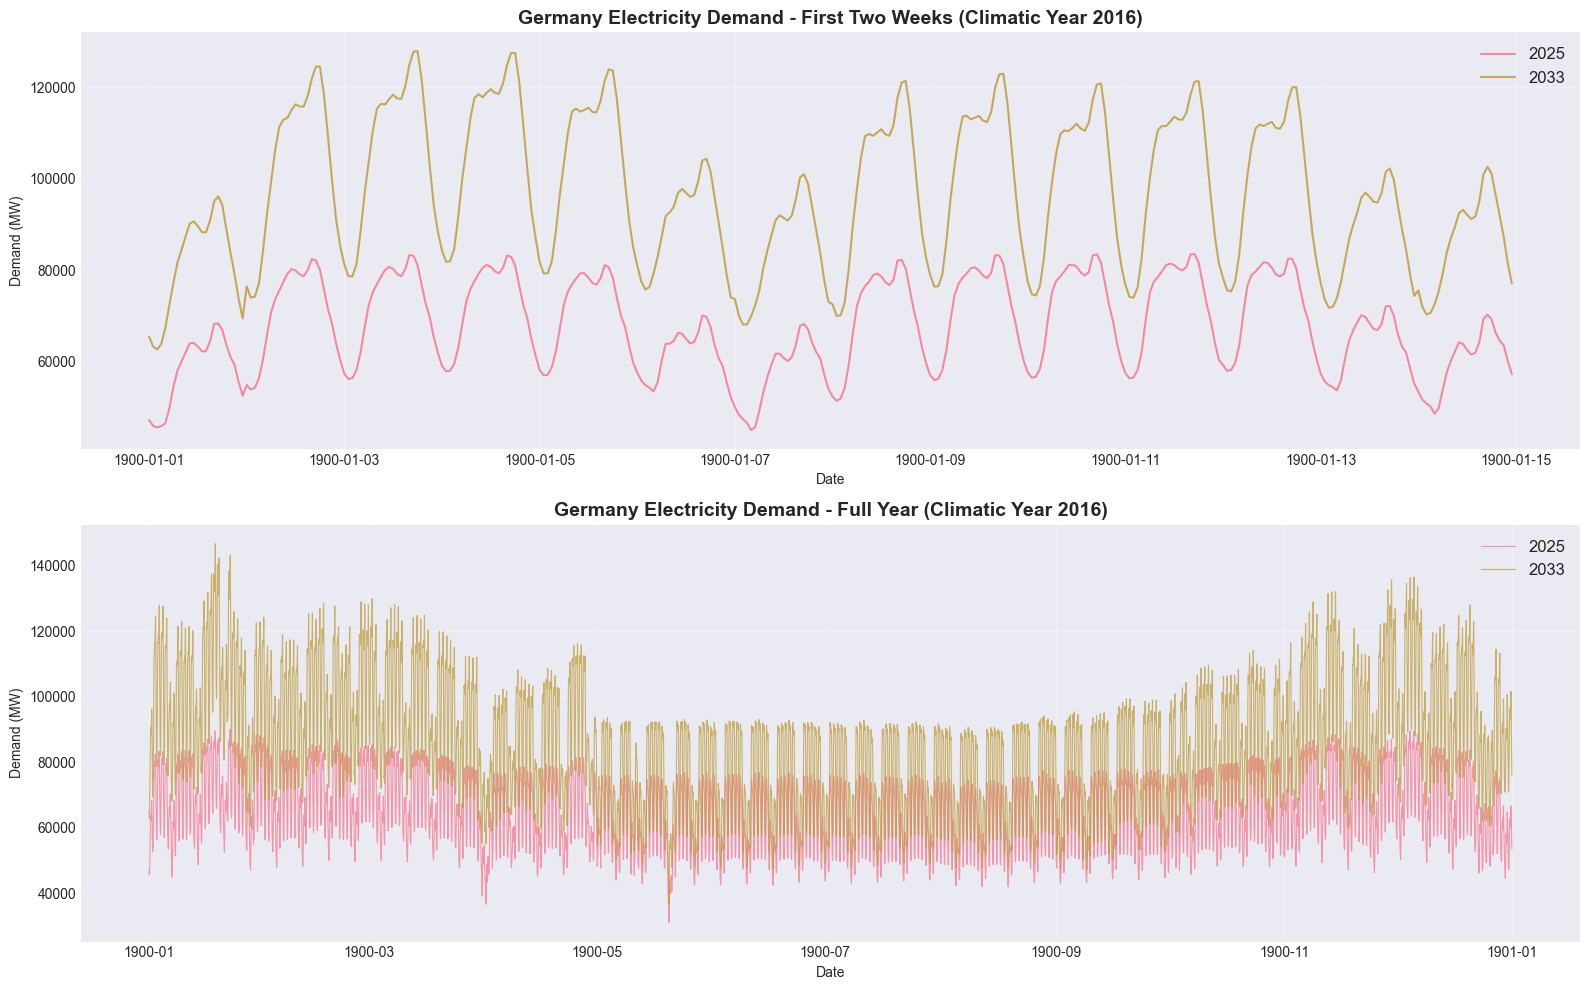

✓ Plotted demand time series for climatic year 2016


In [6]:
# Sample one climatic year for detailed visualization (2016)
sample_year = 2016
demand_2025_sample = demand_2025[demand_2025['climatic_year'] == sample_year].copy()
demand_2033_sample = demand_2033[demand_2033['climatic_year'] == sample_year].copy()

# Plot first two weeks of demand
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# First two weeks
first_two_weeks_2025 = demand_2025_sample.head(14*24)
first_two_weeks_2033 = demand_2033_sample.head(14*24)

axes[0].plot(first_two_weeks_2025['datetime'], first_two_weeks_2025['value'], 
             label='2025', linewidth=1.5, alpha=0.8)
axes[0].plot(first_two_weeks_2033['datetime'], first_two_weeks_2033['value'], 
             label='2033', linewidth=1.5, alpha=0.8)
axes[0].set_title(f'Germany Electricity Demand - First Two Weeks (Climatic Year {sample_year})', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Demand (MW)')
axes[0].legend(fontsize=12)
axes[0].grid(True, alpha=0.3)

# Full year comparison
axes[1].plot(demand_2025_sample['datetime'], demand_2025_sample['value'], 
             label='2025', linewidth=0.8, alpha=0.7)
axes[1].plot(demand_2033_sample['datetime'], demand_2033_sample['value'], 
             label='2033', linewidth=0.8, alpha=0.7)
axes[1].set_title(f'Germany Electricity Demand - Full Year (Climatic Year {sample_year})', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Demand (MW)')
axes[1].legend(fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"✓ Plotted demand time series for climatic year {sample_year}")


### 3.1 Daily and Weekly Patterns


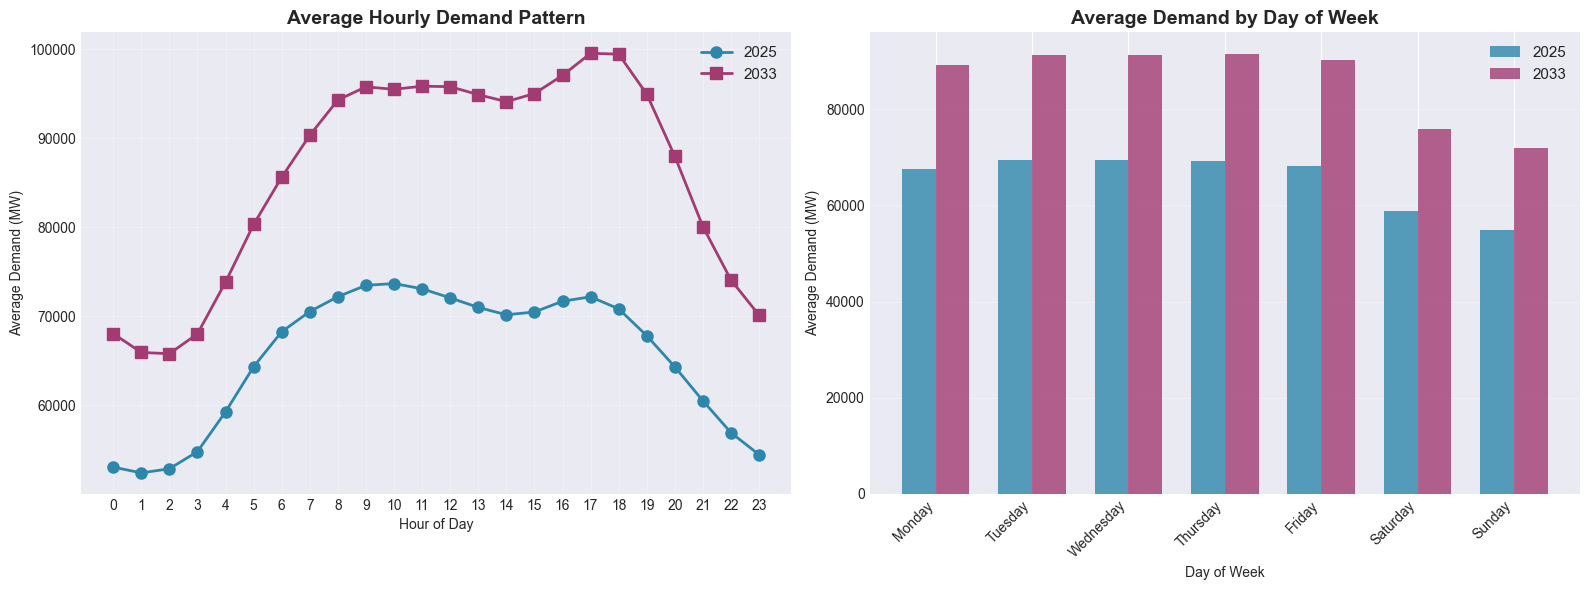

✓ Daily and weekly patterns visualized


In [7]:
# Average demand by hour of day (across all climatic years)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

hourly_avg_2025 = demand_2025.groupby('hour')['value'].mean()
hourly_avg_2033 = demand_2033.groupby('hour')['value'].mean()

axes[0].plot(hourly_avg_2025.index, hourly_avg_2025.values, marker='o', 
             linewidth=2, markersize=8, label='2025', color='#2E86AB')
axes[0].plot(hourly_avg_2033.index, hourly_avg_2033.values, marker='s', 
             linewidth=2, markersize=8, label='2033', color='#A23B72')
axes[0].set_title('Average Hourly Demand Pattern', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average Demand (MW)')
axes[0].set_xticks(range(0, 24))
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Average demand by day of week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_avg_2025 = demand_2025.groupby('dayofweek')['value'].mean()
dow_avg_2033 = demand_2033.groupby('dayofweek')['value'].mean()

x = np.arange(len(day_names))
width = 0.35

axes[1].bar(x - width/2, dow_avg_2025.values, width, label='2025', color='#2E86AB', alpha=0.8)
axes[1].bar(x + width/2, dow_avg_2033.values, width, label='2033', color='#A23B72', alpha=0.8)
axes[1].set_title('Average Demand by Day of Week', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Average Demand (MW)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(day_names, rotation=45, ha='right')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✓ Daily and weekly patterns visualized")


### 3.2 Seasonal Patterns


/var/folders/g1/my7j77995txbp2mcx9byb9m40000gn/T/ipykernel_53089/2895052980.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot(seasonal_data, labels=labels, patch_artist=True,


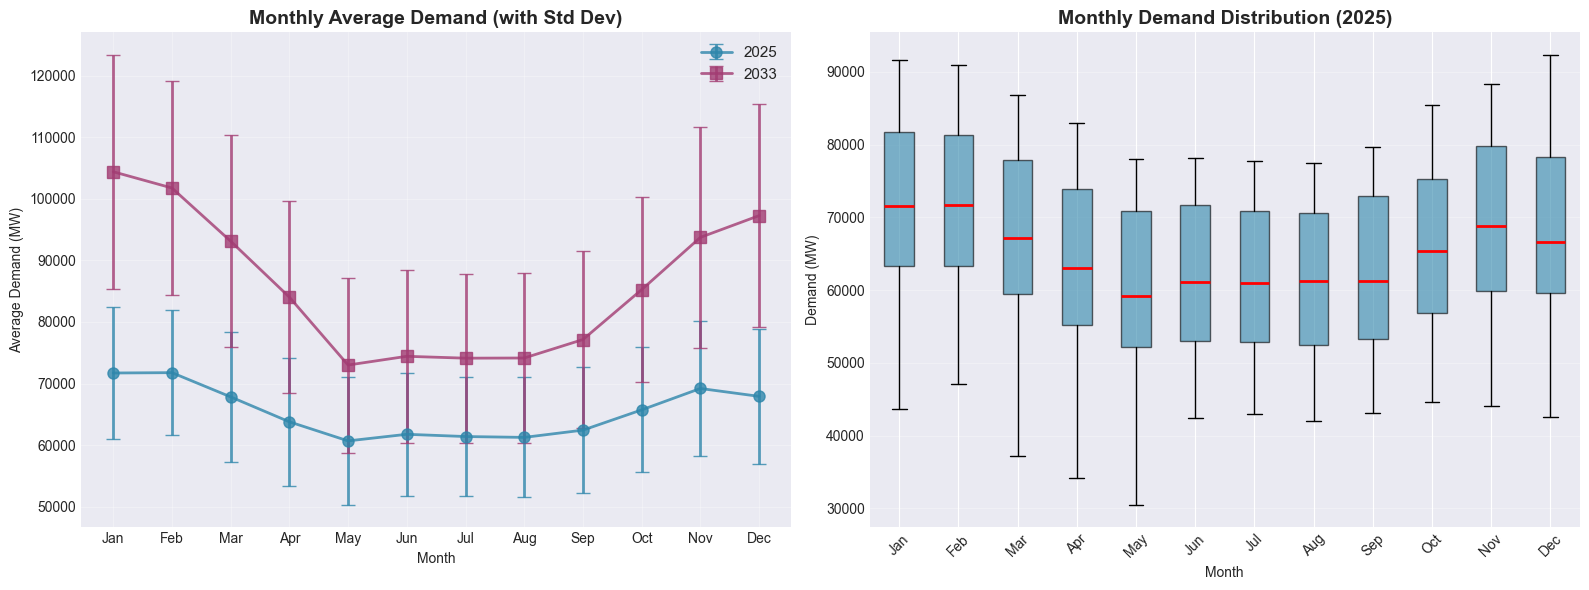

✓ Seasonal patterns visualized


In [8]:
# Monthly demand patterns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

monthly_avg_2025 = demand_2025.groupby('month')['value'].agg(['mean', 'std'])
monthly_avg_2033 = demand_2033.groupby('month')['value'].agg(['mean', 'std'])

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Monthly averages with error bars
axes[0].errorbar(monthly_avg_2025.index, monthly_avg_2025['mean'], 
                 yerr=monthly_avg_2025['std'], marker='o', linewidth=2, 
                 markersize=8, capsize=5, label='2025', color='#2E86AB', alpha=0.8)
axes[0].errorbar(monthly_avg_2033.index, monthly_avg_2033['mean'], 
                 yerr=monthly_avg_2033['std'], marker='s', linewidth=2, 
                 markersize=8, capsize=5, label='2033', color='#A23B72', alpha=0.8)
axes[0].set_title('Monthly Average Demand (with Std Dev)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Demand (MW)')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(month_names)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Box plot for seasonal distribution
seasonal_data = []
labels = []
for month in range(1, 13):
    seasonal_data.append(demand_2025[demand_2025['month'] == month]['value'].values)
    labels.append(month_names[month-1])

bp = axes[1].boxplot(seasonal_data, labels=labels, patch_artist=True,
                     showfliers=False, medianprops=dict(color='red', linewidth=2))
for patch in bp['boxes']:
    patch.set_facecolor('#2E86AB')
    patch.set_alpha(0.6)
axes[1].set_title('Monthly Demand Distribution (2025)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Demand (MW)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✓ Seasonal patterns visualized")


### 3.3 Distribution Analysis


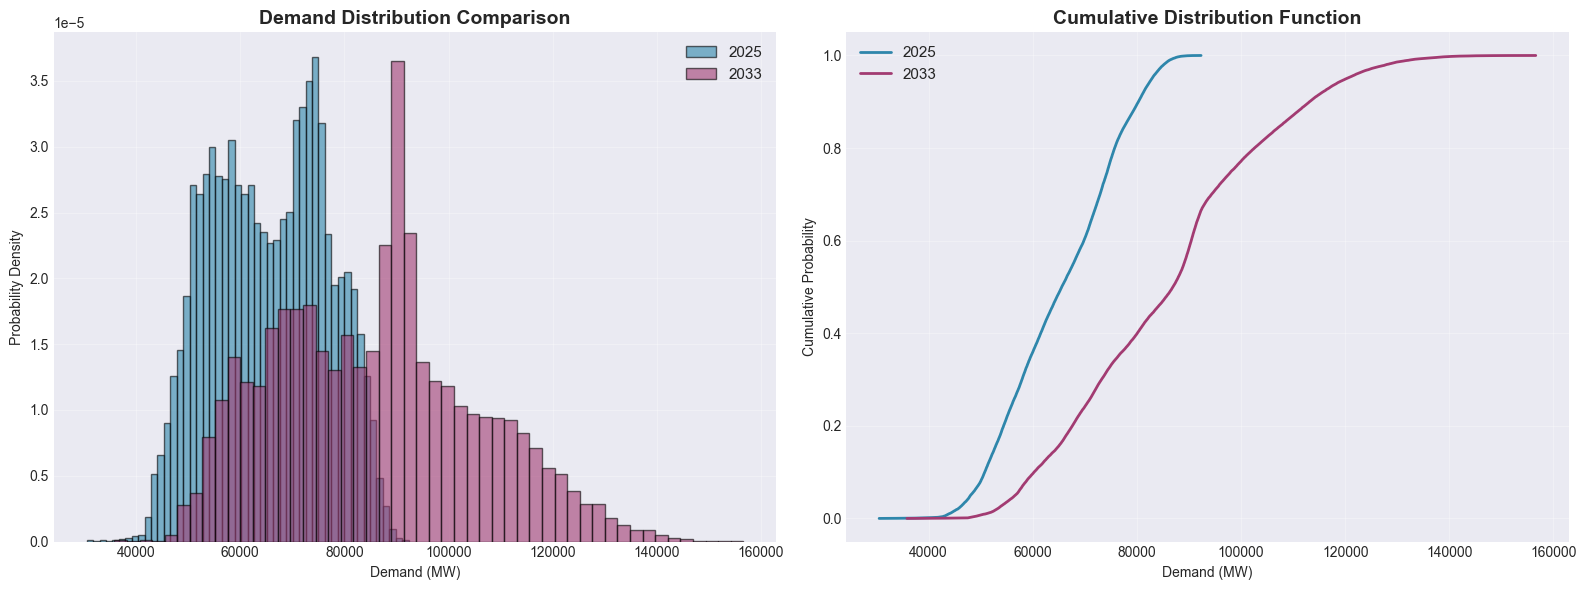

✓ Distribution analysis completed


In [9]:
# Distribution comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(demand_2025['value'], bins=50, alpha=0.6, label='2025', 
             color='#2E86AB', density=True, edgecolor='black')
axes[0].hist(demand_2033['value'], bins=50, alpha=0.6, label='2033', 
             color='#A23B72', density=True, edgecolor='black')
axes[0].set_title('Demand Distribution Comparison', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Demand (MW)')
axes[0].set_ylabel('Probability Density')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Cumulative distribution
sorted_2025 = np.sort(demand_2025['value'])
sorted_2033 = np.sort(demand_2033['value'])
cdf_2025 = np.arange(1, len(sorted_2025) + 1) / len(sorted_2025)
cdf_2033 = np.arange(1, len(sorted_2033) + 1) / len(sorted_2033)

axes[1].plot(sorted_2025, cdf_2025, linewidth=2, label='2025', color='#2E86AB')
axes[1].plot(sorted_2033, cdf_2033, linewidth=2, label='2033', color='#A23B72')
axes[1].set_title('Cumulative Distribution Function', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Demand (MW)')
axes[1].set_ylabel('Cumulative Probability')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Distribution analysis completed")


## 4. Generation Capacity Analysis


In [10]:
# Prepare generation capacity data for analysis
# Focus on power_capacity column (main generation capacity)

# Create comparison dataframe
capacity_comparison = pd.DataFrame({
    'Technology': gen_capa_2025['production_type'],
    'Capacity_2025_MW': gen_capa_2025['power_capacity'],
    'Capacity_2033_MW': gen_capa_2033['power_capacity']
})

# Add turbine capacity for hydro
capacity_comparison['Turbine_2025_MW'] = gen_capa_2025['power_capacity_turbine']
capacity_comparison['Turbine_2033_MW'] = gen_capa_2033['power_capacity_turbine']

# Combine power and turbine capacity
capacity_comparison['Total_2025_MW'] = capacity_comparison['Capacity_2025_MW'] + capacity_comparison['Turbine_2025_MW']
capacity_comparison['Total_2033_MW'] = capacity_comparison['Capacity_2033_MW'] + capacity_comparison['Turbine_2033_MW']

# Calculate change
capacity_comparison['Change_MW'] = capacity_comparison['Total_2033_MW'] - capacity_comparison['Total_2025_MW']
capacity_comparison['Change_Percent'] = (capacity_comparison['Change_MW'] / 
                                         capacity_comparison['Total_2025_MW'].replace(0, np.nan) * 100)

# Filter out zero capacities for both years
capacity_comparison_active = capacity_comparison[
    (capacity_comparison['Total_2025_MW'] > 0) | (capacity_comparison['Total_2033_MW'] > 0)
].copy()

print("=" * 80)
print("GENERATION CAPACITY COMPARISON")
print("=" * 80)
print(capacity_comparison_active.to_string(index=False))
print("\n" + "=" * 80)
print(f"Total capacity 2025: {capacity_comparison_active['Total_2025_MW'].sum():.2f} MW")
print(f"Total capacity 2033: {capacity_comparison_active['Total_2033_MW'].sum():.2f} MW")
print(f"Total change: {capacity_comparison_active['Change_MW'].sum():.2f} MW "
      f"({(capacity_comparison_active['Change_MW'].sum() / capacity_comparison_active['Total_2025_MW'].sum() * 100):.2f}%)")
print("=" * 80)


GENERATION CAPACITY COMPARISON
                      Technology  Capacity_2025_MW  Capacity_2033_MW  Turbine_2025_MW  Turbine_2033_MW  Total_2025_MW  Total_2033_MW  Change_MW  Change_Percent
   Demand Side Response capacity            945.56           5942.57             0.00             0.00         945.56        5942.57    4997.01      528.470959
                            Gas           32541.30          35084.62             0.00             0.00       32541.30       35084.62    2543.32        7.815668
                       Hard Coal          12786.24              0.00             0.00             0.00       12786.24           0.00  -12786.24     -100.000000
Hydro - Pump Storage Closed Loop              0.00              0.00          6409.84          7009.84        6409.84        7009.84     600.00        9.360608
  Hydro - Pump Storage Open Loop              0.00              0.00          2144.10          2144.10        2144.10        2144.10       0.00        0.000000
         

### 4.1 Capacity Comparison Visualizations


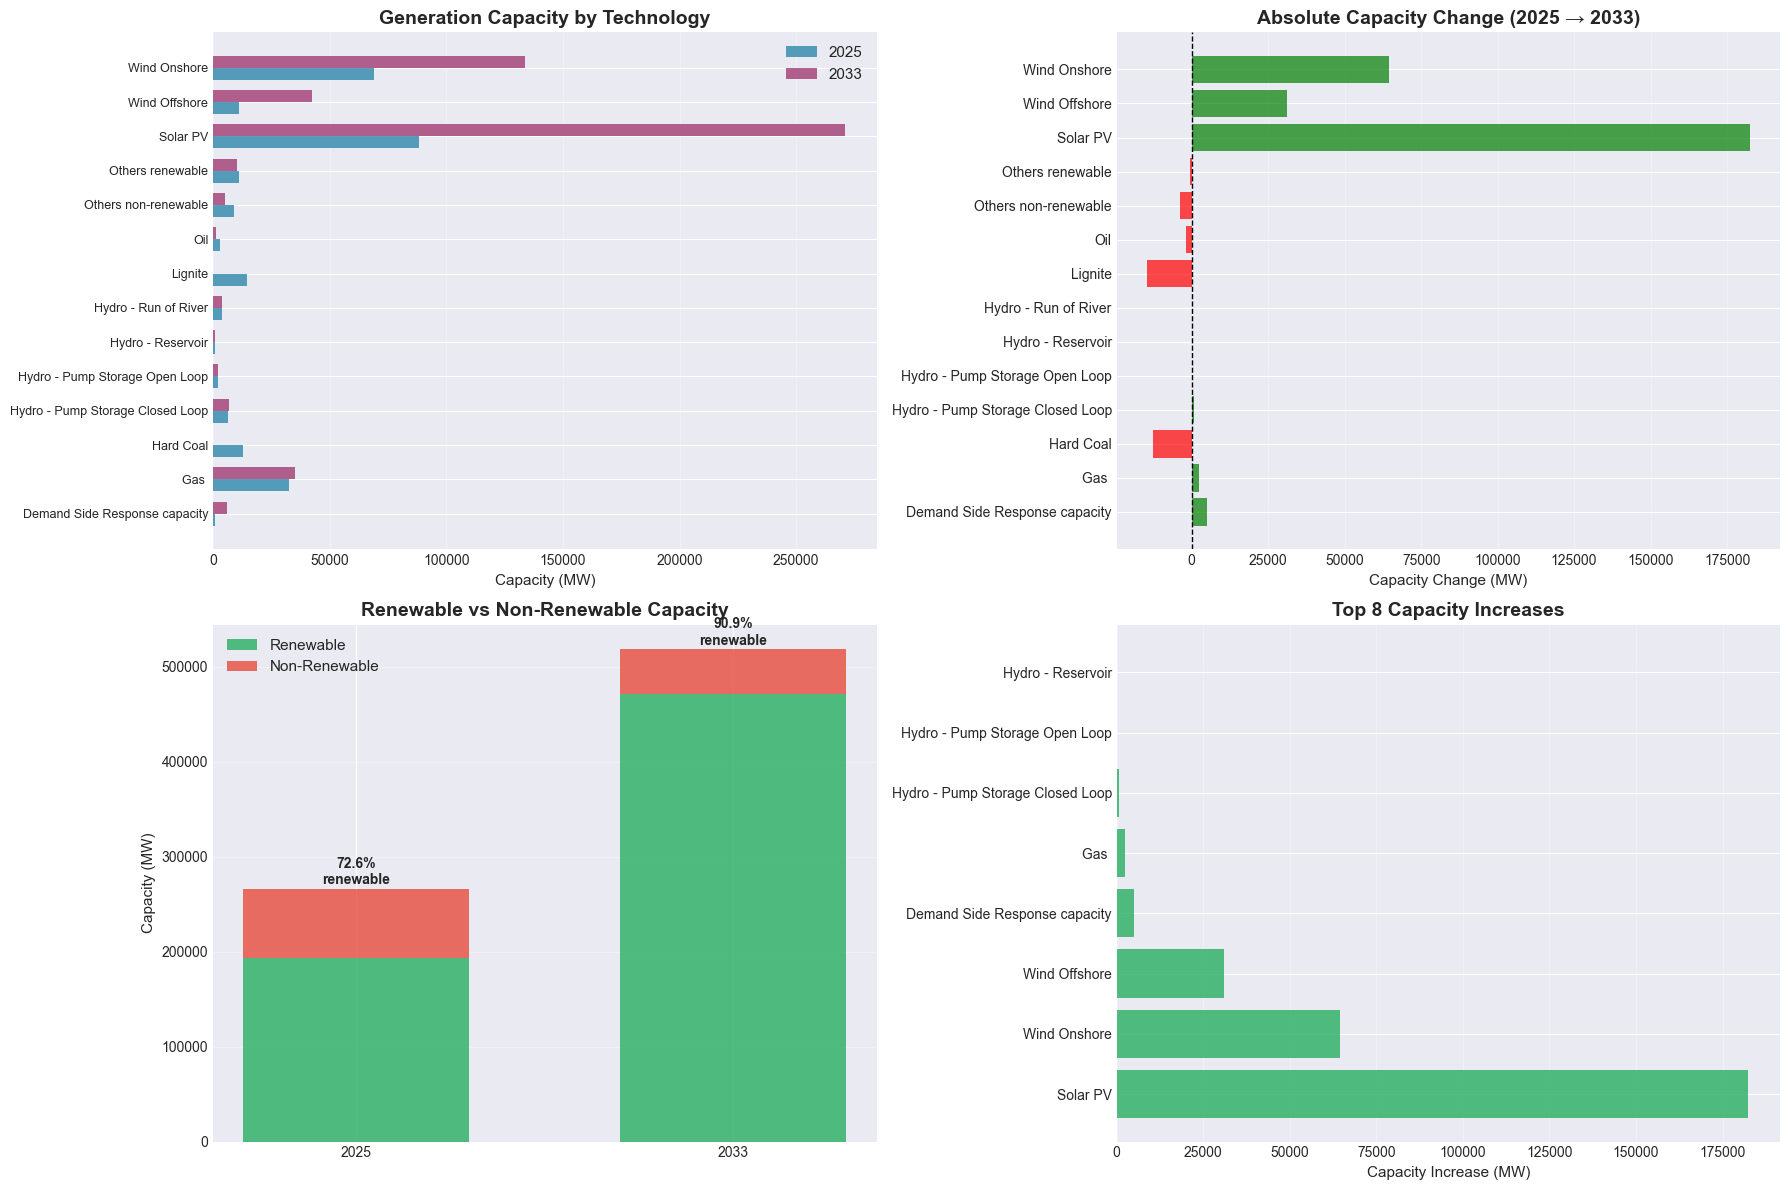

✓ Generation capacity visualizations created


In [11]:
# Visualize generation capacity changes
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Side-by-side bar chart
technologies = capacity_comparison_active['Technology'].values
x_pos = np.arange(len(technologies))
width = 0.35

axes[0, 0].barh(x_pos - width/2, capacity_comparison_active['Total_2025_MW'], 
                width, label='2025', color='#2E86AB', alpha=0.8)
axes[0, 0].barh(x_pos + width/2, capacity_comparison_active['Total_2033_MW'], 
                width, label='2033', color='#A23B72', alpha=0.8)
axes[0, 0].set_yticks(x_pos)
axes[0, 0].set_yticklabels(technologies, fontsize=9)
axes[0, 0].set_xlabel('Capacity (MW)', fontsize=11)
axes[0, 0].set_title('Generation Capacity by Technology', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3, axis='x')

# 2. Absolute change
colors = ['green' if x > 0 else 'red' if x < 0 else 'gray' 
          for x in capacity_comparison_active['Change_MW']]
axes[0, 1].barh(technologies, capacity_comparison_active['Change_MW'], 
                color=colors, alpha=0.7)
axes[0, 1].set_xlabel('Capacity Change (MW)', fontsize=11)
axes[0, 1].set_title('Absolute Capacity Change (2025 → 2033)', fontsize=14, fontweight='bold')
axes[0, 1].axvline(x=0, color='black', linewidth=1, linestyle='--')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# 3. Renewable vs Non-renewable split
renewable_techs = ['Solar PV', 'Wind Onshore', 'Wind Offshore', 
                   'Hydro - Run of River', 'Hydro - Reservoir', 
                   'Hydro - Pump Storage Open Loop', 'Hydro - Pump Storage Closed Loop',
                   'Others renewable']

capacity_comparison_active['Type'] = capacity_comparison_active['Technology'].apply(
    lambda x: 'Renewable' if any(r in x for r in renewable_techs) else 'Non-Renewable'
)

renewable_2025 = capacity_comparison_active[capacity_comparison_active['Type'] == 'Renewable']['Total_2025_MW'].sum()
renewable_2033 = capacity_comparison_active[capacity_comparison_active['Type'] == 'Renewable']['Total_2033_MW'].sum()
non_renewable_2025 = capacity_comparison_active[capacity_comparison_active['Type'] == 'Non-Renewable']['Total_2025_MW'].sum()
non_renewable_2033 = capacity_comparison_active[capacity_comparison_active['Type'] == 'Non-Renewable']['Total_2033_MW'].sum()

x_cat = ['2025', '2033']
renewable_vals = [renewable_2025, renewable_2033]
non_renewable_vals = [non_renewable_2025, non_renewable_2033]

axes[1, 0].bar(x_cat, renewable_vals, label='Renewable', color='#27AE60', alpha=0.8, width=0.6)
axes[1, 0].bar(x_cat, non_renewable_vals, bottom=renewable_vals, 
               label='Non-Renewable', color='#E74C3C', alpha=0.8, width=0.6)
axes[1, 0].set_ylabel('Capacity (MW)', fontsize=11)
axes[1, 0].set_title('Renewable vs Non-Renewable Capacity', fontsize=14, fontweight='bold')
axes[1, 0].legend(fontsize=11)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Add percentage labels
for i, (year, ren, non_ren) in enumerate(zip(x_cat, renewable_vals, non_renewable_vals)):
    total = ren + non_ren
    ren_pct = ren / total * 100
    axes[1, 0].text(i, total + 5000, f'{ren_pct:.1f}%\nrenewable', 
                    ha='center', fontsize=10, fontweight='bold')

# 4. Top capacity changes
top_changes = capacity_comparison_active.nlargest(8, 'Change_MW')
axes[1, 1].barh(top_changes['Technology'], top_changes['Change_MW'], 
                color='#27AE60', alpha=0.8)
axes[1, 1].set_xlabel('Capacity Increase (MW)', fontsize=11)
axes[1, 1].set_title('Top 8 Capacity Increases', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("✓ Generation capacity visualizations created")


### 4.2 Technology Mix Evolution


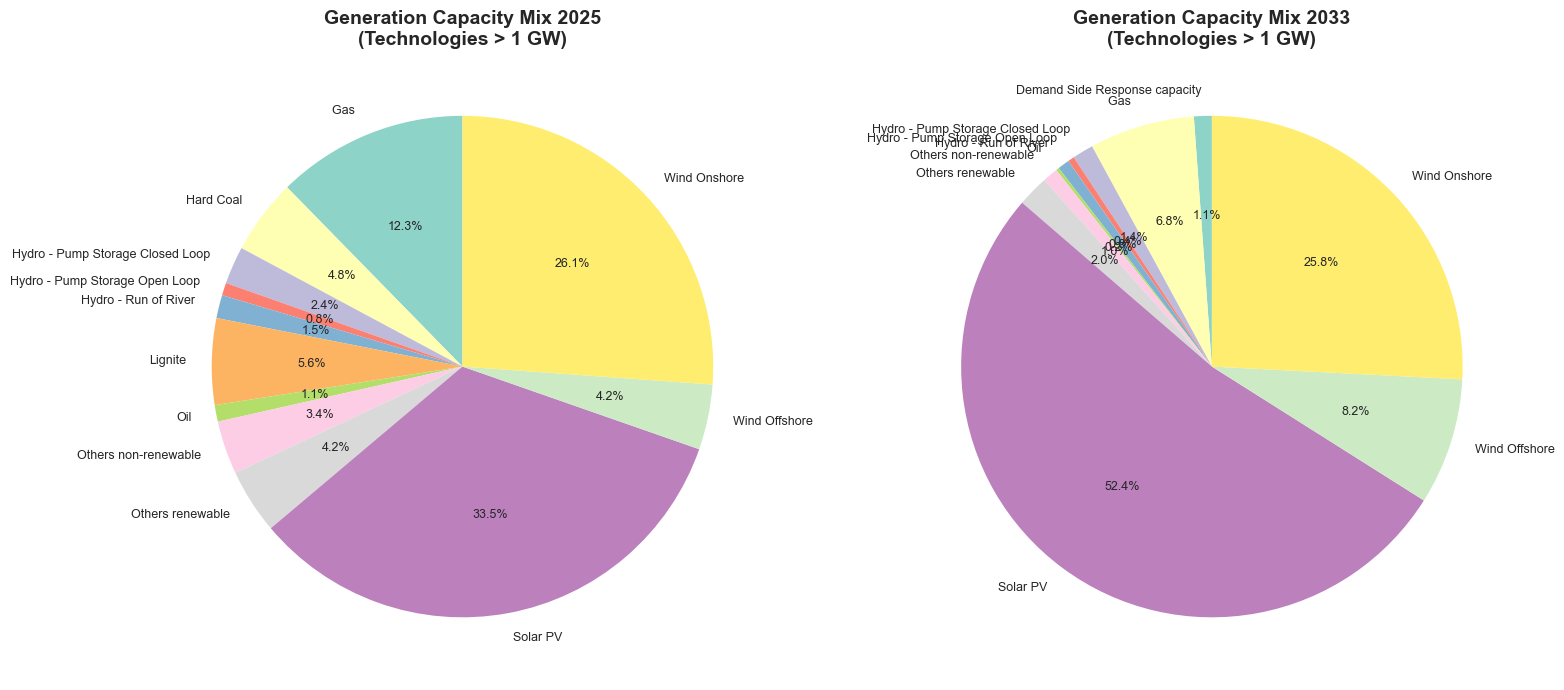

✓ Technology mix pie charts created


In [12]:
# Pie charts showing technology mix
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Filter out very small capacities for cleaner pie charts
threshold = 1000  # MW
cap_2025_filtered = capacity_comparison_active[capacity_comparison_active['Total_2025_MW'] > threshold]
cap_2033_filtered = capacity_comparison_active[capacity_comparison_active['Total_2033_MW'] > threshold]

# 2025 Pie Chart
colors_2025 = plt.cm.Set3(np.linspace(0, 1, len(cap_2025_filtered)))
wedges1, texts1, autotexts1 = axes[0].pie(
    cap_2025_filtered['Total_2025_MW'], 
    labels=cap_2025_filtered['Technology'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_2025,
    textprops={'fontsize': 9}
)
axes[0].set_title('Generation Capacity Mix 2025\n(Technologies > 1 GW)', 
                  fontsize=14, fontweight='bold')

# 2033 Pie Chart
colors_2033 = plt.cm.Set3(np.linspace(0, 1, len(cap_2033_filtered)))
wedges2, texts2, autotexts2 = axes[1].pie(
    cap_2033_filtered['Total_2033_MW'], 
    labels=cap_2033_filtered['Technology'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_2033,
    textprops={'fontsize': 9}
)
axes[1].set_title('Generation Capacity Mix 2033\n(Technologies > 1 GW)', 
                  fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Technology mix pie charts created")


## 5. Key Insights and Trends


In [13]:
# Calculate and display key insights
print("=" * 100)
print("KEY INSIGHTS: GERMANY ENERGY SYSTEM (2025 → 2033)")
print("=" * 100)

# Demand insights
mean_increase = ((stats_2033['mean'] - stats_2025['mean']) / stats_2025['mean'] * 100)
peak_2025 = demand_2025['value'].max()
peak_2033 = demand_2033['value'].max()
peak_increase = ((peak_2033 - peak_2025) / peak_2025 * 100)

print("\n📊 DEMAND TRENDS:")
print(f"  • Average demand increases by {mean_increase:.1f}% (from {stats_2025['mean']:.0f} MW to {stats_2033['mean']:.0f} MW)")
print(f"  • Peak demand increases by {peak_increase:.1f}% (from {peak_2025:.0f} MW to {peak_2033:.0f} MW)")
print(f"  • Demand variability (std dev) increases by {((stats_2033['std'] - stats_2025['std']) / stats_2025['std'] * 100):.1f}%")

# Temporal patterns
peak_hours = hourly_avg_2025.nlargest(3)
low_hours = hourly_avg_2025.nsmallest(3)
print(f"  • Peak demand hours: {list(peak_hours.index)} (highest at hour {peak_hours.idxmax()})")
print(f"  • Lowest demand hours: {list(low_hours.index)} (lowest at hour {low_hours.idxmin()})")

# Day of week pattern
weekday_avg = demand_2025[demand_2025['dayofweek'] < 5]['value'].mean()
weekend_avg = demand_2025[demand_2025['dayofweek'] >= 5]['value'].mean()
print(f"  • Weekday vs weekend: Weekdays {((weekday_avg - weekend_avg) / weekend_avg * 100):.1f}% higher demand")

# Seasonal pattern
winter_months = [12, 1, 2]
summer_months = [6, 7, 8]
winter_avg = demand_2025[demand_2025['month'].isin(winter_months)]['value'].mean()
summer_avg = demand_2025[demand_2025['month'].isin(summer_months)]['value'].mean()
print(f"  • Seasonal variation: Winter demand {((winter_avg - summer_avg) / summer_avg * 100):.1f}% higher than summer")

# Capacity insights
print("\n⚡ GENERATION CAPACITY TRENDS:")
total_cap_2025 = capacity_comparison_active['Total_2025_MW'].sum()
total_cap_2033 = capacity_comparison_active['Total_2033_MW'].sum()
total_increase = ((total_cap_2033 - total_cap_2025) / total_cap_2025 * 100)

print(f"  • Total capacity increases by {total_increase:.1f}% (from {total_cap_2025:.0f} MW to {total_cap_2033:.0f} MW)")
print(f"  • Renewable capacity 2025: {renewable_2025:.0f} MW ({renewable_2025/total_cap_2025*100:.1f}% of total)")
print(f"  • Renewable capacity 2033: {renewable_2033:.0f} MW ({renewable_2033/total_cap_2033*100:.1f}% of total)")
print(f"  • Renewable growth: {((renewable_2033 - renewable_2025) / renewable_2025 * 100):.1f}%")

# Technology-specific insights
solar_change = capacity_comparison_active[capacity_comparison_active['Technology'] == 'Solar PV']['Change_MW'].values[0]
wind_on_change = capacity_comparison_active[capacity_comparison_active['Technology'] == 'Wind Onshore']['Change_MW'].values[0]
wind_off_change = capacity_comparison_active[capacity_comparison_active['Technology'] == 'Wind Offshore']['Change_MW'].values[0]

print(f"\n🌞 RENEWABLE ENERGY EXPANSION:")
print(f"  • Solar PV: +{solar_change:.0f} MW ({solar_change/1000:.1f} GW) - largest absolute increase")
print(f"  • Wind Onshore: +{wind_on_change:.0f} MW ({wind_on_change/1000:.1f} GW)")
print(f"  • Wind Offshore: +{wind_off_change:.0f} MW ({wind_off_change/1000:.1f} GW)")
print(f"  • Combined wind+solar addition: {(solar_change + wind_on_change + wind_off_change)/1000:.1f} GW")

# Fossil fuel changes
coal_2025 = capacity_comparison_active[capacity_comparison_active['Technology'] == 'Hard Coal']['Total_2025_MW'].values[0]
coal_2033 = capacity_comparison_active[capacity_comparison_active['Technology'] == 'Hard Coal']['Total_2033_MW'].values[0]
lignite_2025 = capacity_comparison_active[capacity_comparison_active['Technology'] == 'Lignite']['Total_2025_MW'].values[0]
lignite_2033 = capacity_comparison_active[capacity_comparison_active['Technology'] == 'Lignite']['Total_2033_MW'].values[0]

print(f"\n🔥 FOSSIL FUEL PHASE-OUT:")
print(f"  • Hard Coal: {coal_2025:.0f} MW → {coal_2033:.0f} MW (complete phase-out)")
print(f"  • Lignite: {lignite_2025:.0f} MW → {lignite_2033:.0f} MW (complete phase-out)")
print(f"  • Total coal capacity removed: {(coal_2025 + lignite_2025)/1000:.1f} GW")

# Storage
batteries_2025 = gen_capa_2025[gen_capa_2025['production_type'] == 'Batteries']['power_capacity_injection'].values[0]
batteries_2033 = gen_capa_2033[gen_capa_2033['production_type'] == 'Batteries']['power_capacity_injection'].values[0]
print(f"\n🔋 ENERGY STORAGE:")
print(f"  • Battery capacity: {batteries_2025:.0f} MW → {batteries_2033:.0f} MW")
print(f"  • Battery growth: {((batteries_2033 - batteries_2025) / batteries_2025 * 100):.0f}% increase ({(batteries_2033 - batteries_2025)/1000:.1f} GW added)")

print("\n" + "=" * 100)
print("SUMMARY: Germany is undergoing a massive energy transition with:")
print("  1. Substantial demand growth (~39% increase)")
print("  2. Complete coal phase-out (27.5 GW removed)")
print("  3. Massive renewable expansion, especially Solar PV (+182 GW) and Wind")
print("  4. Significant battery storage deployment (+10 GW)")
print("  5. Increasing renewable share from 72% to 89% of total capacity")
print("=" * 100)


KEY INSIGHTS: GERMANY ENERGY SYSTEM (2025 → 2033)

📊 DEMAND TRENDS:
  • Average demand increases by 31.4% (from 65411 MW to 85939 MW)
  • Peak demand increases by 69.6% (from 92329 MW to 156596 MW)
  • Demand variability (std dev) increases by 76.2%
  • Peak demand hours: [10, 9, 11] (highest at hour 10)
  • Lowest demand hours: [1, 2, 0] (lowest at hour 1)
  • Weekday vs weekend: Weekdays 21.1% higher demand
  • Seasonal variation: Winter demand 14.6% higher than summer

⚡ GENERATION CAPACITY TRENDS:
  • Total capacity increases by 94.9% (from 265795 MW to 518090 MW)
  • Renewable capacity 2025: 192934 MW (72.6% of total)
  • Renewable capacity 2033: 470850 MW (90.9% of total)
  • Renewable growth: 144.0%

🌞 RENEWABLE ENERGY EXPANSION:
  • Solar PV: +182439 MW (182.4 GW) - largest absolute increase
  • Wind Onshore: +64499 MW (64.5 GW)
  • Wind Offshore: +31080 MW (31.1 GW)
  • Combined wind+solar addition: 278.0 GW

🔥 FOSSIL FUEL PHASE-OUT:
  • Hard Coal: 12786 MW → 0 MW (complete ph

## 6. Additional Analysis: Demand-Capacity Ratio


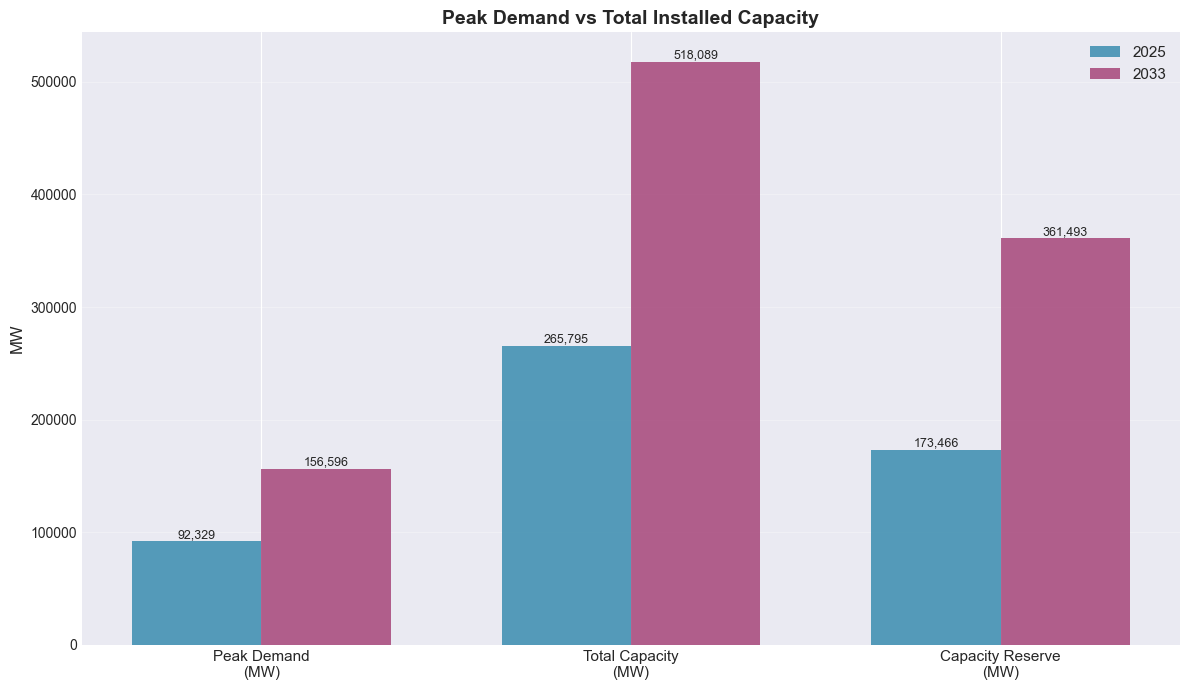


📈 CAPACITY RESERVE ANALYSIS:
  • 2025 Reserve Margin: 187.9% (173.5 GW above peak)
  • 2033 Reserve Margin: 230.8% (361.5 GW above peak)

Note: High reserve margins are typical for systems with high renewable penetration
due to intermittency and the need for backup capacity.


In [14]:
# Compare peak demand to total installed capacity
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

metrics = ['Peak Demand\n(MW)', 'Total Capacity\n(MW)', 'Capacity Reserve\n(MW)']
values_2025 = [peak_2025, total_cap_2025, total_cap_2025 - peak_2025]
values_2033 = [peak_2033, total_cap_2033, total_cap_2033 - peak_2033]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax.bar(x - width/2, values_2025, width, label='2025', color='#2E86AB', alpha=0.8)
bars2 = ax.bar(x + width/2, values_2033, width, label='2033', color='#A23B72', alpha=0.8)

ax.set_ylabel('MW', fontsize=12)
ax.set_title('Peak Demand vs Total Installed Capacity', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Calculate reserve margins
reserve_margin_2025 = (total_cap_2025 - peak_2025) / peak_2025 * 100
reserve_margin_2033 = (total_cap_2033 - peak_2033) / peak_2033 * 100

print(f"\n📈 CAPACITY RESERVE ANALYSIS:")
print(f"  • 2025 Reserve Margin: {reserve_margin_2025:.1f}% ({(total_cap_2025 - peak_2025)/1000:.1f} GW above peak)")
print(f"  • 2033 Reserve Margin: {reserve_margin_2033:.1f}% ({(total_cap_2033 - peak_2033)/1000:.1f} GW above peak)")
print(f"\nNote: High reserve margins are typical for systems with high renewable penetration")
print("due to intermittency and the need for backup capacity.")


## 7. Correlation Analysis: Load Duration Curve


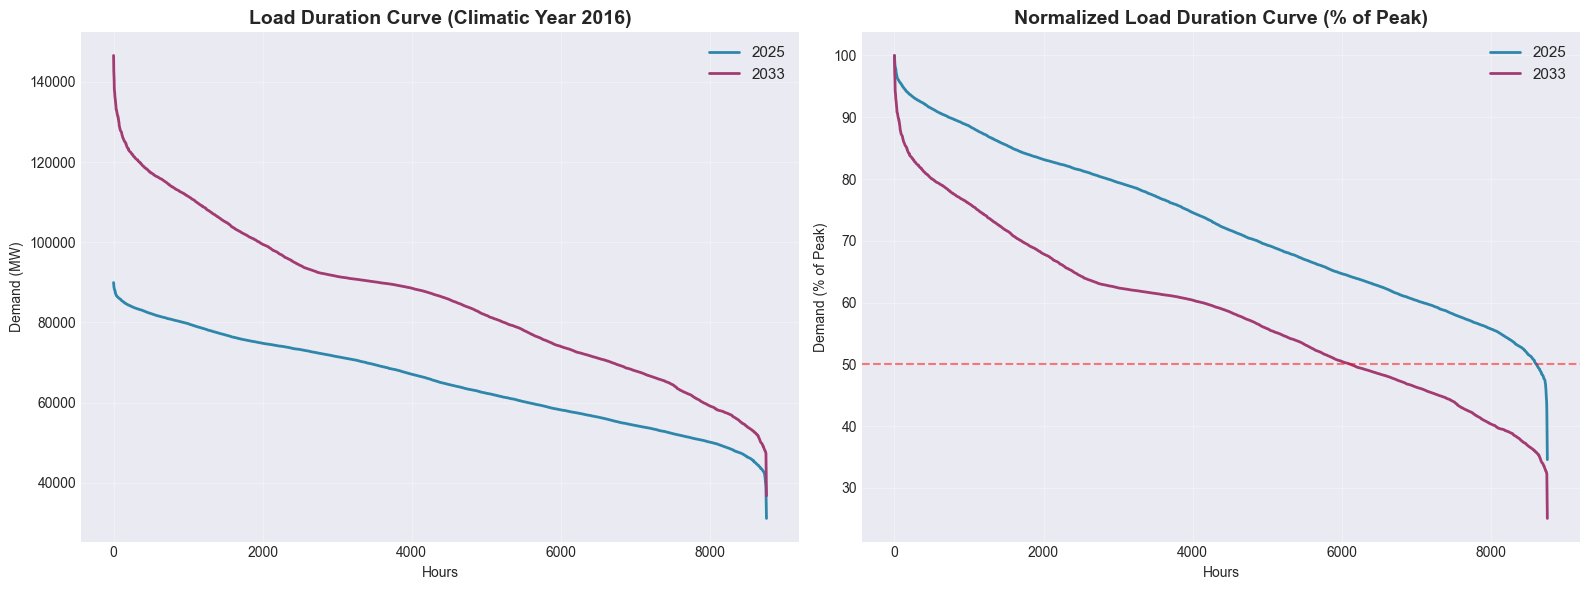


📉 LOAD DURATION CURVE INSIGHTS:
  • Load Factor 2025: 72.5% (average demand as % of peak)
  • Load Factor 2033: 58.4%
  • Hours above 80% of peak (2025): 2863 hours
  • Hours above 80% of peak (2033): 505 hours


In [15]:
# Load duration curves - showing demand sorted from highest to lowest
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Use sample year for cleaner visualization
sample_2025 = demand_2025[demand_2025['climatic_year'] == sample_year]['value'].values
sample_2033 = demand_2033[demand_2033['climatic_year'] == sample_year]['value'].values

# Sort in descending order
sorted_2025 = np.sort(sample_2025)[::-1]
sorted_2033 = np.sort(sample_2033)[::-1]

# Create hour indices
hours_2025 = np.arange(len(sorted_2025))
hours_2033 = np.arange(len(sorted_2033))

# Load duration curve
axes[0].plot(hours_2025, sorted_2025, linewidth=2, label='2025', color='#2E86AB')
axes[0].plot(hours_2033, sorted_2033, linewidth=2, label='2033', color='#A23B72')
axes[0].set_title(f'Load Duration Curve (Climatic Year {sample_year})', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hours')
axes[0].set_ylabel('Demand (MW)')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Normalized load duration curve (as percentage of peak)
normalized_2025 = sorted_2025 / sorted_2025[0] * 100
normalized_2033 = sorted_2033 / sorted_2033[0] * 100

axes[1].plot(hours_2025, normalized_2025, linewidth=2, label='2025', color='#2E86AB')
axes[1].plot(hours_2033, normalized_2033, linewidth=2, label='2033', color='#A23B72')
axes[1].set_title(f'Normalized Load Duration Curve (% of Peak)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hours')
axes[1].set_ylabel('Demand (% of Peak)')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=50, color='red', linestyle='--', alpha=0.5, label='50% line')

plt.tight_layout()
plt.show()

# Calculate load factor (average demand / peak demand)
load_factor_2025 = np.mean(sample_2025) / np.max(sample_2025) * 100
load_factor_2033 = np.mean(sample_2033) / np.max(sample_2033) * 100

print(f"\n📉 LOAD DURATION CURVE INSIGHTS:")
print(f"  • Load Factor 2025: {load_factor_2025:.1f}% (average demand as % of peak)")
print(f"  • Load Factor 2033: {load_factor_2033:.1f}%")
print(f"  • Hours above 80% of peak (2025): {np.sum(normalized_2025 > 80)} hours")
print(f"  • Hours above 80% of peak (2033): {np.sum(normalized_2033 > 80)} hours")


## 8. Summary Statistics Tables


In [16]:
# Create comprehensive summary tables
import pandas as pd

# Demand summary table
demand_summary = pd.DataFrame({
    'Metric': ['Mean (MW)', 'Median (MW)', 'Std Dev (MW)', 'Min (MW)', 'Max (MW)', 
               '25th Percentile (MW)', '75th Percentile (MW)', 'Total Energy (TWh/year)'],
    '2025': [
        stats_2025['mean'],
        stats_2025['50%'],
        stats_2025['std'],
        stats_2025['min'],
        stats_2025['max'],
        stats_2025['25%'],
        stats_2025['75%'],
        demand_2025['value'].sum() / 1e6 / 6  # Divided by 6 climatic years
    ],
    '2033': [
        stats_2033['mean'],
        stats_2033['50%'],
        stats_2033['std'],
        stats_2033['min'],
        stats_2033['max'],
        stats_2033['25%'],
        stats_2033['75%'],
        demand_2033['value'].sum() / 1e6 / 6
    ]
})

demand_summary['Change (%)'] = ((demand_summary['2033'] - demand_summary['2025']) / 
                                 demand_summary['2025'] * 100).round(1)

print("=" * 90)
print("DEMAND SUMMARY STATISTICS")
print("=" * 90)
print(demand_summary.to_string(index=False))

# Capacity summary by category
print("\n\n" + "=" * 90)
print("GENERATION CAPACITY SUMMARY BY CATEGORY")
print("=" * 90)

capacity_categories = {
    'Solar': ['Solar PV'],
    'Wind': ['Wind Onshore', 'Wind Offshore'],
    'Hydro': ['Hydro - Run of River', 'Hydro - Reservoir', 'Hydro - Pump Storage Open Loop', 
              'Hydro - Pump Storage Closed Loop'],
    'Fossil': ['Gas ', 'Hard Coal', 'Lignite', 'Oil'],
    'Storage': ['Batteries'],
    'Other': ['Demand Side Response capacity', 'Others renewable', 'Others non-renewable']
}

category_summary = []
for category, techs in capacity_categories.items():
    mask = capacity_comparison_active['Technology'].isin(techs)
    cap_2025 = capacity_comparison_active[mask]['Total_2025_MW'].sum()
    cap_2033 = capacity_comparison_active[mask]['Total_2033_MW'].sum()
    change = cap_2033 - cap_2025
    change_pct = (change / cap_2025 * 100) if cap_2025 > 0 else 0
    
    category_summary.append({
        'Category': category,
        '2025 (GW)': cap_2025 / 1000,
        '2033 (GW)': cap_2033 / 1000,
        'Change (GW)': change / 1000,
        'Change (%)': change_pct
    })

category_df = pd.DataFrame(category_summary)
print(category_df.to_string(index=False, float_format=lambda x: f'{x:.2f}'))

print("\n" + "=" * 90)


DEMAND SUMMARY STATISTICS
                 Metric         2025          2033  Change (%)
              Mean (MW) 65410.823345  85939.027740        31.4
            Median (MW) 65569.000000  86909.000000        32.5
           Std Dev (MW) 11043.407062  19459.496230        76.2
               Min (MW) 30504.000000  35834.000000        17.5
               Max (MW) 92329.000000 156596.000000        69.6
   25th Percentile (MW) 56143.000000  70508.500000        25.6
   75th Percentile (MW) 74331.000000  98147.000000        32.0
Total Energy (TWh/year)   572.998812    752.825883        31.4


GENERATION CAPACITY SUMMARY BY CATEGORY
Category  2025 (GW)  2033 (GW)  Change (GW)  Change (%)
   Solar      88.45     270.89       182.44      206.27
    Wind      80.12     175.70        95.58      119.29
   Hydro      13.31      13.91         0.60        4.51
  Fossil      62.84      36.13       -26.71      -42.50
 Storage       0.00       0.00         0.00        0.00
   Other      21.08      21.4

## Conclusions

This analysis reveals Germany's ambitious energy transition from 2025 to 2033 with substantial demand growth, massive renewable expansion, complete coal phase-out, and significant battery storage deployment. The renewable capacity share increases from 72% to 89%, led by solar PV tripling and wind capacity more than doubling.


---

# Part 2: Renewable Production Analysis with Capacity Factors

Now we analyze actual renewable electricity production by combining installed capacity with capacity factors.


## 9. Load Capacity Factor Data


In [17]:
# Load capacity factor data
cf_dir = data_dir / 'res_capa-factors'

# Solar capacity factors
cf_solar_2025 = pd.read_csv(cf_dir / 'capa_factor_solar_pv_2025_germany.csv', sep=';')
cf_solar_2033 = pd.read_csv(cf_dir / 'capa_factor_solar_pv_2033_germany.csv', sep=';')

# Wind onshore capacity factors
cf_wind_on_2025 = pd.read_csv(cf_dir / 'capa_factor_wind_onshore_2025_germany.csv', sep=';')
cf_wind_on_2033 = pd.read_csv(cf_dir / 'capa_factor_wind_onshore_2033_germany.csv', sep=';')

# Wind offshore capacity factors
cf_wind_off_2025 = pd.read_csv(cf_dir / 'capa_factor_wind_offshore_2025_germany.csv', sep=';')
cf_wind_off_2033 = pd.read_csv(cf_dir / 'capa_factor_wind_offshore_2033_germany.csv', sep=';')

print("✓ All capacity factor files loaded successfully!")
print(f"\nSolar PV 2025 shape: {cf_solar_2025.shape}")
print(f"Wind Onshore 2025 shape: {cf_wind_on_2025.shape}")
print(f"Wind Offshore 2025 shape: {cf_wind_off_2025.shape}")

# Add datetime column to all capacity factor dataframes
for df in [cf_solar_2025, cf_solar_2033, cf_wind_on_2025, cf_wind_on_2033, cf_wind_off_2025, cf_wind_off_2033]:
    df['datetime'] = pd.to_datetime(df['date'])
    df['hour'] = df['datetime'].dt.hour
    df['month'] = df['datetime'].dt.month

print("\n✓ Time features added to capacity factor datasets")


✓ All capacity factor files loaded successfully!

Solar PV 2025 shape: (52560, 3)
Wind Onshore 2025 shape: (52560, 3)
Wind Offshore 2025 shape: (52560, 3)

✓ Time features added to capacity factor datasets


### 9.1 Capacity Factor Statistics


In [18]:
# Capacity factor statistics
print("=" * 80)
print("CAPACITY FACTOR STATISTICS (2025)")
print("=" * 80)
print("\nSolar PV:")
print(cf_solar_2025['value'].describe())
print(f"Average capacity factor: {cf_solar_2025['value'].mean():.1%}")

print("\nWind Onshore:")
print(cf_wind_on_2025['value'].describe())
print(f"Average capacity factor: {cf_wind_on_2025['value'].mean():.1%}")

print("\nWind Offshore:")
print(cf_wind_off_2025['value'].describe())
print(f"Average capacity factor: {cf_wind_off_2025['value'].mean():.1%}")

print("\n" + "=" * 80)
print("CAPACITY FACTOR STATISTICS (2033)")
print("=" * 80)
print("\nSolar PV:")
print(cf_solar_2033['value'].describe())
print(f"Average capacity factor: {cf_solar_2033['value'].mean():.1%}")

print("\nWind Onshore:")
print(cf_wind_on_2033['value'].describe())
print(f"Average capacity factor: {cf_wind_on_2033['value'].mean():.1%}")

print("\nWind Offshore:")
print(cf_wind_off_2033['value'].describe())
print(f"Average capacity factor: {cf_wind_off_2033['value'].mean():.1%}")


CAPACITY FACTOR STATISTICS (2025)

Solar PV:
count    52560.000000
mean         0.102269
std          0.152036
min          0.000000
25%          0.000000
50%          0.000000
75%          0.172000
max          0.662000
Name: value, dtype: float64
Average capacity factor: 10.2%

Wind Onshore:
count    52560.000000
mean         0.204703
std          0.168889
min          0.001000
25%          0.078000
50%          0.153000
75%          0.284000
max          0.848000
Name: value, dtype: float64
Average capacity factor: 20.5%

Wind Offshore:
count    52560.000000
mean         0.433867
std          0.311544
min          0.000000
25%          0.145750
50%          0.380000
75%          0.727000
max          0.950000
Name: value, dtype: float64
Average capacity factor: 43.4%

CAPACITY FACTOR STATISTICS (2033)

Solar PV:
count    52560.000000
mean         0.102094
std          0.151870
min          0.000000
25%          0.000000
50%          0.000000
75%          0.172000
max          0.6620

## 10. Calculate Actual Renewable Production


In [19]:
# Extract installed capacities (in MW)
solar_capacity_2025 = capacity_comparison_active[capacity_comparison_active['Technology'] == 'Solar PV']['Total_2025_MW'].values[0]
solar_capacity_2033 = capacity_comparison_active[capacity_comparison_active['Technology'] == 'Solar PV']['Total_2033_MW'].values[0]

wind_on_capacity_2025 = capacity_comparison_active[capacity_comparison_active['Technology'] == 'Wind Onshore']['Total_2025_MW'].values[0]
wind_on_capacity_2033 = capacity_comparison_active[capacity_comparison_active['Technology'] == 'Wind Onshore']['Total_2033_MW'].values[0]

wind_off_capacity_2025 = capacity_comparison_active[capacity_comparison_active['Technology'] == 'Wind Offshore']['Total_2025_MW'].values[0]
wind_off_capacity_2033 = capacity_comparison_active[capacity_comparison_active['Technology'] == 'Wind Offshore']['Total_2033_MW'].values[0]

print("Installed Capacities (MW):")
print(f"  Solar PV:       2025: {solar_capacity_2025:>10,.0f}  |  2033: {solar_capacity_2033:>10,.0f}")
print(f"  Wind Onshore:   2025: {wind_on_capacity_2025:>10,.0f}  |  2033: {wind_on_capacity_2033:>10,.0f}")
print(f"  Wind Offshore:  2025: {wind_off_capacity_2025:>10,.0f}  |  2033: {wind_off_capacity_2033:>10,.0f}")

# Calculate actual production: Capacity (MW) × Capacity Factor = Production (MW)
# 2025
cf_solar_2025['production_MW'] = cf_solar_2025['value'] * solar_capacity_2025
cf_wind_on_2025['production_MW'] = cf_wind_on_2025['value'] * wind_on_capacity_2025
cf_wind_off_2025['production_MW'] = cf_wind_off_2025['value'] * wind_off_capacity_2025

# 2033
cf_solar_2033['production_MW'] = cf_solar_2033['value'] * solar_capacity_2033
cf_wind_on_2033['production_MW'] = cf_wind_on_2033['value'] * wind_on_capacity_2033
cf_wind_off_2033['production_MW'] = cf_wind_off_2033['value'] * wind_off_capacity_2033

print("\n✓ Production calculations completed")


Installed Capacities (MW):
  Solar PV:       2025:     88,448  |  2033:    270,887
  Wind Onshore:   2025:     69,017  |  2033:    133,516
  Wind Offshore:  2025:     11,105  |  2033:     42,185

✓ Production calculations completed


In [20]:
# Create merged dataframes with all renewable production
# We need to merge on climatic_year and datetime

# 2025: Merge all renewable sources
production_2025 = cf_solar_2025[['climatic_year', 'datetime', 'hour', 'month', 'production_MW']].copy()
production_2025 = production_2025.rename(columns={'production_MW': 'solar_MW'})

production_2025 = production_2025.merge(
    cf_wind_on_2025[['climatic_year', 'datetime', 'production_MW']],
    on=['climatic_year', 'datetime'],
    how='left'
).rename(columns={'production_MW': 'wind_onshore_MW'})

production_2025 = production_2025.merge(
    cf_wind_off_2025[['climatic_year', 'datetime', 'production_MW']],
    on=['climatic_year', 'datetime'],
    how='left'
).rename(columns={'production_MW': 'wind_offshore_MW'})

# Total renewable production
production_2025['total_renewable_MW'] = (production_2025['solar_MW'] + 
                                         production_2025['wind_onshore_MW'] + 
                                         production_2025['wind_offshore_MW'])

# 2033: Merge all renewable sources
production_2033 = cf_solar_2033[['climatic_year', 'datetime', 'hour', 'month', 'production_MW']].copy()
production_2033 = production_2033.rename(columns={'production_MW': 'solar_MW'})

production_2033 = production_2033.merge(
    cf_wind_on_2033[['climatic_year', 'datetime', 'production_MW']],
    on=['climatic_year', 'datetime'],
    how='left'
).rename(columns={'production_MW': 'wind_onshore_MW'})

production_2033 = production_2033.merge(
    cf_wind_off_2033[['climatic_year', 'datetime', 'production_MW']],
    on=['climatic_year', 'datetime'],
    how='left'
).rename(columns={'production_MW': 'wind_offshore_MW'})

# Total renewable production
production_2033['total_renewable_MW'] = (production_2033['solar_MW'] + 
                                         production_2033['wind_onshore_MW'] + 
                                         production_2033['wind_offshore_MW'])

print("✓ Renewable production dataframes created")
print(f"\nProduction 2025 shape: {production_2025.shape}")
print(f"Production 2033 shape: {production_2033.shape}")
print(f"\nSample data (2025):")
print(production_2025.head(10))


✓ Renewable production dataframes created

Production 2025 shape: (52560, 8)
Production 2033 shape: (52560, 8)

Sample data (2025):
   climatic_year            datetime  hour  month   solar_MW  wind_onshore_MW  \
0           2016 1900-01-01 00:00:00     0      1     0.0000       12561.1668   
1           2016 1900-01-01 01:00:00     1      1     0.0000       12285.0972   
2           2016 1900-01-01 02:00:00     2      1     0.0000       11870.9928   
3           2016 1900-01-01 03:00:00     3      1     0.0000       12009.0276   
4           2016 1900-01-01 04:00:00     4      1     0.0000       11318.8536   
5           2016 1900-01-01 05:00:00     5      1     0.0000       10697.6970   
6           2016 1900-01-01 06:00:00     6      1     0.0000        9593.4186   
7           2016 1900-01-01 07:00:00     7      1     0.0000        8627.1750   
8           2016 1900-01-01 08:00:00     8      1   884.4785        7315.8444   
9           2016 1900-01-01 09:00:00     9      1  4599.28

## 11. Production vs Demand Analysis


In [21]:
# Merge production with demand data
demand_production_2025 = demand_2025[['climatic_year', 'datetime', 'hour', 'month', 'value']].copy()
demand_production_2025 = demand_production_2025.rename(columns={'value': 'demand_MW'})

demand_production_2025 = demand_production_2025.merge(
    production_2025[['climatic_year', 'datetime', 'solar_MW', 'wind_onshore_MW', 
                     'wind_offshore_MW', 'total_renewable_MW']],
    on=['climatic_year', 'datetime'],
    how='left'
)

# Calculate surplus/deficit
demand_production_2025['surplus_deficit_MW'] = (demand_production_2025['total_renewable_MW'] - 
                                                 demand_production_2025['demand_MW'])
demand_production_2025['renewable_coverage_pct'] = (demand_production_2025['total_renewable_MW'] / 
                                                     demand_production_2025['demand_MW'] * 100)

# Same for 2033
demand_production_2033 = demand_2033[['climatic_year', 'datetime', 'hour', 'month', 'value']].copy()
demand_production_2033 = demand_production_2033.rename(columns={'value': 'demand_MW'})

demand_production_2033 = demand_production_2033.merge(
    production_2033[['climatic_year', 'datetime', 'solar_MW', 'wind_onshore_MW', 
                     'wind_offshore_MW', 'total_renewable_MW']],
    on=['climatic_year', 'datetime'],
    how='left'
)

demand_production_2033['surplus_deficit_MW'] = (demand_production_2033['total_renewable_MW'] - 
                                                 demand_production_2033['demand_MW'])
demand_production_2033['renewable_coverage_pct'] = (demand_production_2033['total_renewable_MW'] / 
                                                     demand_production_2033['demand_MW'] * 100)

print("✓ Demand-Production analysis dataframes created")
print(f"\n2025 Summary:")
print(f"  Average renewable production: {demand_production_2025['total_renewable_MW'].mean():.0f} MW")
print(f"  Average demand: {demand_production_2025['demand_MW'].mean():.0f} MW")
print(f"  Average coverage: {demand_production_2025['renewable_coverage_pct'].mean():.1f}%")
print(f"  Hours with surplus: {(demand_production_2025['surplus_deficit_MW'] > 0).sum()} ({(demand_production_2025['surplus_deficit_MW'] > 0).sum() / len(demand_production_2025) * 100:.1f}%)")
print(f"  Hours with deficit: {(demand_production_2025['surplus_deficit_MW'] < 0).sum()} ({(demand_production_2025['surplus_deficit_MW'] < 0).sum() / len(demand_production_2025) * 100:.1f}%)")

print(f"\n2033 Summary:")
print(f"  Average renewable production: {demand_production_2033['total_renewable_MW'].mean():.0f} MW")
print(f"  Average demand: {demand_production_2033['demand_MW'].mean():.0f} MW")
print(f"  Average coverage: {demand_production_2033['renewable_coverage_pct'].mean():.1f}%")
print(f"  Hours with surplus: {(demand_production_2033['surplus_deficit_MW'] > 0).sum()} ({(demand_production_2033['surplus_deficit_MW'] > 0).sum() / len(demand_production_2033) * 100:.1f}%)")
print(f"  Hours with deficit: {(demand_production_2033['surplus_deficit_MW'] < 0).sum()} ({(demand_production_2033['surplus_deficit_MW'] < 0).sum() / len(demand_production_2033) * 100:.1f}%)")


✓ Demand-Production analysis dataframes created

2025 Summary:
  Average renewable production: 27992 MW
  Average demand: 65411 MW
  Average coverage: 42.7%
  Hours with surplus: 1507 (2.9%)
  Hours with deficit: 51053 (97.1%)

2033 Summary:
  Average renewable production: 80203 MW
  Average demand: 85939 MW
  Average coverage: 95.0%
  Hours with surplus: 21905 (41.7%)
  Hours with deficit: 30655 (58.3%)


### 11.1 Time Series: Production vs Demand (Sample Period)


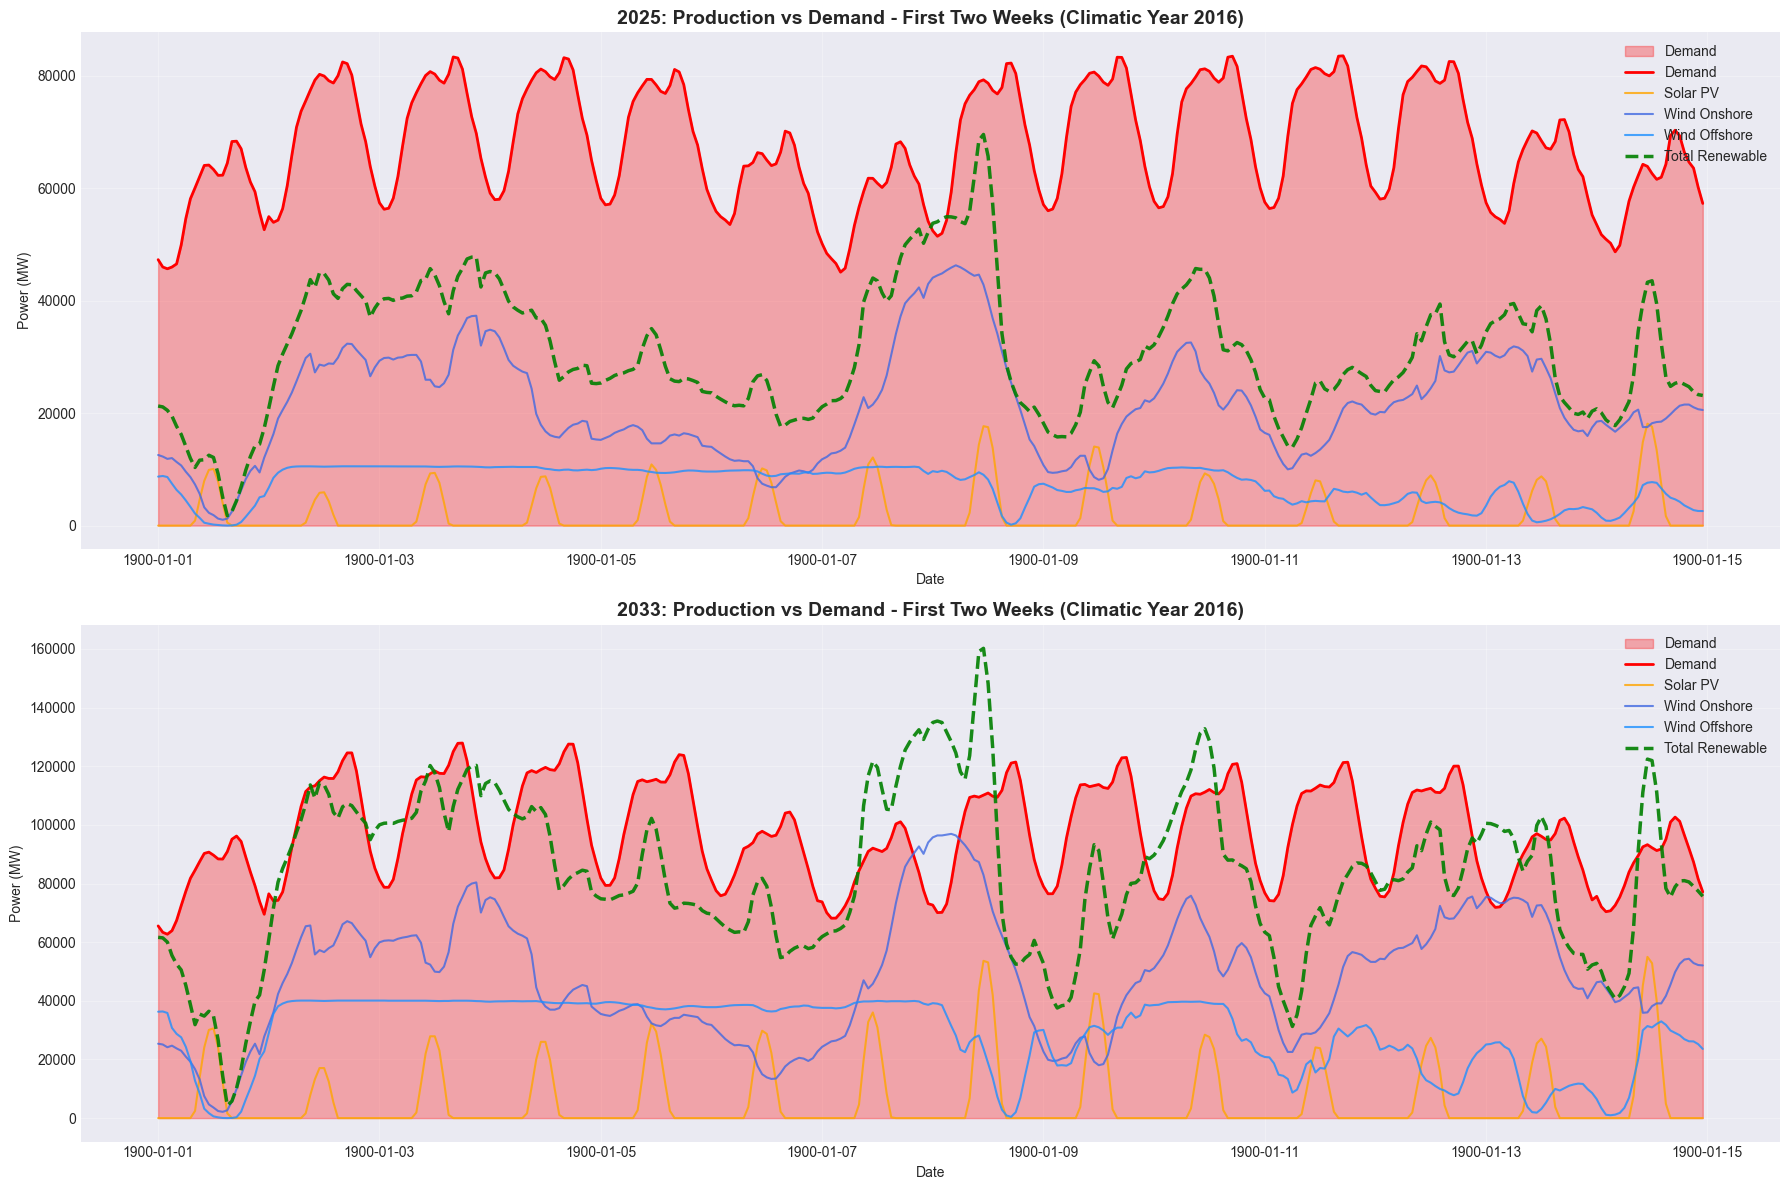

✓ Two-week production vs demand visualized


In [22]:
# Plot production vs demand for sample climatic year
sample_2025_dp = demand_production_2025[demand_production_2025['climatic_year'] == sample_year].copy()
sample_2033_dp = demand_production_2033[demand_production_2033['climatic_year'] == sample_year].copy()

# Plot first two weeks
fig, axes = plt.subplots(2, 1, figsize=(18, 12))

# 2025 - First two weeks
sample_2w_2025 = sample_2025_dp.head(14*24)
axes[0].fill_between(sample_2w_2025['datetime'], 0, sample_2w_2025['demand_MW'], 
                      alpha=0.3, color='red', label='Demand')
axes[0].plot(sample_2w_2025['datetime'], sample_2w_2025['demand_MW'], 
             color='red', linewidth=2, label='Demand')

axes[0].plot(sample_2w_2025['datetime'], sample_2w_2025['solar_MW'], 
             label='Solar PV', linewidth=1.5, alpha=0.8, color='#FFA500')
axes[0].plot(sample_2w_2025['datetime'], sample_2w_2025['wind_onshore_MW'], 
             label='Wind Onshore', linewidth=1.5, alpha=0.8, color='#4169E1')
axes[0].plot(sample_2w_2025['datetime'], sample_2w_2025['wind_offshore_MW'], 
             label='Wind Offshore', linewidth=1.5, alpha=0.8, color='#1E90FF')
axes[0].plot(sample_2w_2025['datetime'], sample_2w_2025['total_renewable_MW'], 
             label='Total Renewable', linewidth=2.5, alpha=0.9, color='green', linestyle='--')

axes[0].set_title(f'2025: Production vs Demand - First Two Weeks (Climatic Year {sample_year})', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Power (MW)')
axes[0].legend(loc='upper right', fontsize=10)
axes[0].grid(True, alpha=0.3)

# 2033 - First two weeks
sample_2w_2033 = sample_2033_dp.head(14*24)
axes[1].fill_between(sample_2w_2033['datetime'], 0, sample_2w_2033['demand_MW'], 
                      alpha=0.3, color='red', label='Demand')
axes[1].plot(sample_2w_2033['datetime'], sample_2w_2033['demand_MW'], 
             color='red', linewidth=2, label='Demand')

axes[1].plot(sample_2w_2033['datetime'], sample_2w_2033['solar_MW'], 
             label='Solar PV', linewidth=1.5, alpha=0.8, color='#FFA500')
axes[1].plot(sample_2w_2033['datetime'], sample_2w_2033['wind_onshore_MW'], 
             label='Wind Onshore', linewidth=1.5, alpha=0.8, color='#4169E1')
axes[1].plot(sample_2w_2033['datetime'], sample_2w_2033['wind_offshore_MW'], 
             label='Wind Offshore', linewidth=1.5, alpha=0.8, color='#1E90FF')
axes[1].plot(sample_2w_2033['datetime'], sample_2w_2033['total_renewable_MW'], 
             label='Total Renewable', linewidth=2.5, alpha=0.9, color='green', linestyle='--')

axes[1].set_title(f'2033: Production vs Demand - First Two Weeks (Climatic Year {sample_year})', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Power (MW)')
axes[1].legend(loc='upper right', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Two-week production vs demand visualized")


### 11.2 Surplus and Deficit Analysis


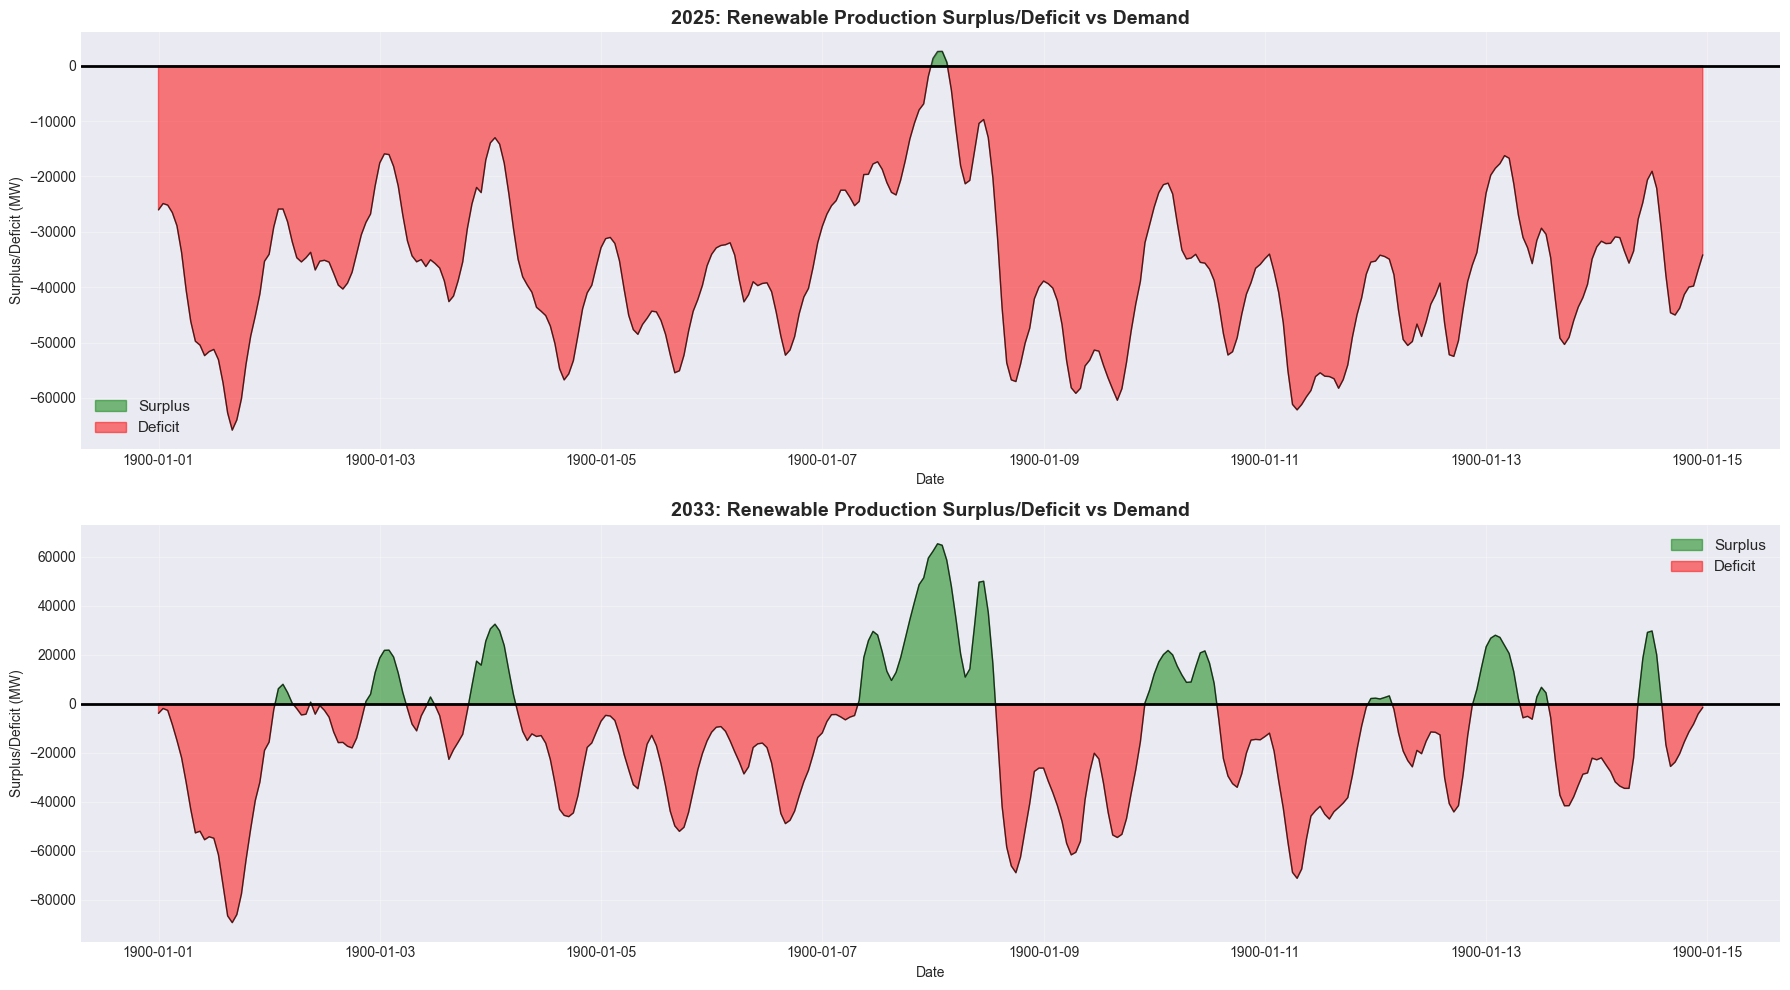

✓ Surplus/deficit analysis visualized


In [23]:
# Visualize surplus/deficit for the two-week period
fig, axes = plt.subplots(2, 1, figsize=(18, 10))

# 2025
axes[0].fill_between(sample_2w_2025['datetime'], 0, sample_2w_2025['surplus_deficit_MW'],
                     where=(sample_2w_2025['surplus_deficit_MW'] >= 0),
                     alpha=0.5, color='green', label='Surplus', interpolate=True)
axes[0].fill_between(sample_2w_2025['datetime'], 0, sample_2w_2025['surplus_deficit_MW'],
                     where=(sample_2w_2025['surplus_deficit_MW'] < 0),
                     alpha=0.5, color='red', label='Deficit', interpolate=True)
axes[0].plot(sample_2w_2025['datetime'], sample_2w_2025['surplus_deficit_MW'],
             color='black', linewidth=1, alpha=0.7)
axes[0].axhline(y=0, color='black', linewidth=2, linestyle='-')
axes[0].set_title(f'2025: Renewable Production Surplus/Deficit vs Demand', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Surplus/Deficit (MW)')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# 2033
axes[1].fill_between(sample_2w_2033['datetime'], 0, sample_2w_2033['surplus_deficit_MW'],
                     where=(sample_2w_2033['surplus_deficit_MW'] >= 0),
                     alpha=0.5, color='green', label='Surplus', interpolate=True)
axes[1].fill_between(sample_2w_2033['datetime'], 0, sample_2w_2033['surplus_deficit_MW'],
                     where=(sample_2w_2033['surplus_deficit_MW'] < 0),
                     alpha=0.5, color='red', label='Deficit', interpolate=True)
axes[1].plot(sample_2w_2033['datetime'], sample_2w_2033['surplus_deficit_MW'],
             color='black', linewidth=1, alpha=0.7)
axes[1].axhline(y=0, color='black', linewidth=2, linestyle='-')
axes[1].set_title(f'2033: Renewable Production Surplus/Deficit vs Demand', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Surplus/Deficit (MW)')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Surplus/deficit analysis visualized")


### 11.3 Hourly Average Production vs Demand Patterns


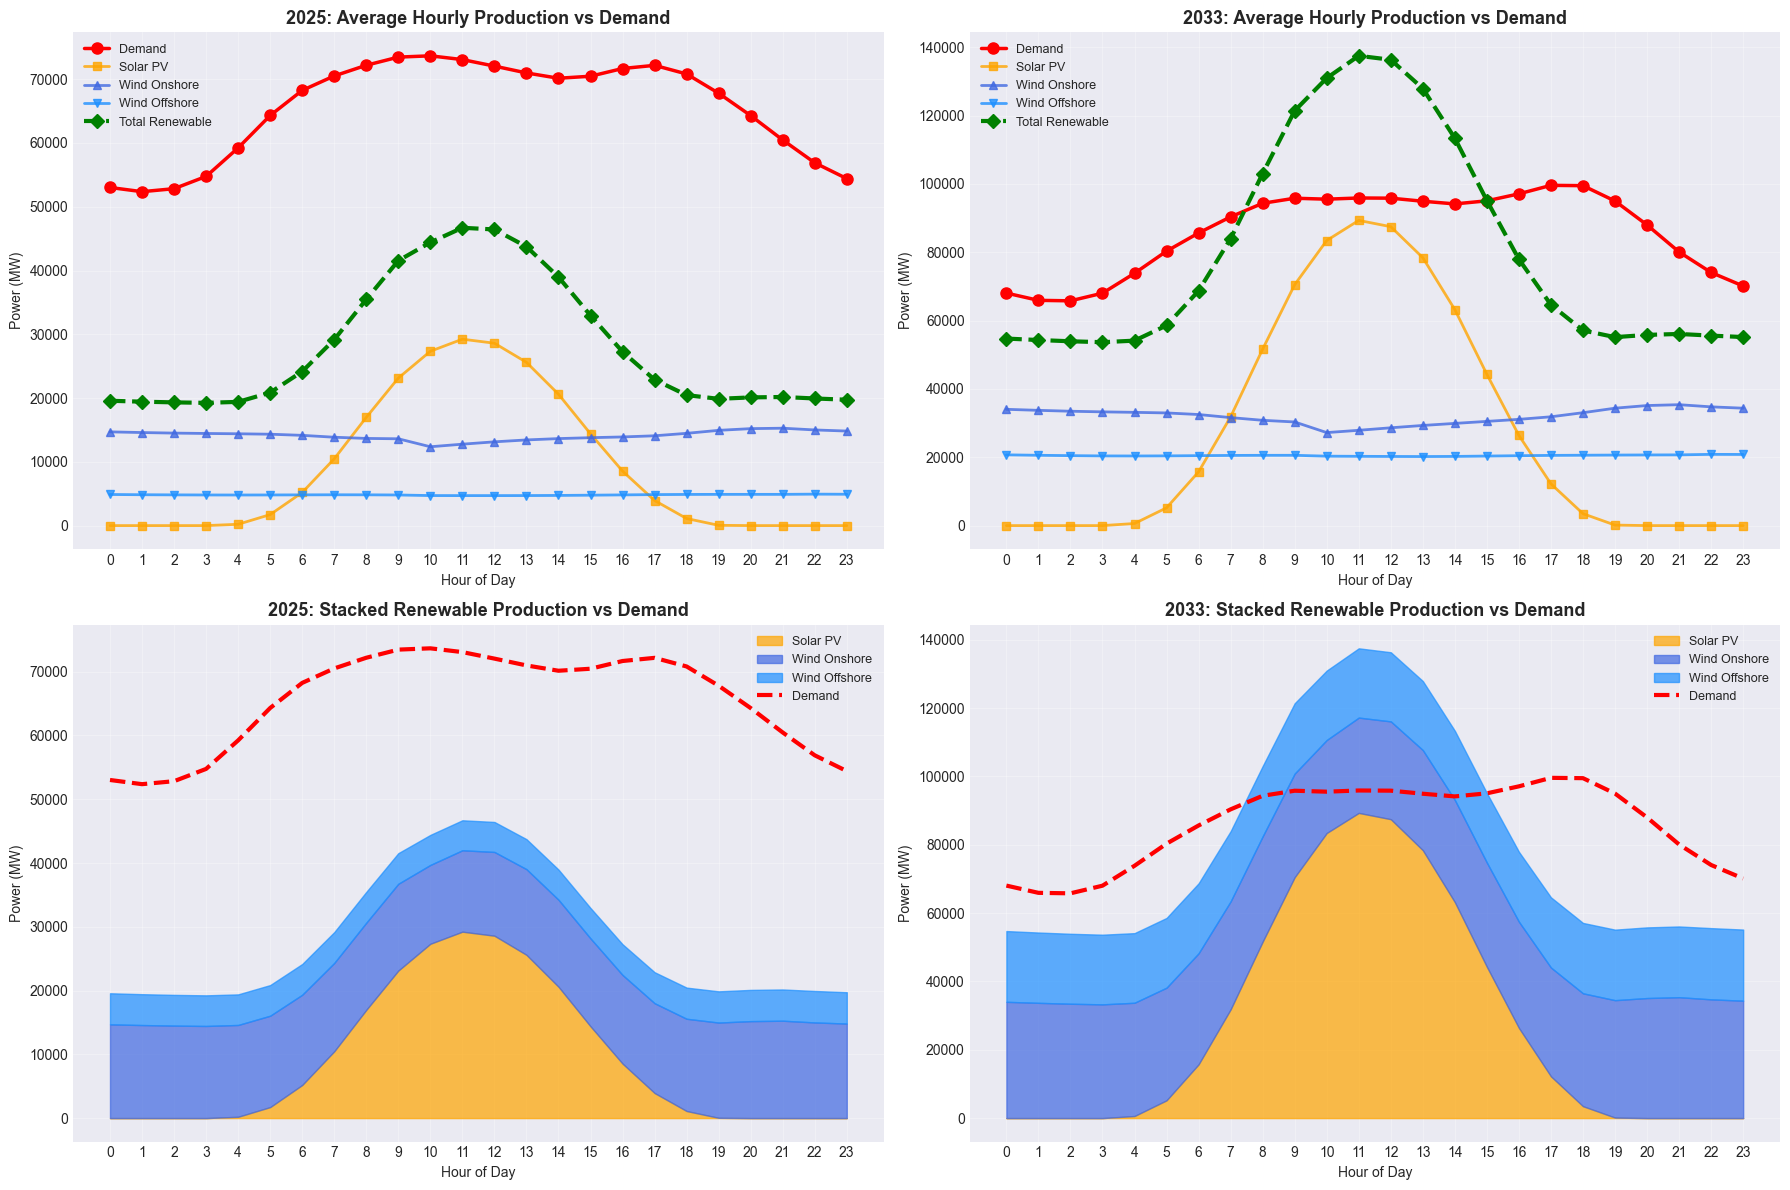

✓ Hourly production patterns visualized


In [24]:
# Average by hour of day
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 2025 - Hourly production pattern
hourly_2025 = demand_production_2025.groupby('hour').agg({
    'demand_MW': 'mean',
    'solar_MW': 'mean',
    'wind_onshore_MW': 'mean',
    'wind_offshore_MW': 'mean',
    'total_renewable_MW': 'mean'
})

axes[0, 0].plot(hourly_2025.index, hourly_2025['demand_MW'], 
                marker='o', linewidth=2.5, markersize=8, label='Demand', color='red')
axes[0, 0].plot(hourly_2025.index, hourly_2025['solar_MW'], 
                marker='s', linewidth=2, markersize=6, label='Solar PV', color='#FFA500', alpha=0.8)
axes[0, 0].plot(hourly_2025.index, hourly_2025['wind_onshore_MW'], 
                marker='^', linewidth=2, markersize=6, label='Wind Onshore', color='#4169E1', alpha=0.8)
axes[0, 0].plot(hourly_2025.index, hourly_2025['wind_offshore_MW'], 
                marker='v', linewidth=2, markersize=6, label='Wind Offshore', color='#1E90FF', alpha=0.8)
axes[0, 0].plot(hourly_2025.index, hourly_2025['total_renewable_MW'], 
                marker='D', linewidth=3, markersize=7, label='Total Renewable', color='green', linestyle='--')
axes[0, 0].set_title('2025: Average Hourly Production vs Demand', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Power (MW)')
axes[0, 0].set_xticks(range(0, 24))
axes[0, 0].legend(fontsize=9, loc='upper left')
axes[0, 0].grid(True, alpha=0.3)

# 2033 - Hourly production pattern
hourly_2033 = demand_production_2033.groupby('hour').agg({
    'demand_MW': 'mean',
    'solar_MW': 'mean',
    'wind_onshore_MW': 'mean',
    'wind_offshore_MW': 'mean',
    'total_renewable_MW': 'mean'
})

axes[0, 1].plot(hourly_2033.index, hourly_2033['demand_MW'], 
                marker='o', linewidth=2.5, markersize=8, label='Demand', color='red')
axes[0, 1].plot(hourly_2033.index, hourly_2033['solar_MW'], 
                marker='s', linewidth=2, markersize=6, label='Solar PV', color='#FFA500', alpha=0.8)
axes[0, 1].plot(hourly_2033.index, hourly_2033['wind_onshore_MW'], 
                marker='^', linewidth=2, markersize=6, label='Wind Onshore', color='#4169E1', alpha=0.8)
axes[0, 1].plot(hourly_2033.index, hourly_2033['wind_offshore_MW'], 
                marker='v', linewidth=2, markersize=6, label='Wind Offshore', color='#1E90FF', alpha=0.8)
axes[0, 1].plot(hourly_2033.index, hourly_2033['total_renewable_MW'], 
                marker='D', linewidth=3, markersize=7, label='Total Renewable', color='green', linestyle='--')
axes[0, 1].set_title('2033: Average Hourly Production vs Demand', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Hour of Day')
axes[0, 1].set_ylabel('Power (MW)')
axes[0, 1].set_xticks(range(0, 24))
axes[0, 1].legend(fontsize=9, loc='upper left')
axes[0, 1].grid(True, alpha=0.3)

# Stacked area chart for 2025
axes[1, 0].fill_between(hourly_2025.index, 0, hourly_2025['solar_MW'], 
                        label='Solar PV', color='#FFA500', alpha=0.7)
axes[1, 0].fill_between(hourly_2025.index, hourly_2025['solar_MW'], 
                        hourly_2025['solar_MW'] + hourly_2025['wind_onshore_MW'],
                        label='Wind Onshore', color='#4169E1', alpha=0.7)
axes[1, 0].fill_between(hourly_2025.index, 
                        hourly_2025['solar_MW'] + hourly_2025['wind_onshore_MW'],
                        hourly_2025['total_renewable_MW'],
                        label='Wind Offshore', color='#1E90FF', alpha=0.7)
axes[1, 0].plot(hourly_2025.index, hourly_2025['demand_MW'], 
                linewidth=3, label='Demand', color='red', linestyle='--')
axes[1, 0].set_title('2025: Stacked Renewable Production vs Demand', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Power (MW)')
axes[1, 0].set_xticks(range(0, 24))
axes[1, 0].legend(fontsize=9)
axes[1, 0].grid(True, alpha=0.3)

# Stacked area chart for 2033
axes[1, 1].fill_between(hourly_2033.index, 0, hourly_2033['solar_MW'], 
                        label='Solar PV', color='#FFA500', alpha=0.7)
axes[1, 1].fill_between(hourly_2033.index, hourly_2033['solar_MW'], 
                        hourly_2033['solar_MW'] + hourly_2033['wind_onshore_MW'],
                        label='Wind Onshore', color='#4169E1', alpha=0.7)
axes[1, 1].fill_between(hourly_2033.index, 
                        hourly_2033['solar_MW'] + hourly_2033['wind_onshore_MW'],
                        hourly_2033['total_renewable_MW'],
                        label='Wind Offshore', color='#1E90FF', alpha=0.7)
axes[1, 1].plot(hourly_2033.index, hourly_2033['demand_MW'], 
                linewidth=3, label='Demand', color='red', linestyle='--')
axes[1, 1].set_title('2033: Stacked Renewable Production vs Demand', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Power (MW)')
axes[1, 1].set_xticks(range(0, 24))
axes[1, 1].legend(fontsize=9)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Hourly production patterns visualized")


### 11.4 Renewable Coverage Analysis


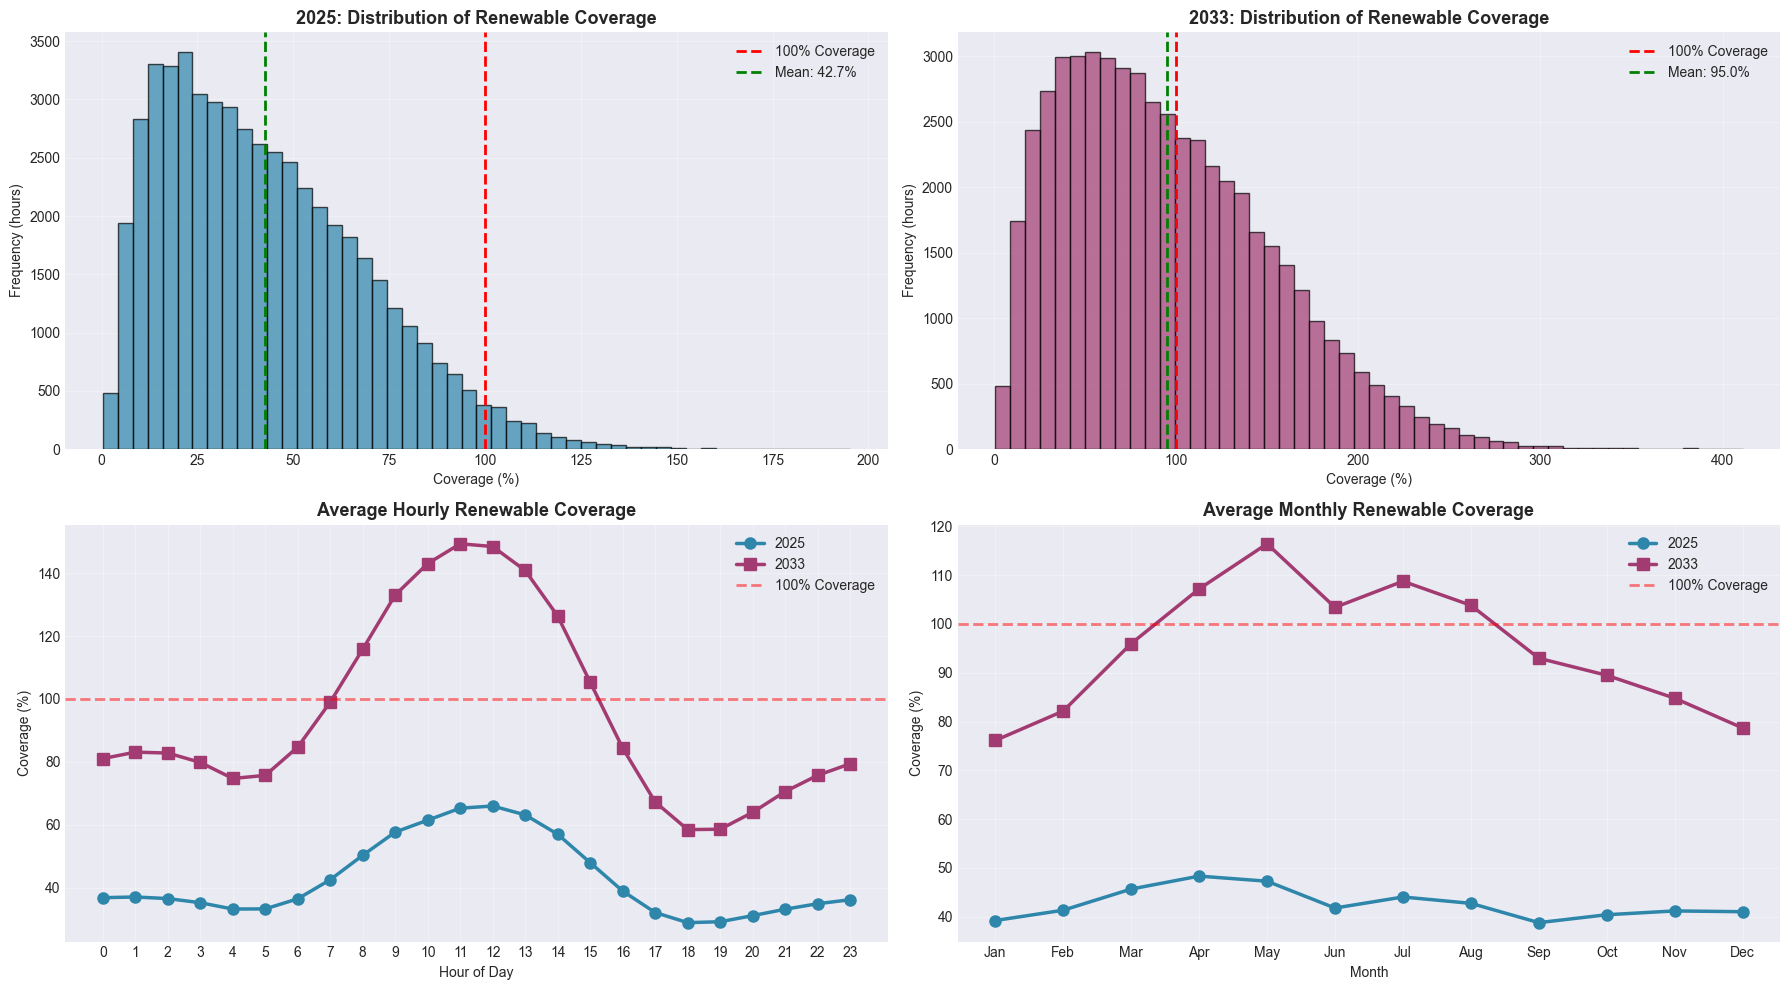

✓ Renewable coverage analysis visualized


In [25]:
# Coverage percentage analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Histogram of coverage percentage - 2025
axes[0, 0].hist(demand_production_2025['renewable_coverage_pct'], bins=50, 
                color='#2E86AB', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(x=100, color='red', linewidth=2, linestyle='--', label='100% Coverage')
axes[0, 0].axvline(x=demand_production_2025['renewable_coverage_pct'].mean(), 
                   color='green', linewidth=2, linestyle='--', 
                   label=f'Mean: {demand_production_2025["renewable_coverage_pct"].mean():.1f}%')
axes[0, 0].set_title('2025: Distribution of Renewable Coverage', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Coverage (%)')
axes[0, 0].set_ylabel('Frequency (hours)')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Histogram of coverage percentage - 2033
axes[0, 1].hist(demand_production_2033['renewable_coverage_pct'], bins=50, 
                color='#A23B72', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(x=100, color='red', linewidth=2, linestyle='--', label='100% Coverage')
axes[0, 1].axvline(x=demand_production_2033['renewable_coverage_pct'].mean(), 
                   color='green', linewidth=2, linestyle='--', 
                   label=f'Mean: {demand_production_2033["renewable_coverage_pct"].mean():.1f}%')
axes[0, 1].set_title('2033: Distribution of Renewable Coverage', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Coverage (%)')
axes[0, 1].set_ylabel('Frequency (hours)')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# Hourly average coverage
hourly_coverage_2025 = demand_production_2025.groupby('hour')['renewable_coverage_pct'].mean()
hourly_coverage_2033 = demand_production_2033.groupby('hour')['renewable_coverage_pct'].mean()

axes[1, 0].plot(hourly_coverage_2025.index, hourly_coverage_2025.values, 
                marker='o', linewidth=2.5, markersize=8, label='2025', color='#2E86AB')
axes[1, 0].plot(hourly_coverage_2033.index, hourly_coverage_2033.values, 
                marker='s', linewidth=2.5, markersize=8, label='2033', color='#A23B72')
axes[1, 0].axhline(y=100, color='red', linewidth=2, linestyle='--', alpha=0.5, label='100% Coverage')
axes[1, 0].set_title('Average Hourly Renewable Coverage', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Coverage (%)')
axes[1, 0].set_xticks(range(0, 24))
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# Monthly average coverage
monthly_coverage_2025 = demand_production_2025.groupby('month')['renewable_coverage_pct'].mean()
monthly_coverage_2033 = demand_production_2033.groupby('month')['renewable_coverage_pct'].mean()

month_names_short = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

axes[1, 1].plot(monthly_coverage_2025.index, monthly_coverage_2025.values, 
                marker='o', linewidth=2.5, markersize=8, label='2025', color='#2E86AB')
axes[1, 1].plot(monthly_coverage_2033.index, monthly_coverage_2033.values, 
                marker='s', linewidth=2.5, markersize=8, label='2033', color='#A23B72')
axes[1, 1].axhline(y=100, color='red', linewidth=2, linestyle='--', alpha=0.5, label='100% Coverage')
axes[1, 1].set_title('Average Monthly Renewable Coverage', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Coverage (%)')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].set_xticklabels(month_names_short)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Renewable coverage analysis visualized")


## 12. Year-over-Year Comparison (2025 vs 2033)


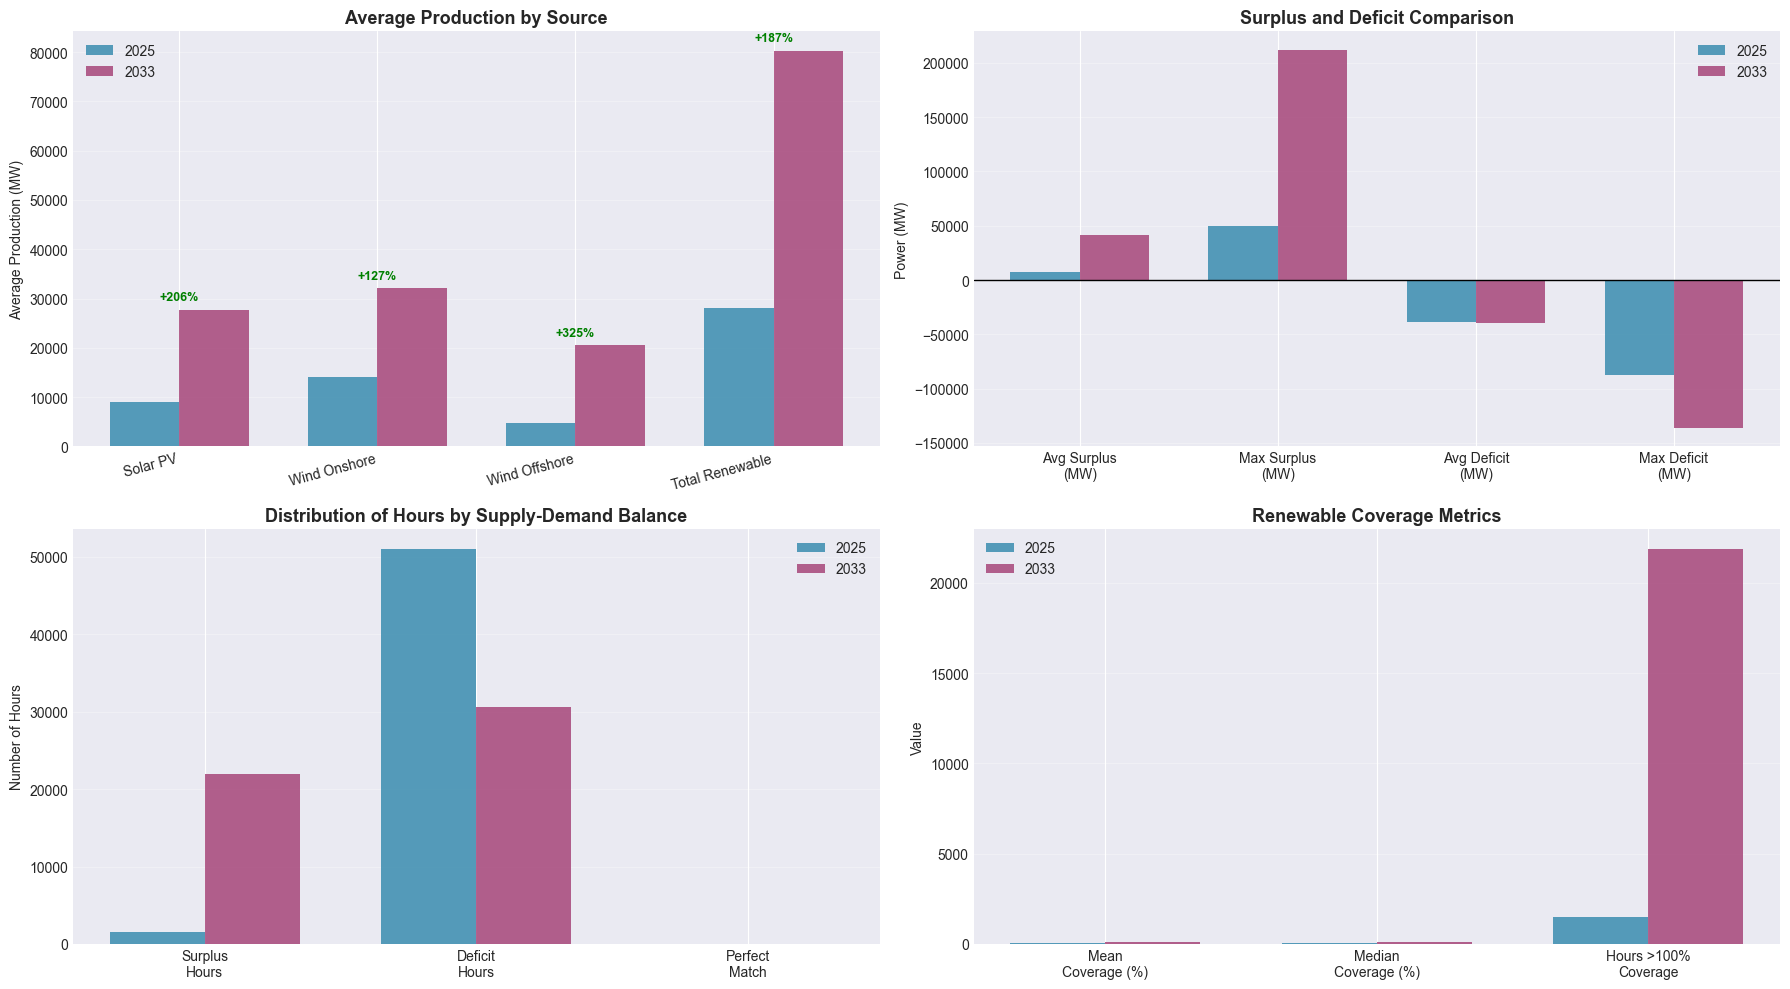

✓ Year-over-year comparison visualized


In [26]:
# Direct comparison of changes
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Production by source comparison
production_sources = ['Solar PV', 'Wind Onshore', 'Wind Offshore', 'Total Renewable']
production_2025_avg = [
    demand_production_2025['solar_MW'].mean(),
    demand_production_2025['wind_onshore_MW'].mean(),
    demand_production_2025['wind_offshore_MW'].mean(),
    demand_production_2025['total_renewable_MW'].mean()
]
production_2033_avg = [
    demand_production_2033['solar_MW'].mean(),
    demand_production_2033['wind_onshore_MW'].mean(),
    demand_production_2033['wind_offshore_MW'].mean(),
    demand_production_2033['total_renewable_MW'].mean()
]

x = np.arange(len(production_sources))
width = 0.35

axes[0, 0].bar(x - width/2, production_2025_avg, width, label='2025', color='#2E86AB', alpha=0.8)
axes[0, 0].bar(x + width/2, production_2033_avg, width, label='2033', color='#A23B72', alpha=0.8)
axes[0, 0].set_title('Average Production by Source', fontsize=13, fontweight='bold')
axes[0, 0].set_ylabel('Average Production (MW)')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(production_sources, rotation=15, ha='right')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Add percentage increase labels
for i, (p2025, p2033) in enumerate(zip(production_2025_avg, production_2033_avg)):
    increase_pct = ((p2033 - p2025) / p2025 * 100) if p2025 > 0 else 0
    axes[0, 0].text(i, max(p2025, p2033) + 2000, f'+{increase_pct:.0f}%', 
                    ha='center', fontsize=9, fontweight='bold', color='green')

# Surplus/Deficit comparison
metrics = ['Avg Surplus\n(MW)', 'Max Surplus\n(MW)', 'Avg Deficit\n(MW)', 'Max Deficit\n(MW)']

surplus_2025 = demand_production_2025[demand_production_2025['surplus_deficit_MW'] > 0]['surplus_deficit_MW']
deficit_2025 = demand_production_2025[demand_production_2025['surplus_deficit_MW'] < 0]['surplus_deficit_MW']
surplus_2033 = demand_production_2033[demand_production_2033['surplus_deficit_MW'] > 0]['surplus_deficit_MW']
deficit_2033 = demand_production_2033[demand_production_2033['surplus_deficit_MW'] < 0]['surplus_deficit_MW']

values_2025 = [
    surplus_2025.mean() if len(surplus_2025) > 0 else 0,
    surplus_2025.max() if len(surplus_2025) > 0 else 0,
    deficit_2025.mean() if len(deficit_2025) > 0 else 0,
    deficit_2025.min() if len(deficit_2025) > 0 else 0  # min because it's negative
]
values_2033 = [
    surplus_2033.mean() if len(surplus_2033) > 0 else 0,
    surplus_2033.max() if len(surplus_2033) > 0 else 0,
    deficit_2033.mean() if len(deficit_2033) > 0 else 0,
    deficit_2033.min() if len(deficit_2033) > 0 else 0
]

x2 = np.arange(len(metrics))
axes[0, 1].bar(x2 - width/2, values_2025, width, label='2025', color='#2E86AB', alpha=0.8)
axes[0, 1].bar(x2 + width/2, values_2033, width, label='2033', color='#A23B72', alpha=0.8)
axes[0, 1].set_title('Surplus and Deficit Comparison', fontsize=13, fontweight='bold')
axes[0, 1].set_ylabel('Power (MW)')
axes[0, 1].set_xticks(x2)
axes[0, 1].set_xticklabels(metrics, fontsize=10)
axes[0, 1].axhline(y=0, color='black', linewidth=1, linestyle='-')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Hours with surplus/deficit/full coverage
hours_surplus_2025 = (demand_production_2025['surplus_deficit_MW'] > 0).sum()
hours_deficit_2025 = (demand_production_2025['surplus_deficit_MW'] < 0).sum()
hours_perfect_2025 = (demand_production_2025['surplus_deficit_MW'] == 0).sum()

hours_surplus_2033 = (demand_production_2033['surplus_deficit_MW'] > 0).sum()
hours_deficit_2033 = (demand_production_2033['surplus_deficit_MW'] < 0).sum()
hours_perfect_2033 = (demand_production_2033['surplus_deficit_MW'] == 0).sum()

categories = ['Surplus\nHours', 'Deficit\nHours', 'Perfect\nMatch']
values_2025_hours = [hours_surplus_2025, hours_deficit_2025, hours_perfect_2025]
values_2033_hours = [hours_surplus_2033, hours_deficit_2033, hours_perfect_2033]

x3 = np.arange(len(categories))
axes[1, 0].bar(x3 - width/2, values_2025_hours, width, label='2025', color='#2E86AB', alpha=0.8)
axes[1, 0].bar(x3 + width/2, values_2033_hours, width, label='2033', color='#A23B72', alpha=0.8)
axes[1, 0].set_title('Distribution of Hours by Supply-Demand Balance', fontsize=13, fontweight='bold')
axes[1, 0].set_ylabel('Number of Hours')
axes[1, 0].set_xticks(x3)
axes[1, 0].set_xticklabels(categories, fontsize=10)
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Coverage improvement
coverage_metrics = ['Mean\nCoverage (%)', 'Median\nCoverage (%)', 'Hours >100%\nCoverage']
coverage_vals_2025 = [
    demand_production_2025['renewable_coverage_pct'].mean(),
    demand_production_2025['renewable_coverage_pct'].median(),
    (demand_production_2025['renewable_coverage_pct'] > 100).sum()
]
coverage_vals_2033 = [
    demand_production_2033['renewable_coverage_pct'].mean(),
    demand_production_2033['renewable_coverage_pct'].median(),
    (demand_production_2033['renewable_coverage_pct'] > 100).sum()
]

x4 = np.arange(len(coverage_metrics))
axes[1, 1].bar(x4 - width/2, coverage_vals_2025, width, label='2025', color='#2E86AB', alpha=0.8)
axes[1, 1].bar(x4 + width/2, coverage_vals_2033, width, label='2033', color='#A23B72', alpha=0.8)
axes[1, 1].set_title('Renewable Coverage Metrics', fontsize=13, fontweight='bold')
axes[1, 1].set_ylabel('Value')
axes[1, 1].set_xticks(x4)
axes[1, 1].set_xticklabels(coverage_metrics, fontsize=10)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✓ Year-over-year comparison visualized")


## 13. Key Findings: Production-Demand Analysis


In [27]:
# Comprehensive summary of production-demand analysis
print("=" * 100)
print("KEY FINDINGS: RENEWABLE PRODUCTION VS DEMAND ANALYSIS")
print("=" * 100)

print("\n🔋 RENEWABLE PRODUCTION (Average):")
print(f"  2025:")
print(f"    • Solar PV:        {demand_production_2025['solar_MW'].mean():>10,.0f} MW ({demand_production_2025['solar_MW'].mean() / demand_production_2025['total_renewable_MW'].mean() * 100:>5.1f}% of renewable)")
print(f"    • Wind Onshore:    {demand_production_2025['wind_onshore_MW'].mean():>10,.0f} MW ({demand_production_2025['wind_onshore_MW'].mean() / demand_production_2025['total_renewable_MW'].mean() * 100:>5.1f}% of renewable)")
print(f"    • Wind Offshore:   {demand_production_2025['wind_offshore_MW'].mean():>10,.0f} MW ({demand_production_2025['wind_offshore_MW'].mean() / demand_production_2025['total_renewable_MW'].mean() * 100:>5.1f}% of renewable)")
print(f"    • Total Renewable: {demand_production_2025['total_renewable_MW'].mean():>10,.0f} MW")
print(f"    • Demand:          {demand_production_2025['demand_MW'].mean():>10,.0f} MW")
print(f"    • Coverage:        {demand_production_2025['renewable_coverage_pct'].mean():>10.1f}%")

print(f"\n  2033:")
print(f"    • Solar PV:        {demand_production_2033['solar_MW'].mean():>10,.0f} MW ({demand_production_2033['solar_MW'].mean() / demand_production_2033['total_renewable_MW'].mean() * 100:>5.1f}% of renewable)")
print(f"    • Wind Onshore:    {demand_production_2033['wind_onshore_MW'].mean():>10,.0f} MW ({demand_production_2033['wind_onshore_MW'].mean() / demand_production_2033['total_renewable_MW'].mean() * 100:>5.1f}% of renewable)")
print(f"    • Wind Offshore:   {demand_production_2033['wind_offshore_MW'].mean():>10,.0f} MW ({demand_production_2033['wind_offshore_MW'].mean() / demand_production_2033['total_renewable_MW'].mean() * 100:>5.1f}% of renewable)")
print(f"    • Total Renewable: {demand_production_2033['total_renewable_MW'].mean():>10,.0f} MW")
print(f"    • Demand:          {demand_production_2033['demand_MW'].mean():>10,.0f} MW")
print(f"    • Coverage:        {demand_production_2033['renewable_coverage_pct'].mean():>10.1f}%")

print("\n📊 SUPPLY-DEMAND BALANCE:")
print(f"  2025:")
print(f"    • Hours with surplus:  {hours_surplus_2025:>6,} ({hours_surplus_2025 / len(demand_production_2025) * 100:>5.1f}%)")
print(f"    • Hours with deficit:  {hours_deficit_2025:>6,} ({hours_deficit_2025 / len(demand_production_2025) * 100:>5.1f}%)")
print(f"    • Average surplus:     {surplus_2025.mean():>10,.0f} MW (when in surplus)")
print(f"    • Average deficit:     {deficit_2025.mean():>10,.0f} MW (when in deficit)")
print(f"    • Max surplus:         {surplus_2025.max():>10,.0f} MW")
print(f"    • Max deficit:         {deficit_2025.min():>10,.0f} MW")

print(f"\n  2033:")
print(f"    • Hours with surplus:  {hours_surplus_2033:>6,} ({hours_surplus_2033 / len(demand_production_2033) * 100:>5.1f}%)")
print(f"    • Hours with deficit:  {hours_deficit_2033:>6,} ({hours_deficit_2033 / len(demand_production_2033) * 100:>5.1f}%)")
print(f"    • Average surplus:     {surplus_2033.mean():>10,.0f} MW (when in surplus)")
print(f"    • Average deficit:     {deficit_2033.mean():>10,.0f} MW (when in deficit)")
print(f"    • Max surplus:         {surplus_2033.max():>10,.0f} MW")
print(f"    • Max deficit:         {deficit_2033.min():>10,.0f} MW")

print("\n🌍 CAPACITY FACTORS (Annual Average):")
print(f"  2025:")
print(f"    • Solar PV:        {cf_solar_2025['value'].mean():>6.1%}")
print(f"    • Wind Onshore:    {cf_wind_on_2025['value'].mean():>6.1%}")
print(f"    • Wind Offshore:   {cf_wind_off_2025['value'].mean():>6.1%}")

print(f"\n  2033:")
print(f"    • Solar PV:        {cf_solar_2033['value'].mean():>6.1%}")
print(f"    • Wind Onshore:    {cf_wind_on_2033['value'].mean():>6.1%}")
print(f"    • Wind Offshore:   {cf_wind_off_2033['value'].mean():>6.1%}")

print("\n⚡ TEMPORAL PATTERNS:")
# Find hours with best/worst coverage
best_hour_2025 = hourly_coverage_2025.idxmax()
worst_hour_2025 = hourly_coverage_2025.idxmin()
best_hour_2033 = hourly_coverage_2033.idxmax()
worst_hour_2033 = hourly_coverage_2033.idxmin()

print(f"  2025:")
print(f"    • Best coverage hour:  {best_hour_2025}:00 ({hourly_coverage_2025[best_hour_2025]:.1f}%)")
print(f"    • Worst coverage hour: {worst_hour_2025}:00 ({hourly_coverage_2025[worst_hour_2025]:.1f}%)")

print(f"\n  2033:")
print(f"    • Best coverage hour:  {best_hour_2033}:00 ({hourly_coverage_2033[best_hour_2033]:.1f}%)")
print(f"    • Worst coverage hour: {worst_hour_2033}:00 ({hourly_coverage_2033[worst_hour_2033]:.1f}%)")

# Best and worst months
best_month_2025 = monthly_coverage_2025.idxmax()
worst_month_2025 = monthly_coverage_2025.idxmin()
best_month_2033 = monthly_coverage_2033.idxmax()
worst_month_2033 = monthly_coverage_2033.idxmin()

print(f"\n    • Best coverage month (2025):  {month_names_short[best_month_2025-1]} ({monthly_coverage_2025[best_month_2025]:.1f}%)")
print(f"    • Worst coverage month (2025): {month_names_short[worst_month_2025-1]} ({monthly_coverage_2025[worst_month_2025]:.1f}%)")
print(f"    • Best coverage month (2033):  {month_names_short[best_month_2033-1]} ({monthly_coverage_2033[best_month_2033]:.1f}%)")
print(f"    • Worst coverage month (2033): {month_names_short[worst_month_2033-1]} ({monthly_coverage_2033[worst_month_2033]:.1f}%)")

print("\n" + "=" * 100)
print("CRITICAL INSIGHTS:")
print("=" * 100)

# Calculate needed backup
avg_deficit_gap_2025 = abs(deficit_2025.mean()) if len(deficit_2025) > 0 else 0
avg_deficit_gap_2033 = abs(deficit_2033.mean()) if len(deficit_2033) > 0 else 0
max_deficit_gap_2025 = abs(deficit_2025.min()) if len(deficit_2025) > 0 else 0
max_deficit_gap_2033 = abs(deficit_2033.min()) if len(deficit_2033) > 0 else 0

print(f"\n1. RENEWABLE INTERMITTENCY:")
print(f"   • Even with massive capacity, renewables don't cover demand 100% of the time")
print(f"   • 2025: Deficit in {hours_deficit_2025 / len(demand_production_2025) * 100:.1f}% of hours")
print(f"   • 2033: Deficit in {hours_deficit_2033 / len(demand_production_2033) * 100:.1f}% of hours (improved)")

print(f"\n2. BACKUP CAPACITY NEEDS:")
print(f"   • 2025: Average gap during deficit hours: {avg_deficit_gap_2025:,.0f} MW")
print(f"   • 2033: Average gap during deficit hours: {avg_deficit_gap_2033:,.0f} MW")
print(f"   • This gap must be filled by gas, imports, storage, or demand response")

print(f"\n3. STORAGE/CURTAILMENT OPPORTUNITY:")
surplus_energy_2025 = surplus_2025.sum() / 1000  # GWh
surplus_energy_2033 = surplus_2033.sum() / 1000
print(f"   • 2025: Total surplus energy: {surplus_energy_2025:,.0f} GWh/year (avg across climatic years)")
print(f"   • 2033: Total surplus energy: {surplus_energy_2033:,.0f} GWh/year")
print(f"   • This surplus could be stored, exported, or used for sector coupling (H2, heat)")

print(f"\n4. SOLAR-WIND COMPLEMENTARITY:")
solar_wind_corr_2025 = demand_production_2025[['solar_MW', 'wind_onshore_MW']].corr().iloc[0, 1]
solar_wind_corr_2033 = demand_production_2033[['solar_MW', 'wind_onshore_MW']].corr().iloc[0, 1]
print(f"   • Solar-Wind correlation 2025: {solar_wind_corr_2025:.3f}")
print(f"   • Solar-Wind correlation 2033: {solar_wind_corr_2033:.3f}")
print(f"   • Low correlation is good - they complement each other temporally")

print(f"\n5. EVENING PEAK CHALLENGE:")
evening_coverage_2025 = hourly_coverage_2025[17:21].mean()  # 5pm-9pm
evening_coverage_2033 = hourly_coverage_2033[17:21].mean()
print(f"   • Evening peak (5-9 PM) coverage 2025: {evening_coverage_2025:.1f}%")
print(f"   • Evening peak (5-9 PM) coverage 2033: {evening_coverage_2033:.1f}%")
print(f"   • Solar drops off during evening peak - wind and storage crucial")

print("\n" + "=" * 100)


KEY FINDINGS: RENEWABLE PRODUCTION VS DEMAND ANALYSIS

🔋 RENEWABLE PRODUCTION (Average):
  2025:
    • Solar PV:             9,045 MW ( 32.3% of renewable)
    • Wind Onshore:        14,128 MW ( 50.5% of renewable)
    • Wind Offshore:        4,818 MW ( 17.2% of renewable)
    • Total Renewable:     27,992 MW
    • Demand:              65,411 MW
    • Coverage:              42.7%

  2033:
    • Solar PV:            27,656 MW ( 34.5% of renewable)
    • Wind Onshore:        32,050 MW ( 40.0% of renewable)
    • Wind Offshore:       20,497 MW ( 25.6% of renewable)
    • Total Renewable:     80,203 MW
    • Demand:              85,939 MW
    • Coverage:              95.0%

📊 SUPPLY-DEMAND BALANCE:
  2025:
    • Hours with surplus:   1,507 (  2.9%)
    • Hours with deficit:  51,053 ( 97.1%)
    • Average surplus:          7,812 MW (when in surplus)
    • Average deficit:        -38,754 MW (when in deficit)
    • Max surplus:             49,372 MW
    • Max deficit:            -87,255 MW

 

---

## Final Summary

This comprehensive analysis reveals the challenges and opportunities of Germany's renewable energy transition:

### Production-Demand Mismatch
Despite massive renewable capacity expansion, variability means renewable production alone cannot meet demand 24/7. The system still needs significant backup capacity from gas, storage, demand response, and interconnections.

### Key Operational Challenges
1. **Evening Peak Gap**: Solar production drops during evening demand peaks (5-9 PM)
2. **Seasonal Variation**: Winter months show lower renewable coverage despite higher demand
3. **Intermittency**: Even by 2033, renewables have deficit hours requiring backup

### System Solutions Required
1. **Energy Storage**: Battery capacity grows 6x, but more needed to capture surplus
2. **Grid Flexibility**: Gas plants provide backup during low renewable periods  
3. **Sector Coupling**: Massive surplus energy can be used for hydrogen, heating, EV charging
4. **Interconnections**: Cross-border trade essential for balancing supply-demand

The data demonstrates that the energy transition is not just about capacity, but about managing intermittency through storage, flexibility, and smart grid operations.


---

# Part 3: Total System Production Analysis

Now we'll analyze the complete production mix including all generation sources.


## 14. Estimate Total Production Capacity

For this analysis, we'll assume dispatchable sources (gas, hydro) operate to fill the gap between renewable production and demand, up to their capacity limits.


In [33]:
# Calculate total production including ALL dispatchable sources
# For dispatchable sources, we assume they produce to meet demand when renewables fall short

# Get ALL non-zero capacities from our capacity comparison
def get_capacity(tech_name, year):
    """Helper to safely get capacity for a technology"""
    mask = capacity_comparison_active['Technology'] == tech_name
    if mask.any():
        col = f'Total_{year}_MW'
        return capacity_comparison_active[mask][col].values[0]
    return 0.0

# Extract all dispatchable capacities for 2025
gas_capacity_2025 = get_capacity('Gas ', 2025)
hard_coal_capacity_2025 = get_capacity('Hard Coal', 2025)
lignite_capacity_2025 = get_capacity('Lignite', 2025)
oil_capacity_2025 = get_capacity('Oil', 2025)
others_nonren_capacity_2025 = get_capacity('Others non-renewable', 2025)
others_ren_capacity_2025 = get_capacity('Others renewable', 2025)

# Hydro - sum all hydro types
hydro_techs = ['Hydro - Run of River', 'Hydro - Reservoir', 
               'Hydro - Pump Storage Open Loop', 'Hydro - Pump Storage Closed Loop']
hydro_capacity_2025 = capacity_comparison_active[capacity_comparison_active['Technology'].isin(hydro_techs)]['Total_2025_MW'].sum()

# Extract all dispatchable capacities for 2033
gas_capacity_2033 = get_capacity('Gas ', 2033)
hard_coal_capacity_2033 = get_capacity('Hard Coal', 2033)
lignite_capacity_2033 = get_capacity('Lignite', 2033)
oil_capacity_2033 = get_capacity('Oil', 2033)
others_nonren_capacity_2033 = get_capacity('Others non-renewable', 2033)
others_ren_capacity_2033 = get_capacity('Others renewable', 2033)
hydro_capacity_2033 = capacity_comparison_active[capacity_comparison_active['Technology'].isin(hydro_techs)]['Total_2033_MW'].sum()

print("ALL Production Capacities (Non-Zero Sources):")
print("\n2025:")
print(f"  Gas:                {gas_capacity_2025:>10,.0f} MW")
print(f"  Hard Coal:          {hard_coal_capacity_2025:>10,.0f} MW")
print(f"  Lignite:            {lignite_capacity_2025:>10,.0f} MW")
print(f"  Oil:                {oil_capacity_2025:>10,.0f} MW")
print(f"  Others non-ren:     {others_nonren_capacity_2025:>10,.0f} MW")
print(f"  Others renewable:   {others_ren_capacity_2025:>10,.0f} MW")
print(f"  Hydro (all types):  {hydro_capacity_2025:>10,.0f} MW")

print("\n2033:")
print(f"  Gas:                {gas_capacity_2033:>10,.0f} MW")
print(f"  Hard Coal:          {hard_coal_capacity_2033:>10,.0f} MW")
print(f"  Lignite:            {lignite_capacity_2033:>10,.0f} MW")
print(f"  Oil:                {oil_capacity_2033:>10,.0f} MW")
print(f"  Others non-ren:     {others_nonren_capacity_2033:>10,.0f} MW")
print(f"  Others renewable:   {others_ren_capacity_2033:>10,.0f} MW")
print(f"  Hydro (all types):  {hydro_capacity_2033:>10,.0f} MW")

# Create total production dataframes
total_production_2025 = demand_production_2025.copy()
total_production_2033 = demand_production_2033.copy()

# Calculate gap that needs to be filled by dispatchable sources
total_production_2025['renewable_gap_MW'] = np.maximum(0, 
    total_production_2025['demand_MW'] - total_production_2025['total_renewable_MW'])
total_production_2033['renewable_gap_MW'] = np.maximum(0, 
    total_production_2033['demand_MW'] - total_production_2033['total_renewable_MW'])

# Assume capacity factors for different technologies
hydro_cf = 0.40  # Typical for German hydro
coal_lignite_cf = 0.45  # Coal plants typically run as baseload when online
oil_cf = 0.10  # Peak/backup only
others_cf = 0.35  # Mixed technologies

# Calculate production from each source
# Baseload sources (run at constant capacity factor)
total_production_2025['hydro_MW'] = hydro_capacity_2025 * hydro_cf
total_production_2025['hard_coal_MW'] = hard_coal_capacity_2025 * coal_lignite_cf
total_production_2025['lignite_MW'] = lignite_capacity_2025 * coal_lignite_cf
total_production_2025['others_ren_MW'] = others_ren_capacity_2025 * others_cf
total_production_2025['others_nonren_MW'] = others_nonren_capacity_2025 * others_cf

total_production_2033['hydro_MW'] = hydro_capacity_2033 * hydro_cf
total_production_2033['hard_coal_MW'] = hard_coal_capacity_2033 * coal_lignite_cf
total_production_2033['lignite_MW'] = lignite_capacity_2033 * coal_lignite_cf
total_production_2033['others_ren_MW'] = others_ren_capacity_2033 * others_cf
total_production_2033['others_nonren_MW'] = others_nonren_capacity_2033 * others_cf

# Calculate remaining gap after baseload sources
total_production_2025['baseload_MW'] = (
    total_production_2025['hydro_MW'] + 
    total_production_2025['hard_coal_MW'] + 
    total_production_2025['lignite_MW'] +
    total_production_2025['others_ren_MW'] +
    total_production_2025['others_nonren_MW']
)

total_production_2033['baseload_MW'] = (
    total_production_2033['hydro_MW'] + 
    total_production_2033['hard_coal_MW'] + 
    total_production_2033['lignite_MW'] +
    total_production_2033['others_ren_MW'] +
    total_production_2033['others_nonren_MW']
)

# Gas and Oil fill remaining gap (flexible/peaking)
total_production_2025['remaining_gap_MW'] = np.maximum(0, 
    total_production_2025['renewable_gap_MW'] - total_production_2025['baseload_MW'])
total_production_2033['remaining_gap_MW'] = np.maximum(0, 
    total_production_2033['renewable_gap_MW'] - total_production_2033['baseload_MW'])

# Gas takes most of the remaining load
total_production_2025['gas_MW'] = np.minimum(
    total_production_2025['remaining_gap_MW'],
    gas_capacity_2025
)
total_production_2033['gas_MW'] = np.minimum(
    total_production_2033['remaining_gap_MW'],
    gas_capacity_2033
)

# Oil fills any remaining gap (peaker plants)
total_production_2025['oil_MW'] = np.minimum(
    np.maximum(0, total_production_2025['remaining_gap_MW'] - total_production_2025['gas_MW']),
    oil_capacity_2025
)
total_production_2033['oil_MW'] = np.minimum(
    np.maximum(0, total_production_2033['remaining_gap_MW'] - total_production_2033['gas_MW']),
    oil_capacity_2033
)

# Calculate total production from ALL sources
total_production_2025['total_production_MW'] = (
    total_production_2025['total_renewable_MW'] +  # Solar + Wind On + Wind Off
    total_production_2025['hydro_MW'] + 
    total_production_2025['hard_coal_MW'] +
    total_production_2025['lignite_MW'] +
    total_production_2025['gas_MW'] +
    total_production_2025['oil_MW'] +
    total_production_2025['others_ren_MW'] +
    total_production_2025['others_nonren_MW']
)

total_production_2033['total_production_MW'] = (
    total_production_2033['total_renewable_MW'] +
    total_production_2033['hydro_MW'] + 
    total_production_2033['hard_coal_MW'] +
    total_production_2033['lignite_MW'] +
    total_production_2033['gas_MW'] +
    total_production_2033['oil_MW'] +
    total_production_2033['others_ren_MW'] +
    total_production_2033['others_nonren_MW']
)

# New surplus/deficit with all sources
total_production_2025['total_surplus_deficit_MW'] = (
    total_production_2025['total_production_MW'] - total_production_2025['demand_MW']
)
total_production_2033['total_surplus_deficit_MW'] = (
    total_production_2033['total_production_MW'] - total_production_2033['demand_MW']
)

print("\n✓ Total production calculations completed (ALL sources included)")
print(f"\n2025 Average Production Mix:")
print(f"  Solar:          {total_production_2025['solar_MW'].mean():>10,.0f} MW")
print(f"  Wind Onshore:   {total_production_2025['wind_onshore_MW'].mean():>10,.0f} MW")
print(f"  Wind Offshore:  {total_production_2025['wind_offshore_MW'].mean():>10,.0f} MW")
print(f"  Hydro:          {total_production_2025['hydro_MW'].mean():>10,.0f} MW")
print(f"  Hard Coal:      {total_production_2025['hard_coal_MW'].mean():>10,.0f} MW")
print(f"  Lignite:        {total_production_2025['lignite_MW'].mean():>10,.0f} MW")
print(f"  Gas:            {total_production_2025['gas_MW'].mean():>10,.0f} MW")
print(f"  Oil:            {total_production_2025['oil_MW'].mean():>10,.0f} MW")
print(f"  Others Ren:     {total_production_2025['others_ren_MW'].mean():>10,.0f} MW")
print(f"  Others Non-Ren: {total_production_2025['others_nonren_MW'].mean():>10,.0f} MW")
print(f"  ──────────────────────────────")
print(f"  Total Prod:     {total_production_2025['total_production_MW'].mean():>10,.0f} MW")
print(f"  Demand:         {total_production_2025['demand_MW'].mean():>10,.0f} MW")

print(f"\n2033 Average Production Mix:")
print(f"  Solar:          {total_production_2033['solar_MW'].mean():>10,.0f} MW")
print(f"  Wind Onshore:   {total_production_2033['wind_onshore_MW'].mean():>10,.0f} MW")
print(f"  Wind Offshore:  {total_production_2033['wind_offshore_MW'].mean():>10,.0f} MW")
print(f"  Hydro:          {total_production_2033['hydro_MW'].mean():>10,.0f} MW")
print(f"  Hard Coal:      {total_production_2033['hard_coal_MW'].mean():>10,.0f} MW")
print(f"  Lignite:        {total_production_2033['lignite_MW'].mean():>10,.0f} MW")
print(f"  Gas:            {total_production_2033['gas_MW'].mean():>10,.0f} MW")
print(f"  Oil:            {total_production_2033['oil_MW'].mean():>10,.0f} MW")
print(f"  Others Ren:     {total_production_2033['others_ren_MW'].mean():>10,.0f} MW")
print(f"  Others Non-Ren: {total_production_2033['others_nonren_MW'].mean():>10,.0f} MW")
print(f"  ──────────────────────────────")
print(f"  Total Prod:     {total_production_2033['total_production_MW'].mean():>10,.0f} MW")
print(f"  Demand:         {total_production_2033['demand_MW'].mean():>10,.0f} MW")


ALL Production Capacities (Non-Zero Sources):

2025:
  Gas:                    32,541 MW
  Hard Coal:              12,786 MW
  Lignite:                14,687 MW
  Oil:                     2,821 MW
  Others non-ren:          9,080 MW
  Others renewable:       11,057 MW
  Hydro (all types):      13,307 MW

2033:
  Gas:                    35,085 MW
  Hard Coal:                   0 MW
  Lignite:                     0 MW
  Oil:                     1,045 MW
  Others non-ren:          5,168 MW
  Others renewable:       10,356 MW
  Hydro (all types):      13,907 MW

✓ Total production calculations completed (ALL sources included)

2025 Average Production Mix:
  Solar:               9,045 MW
  Wind Onshore:       14,128 MW
  Wind Offshore:       4,818 MW
  Hydro:               5,323 MW
  Hard Coal:           5,754 MW
  Lignite:             6,609 MW
  Gas:                14,573 MW
  Oil:                   311 MW
  Others Ren:          3,870 MW
  Others Non-Ren:      3,178 MW
  ──────────────────

## 15. Hourly Total Production Stack (Average Day)


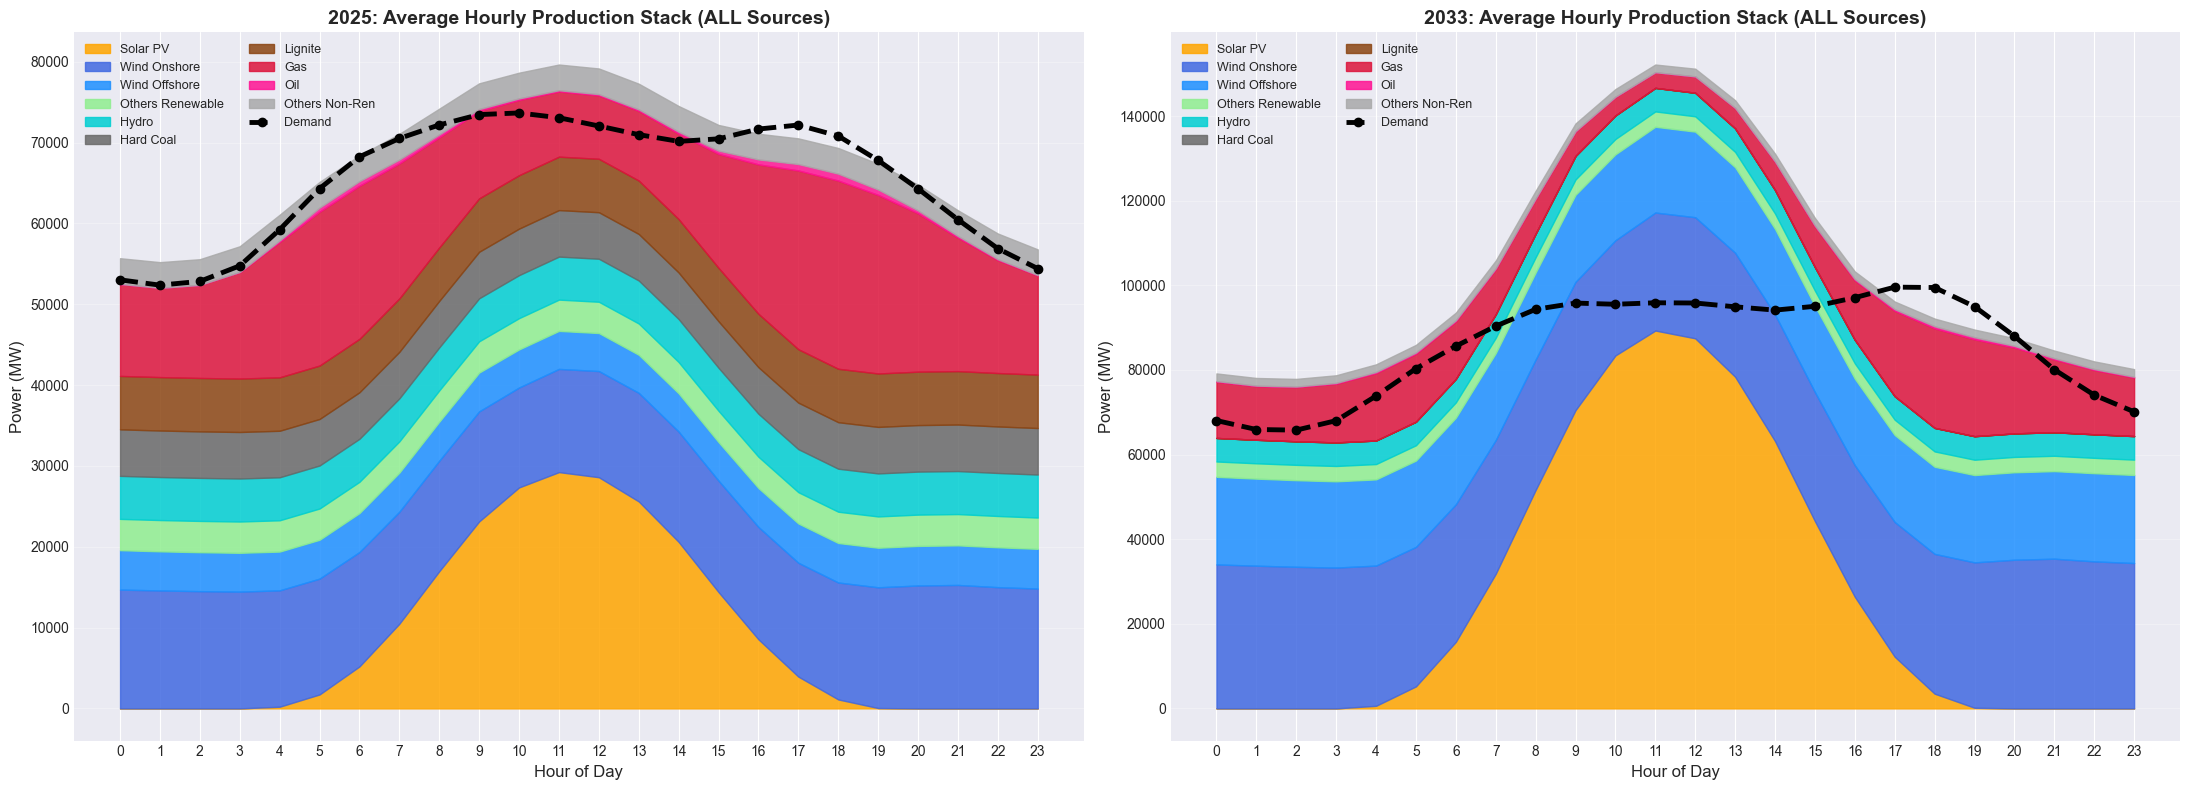

✓ Hourly total production stacks created (ALL sources included)


In [34]:
# Create detailed hourly production stacks (like 11.3 but with ALL sources)
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

# Calculate hourly averages for total production (ALL sources)
hourly_total_2025 = total_production_2025.groupby('hour').agg({
    'demand_MW': 'mean',
    'solar_MW': 'mean',
    'wind_onshore_MW': 'mean',
    'wind_offshore_MW': 'mean',
    'hydro_MW': 'mean',
    'hard_coal_MW': 'mean',
    'lignite_MW': 'mean',
    'gas_MW': 'mean',
    'oil_MW': 'mean',
    'others_ren_MW': 'mean',
    'others_nonren_MW': 'mean',
    'total_production_MW': 'mean'
})

hourly_total_2033 = total_production_2033.groupby('hour').agg({
    'demand_MW': 'mean',
    'solar_MW': 'mean',
    'wind_onshore_MW': 'mean',
    'wind_offshore_MW': 'mean',
    'hydro_MW': 'mean',
    'hard_coal_MW': 'mean',
    'lignite_MW': 'mean',
    'gas_MW': 'mean',
    'oil_MW': 'mean',
    'others_ren_MW': 'mean',
    'others_nonren_MW': 'mean',
    'total_production_MW': 'mean'
})

# 2025 - Stacked area chart with ALL sources
# Stack order: Solar, Wind On, Wind Off, Others Ren, Hydro, Hard Coal, Lignite, Gas, Oil, Others Non-Ren
y0 = np.zeros(len(hourly_total_2025))
y1 = y0 + hourly_total_2025['solar_MW'].values
y2 = y1 + hourly_total_2025['wind_onshore_MW'].values
y3 = y2 + hourly_total_2025['wind_offshore_MW'].values
y4 = y3 + hourly_total_2025['others_ren_MW'].values
y5 = y4 + hourly_total_2025['hydro_MW'].values
y6 = y5 + hourly_total_2025['hard_coal_MW'].values
y7 = y6 + hourly_total_2025['lignite_MW'].values
y8 = y7 + hourly_total_2025['gas_MW'].values
y9 = y8 + hourly_total_2025['oil_MW'].values
y10 = y9 + hourly_total_2025['others_nonren_MW'].values

axes[0].fill_between(hourly_total_2025.index, y0, y1, label='Solar PV', color='#FFA500', alpha=0.85)
axes[0].fill_between(hourly_total_2025.index, y1, y2, label='Wind Onshore', color='#4169E1', alpha=0.85)
axes[0].fill_between(hourly_total_2025.index, y2, y3, label='Wind Offshore', color='#1E90FF', alpha=0.85)
axes[0].fill_between(hourly_total_2025.index, y3, y4, label='Others Renewable', color='#90EE90', alpha=0.85)
axes[0].fill_between(hourly_total_2025.index, y4, y5, label='Hydro', color='#00CED1', alpha=0.85)
axes[0].fill_between(hourly_total_2025.index, y5, y6, label='Hard Coal', color='#696969', alpha=0.85)
axes[0].fill_between(hourly_total_2025.index, y6, y7, label='Lignite', color='#8B4513', alpha=0.85)
axes[0].fill_between(hourly_total_2025.index, y7, y8, label='Gas', color='#DC143C', alpha=0.85)
axes[0].fill_between(hourly_total_2025.index, y8, y9, label='Oil', color='#FF1493', alpha=0.85)
axes[0].fill_between(hourly_total_2025.index, y9, y10, label='Others Non-Ren', color='#A9A9A9', alpha=0.85)
axes[0].plot(hourly_total_2025.index, hourly_total_2025['demand_MW'], 
            linewidth=3.5, label='Demand', color='black', linestyle='--', marker='o', markersize=6, zorder=10)
axes[0].set_title('2025: Average Hourly Production Stack (ALL Sources)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hour of Day', fontsize=12)
axes[0].set_ylabel('Power (MW)', fontsize=12)
axes[0].set_xticks(range(0, 24))
axes[0].legend(fontsize=9, loc='upper left', ncol=2)
axes[0].grid(True, alpha=0.3, axis='y')

# 2033 - Stacked area chart with ALL sources
z0 = np.zeros(len(hourly_total_2033))
z1 = z0 + hourly_total_2033['solar_MW'].values
z2 = z1 + hourly_total_2033['wind_onshore_MW'].values
z3 = z2 + hourly_total_2033['wind_offshore_MW'].values
z4 = z3 + hourly_total_2033['others_ren_MW'].values
z5 = z4 + hourly_total_2033['hydro_MW'].values
z6 = z5 + hourly_total_2033['hard_coal_MW'].values
z7 = z6 + hourly_total_2033['lignite_MW'].values
z8 = z7 + hourly_total_2033['gas_MW'].values
z9 = z8 + hourly_total_2033['oil_MW'].values
z10 = z9 + hourly_total_2033['others_nonren_MW'].values

axes[1].fill_between(hourly_total_2033.index, z0, z1, label='Solar PV', color='#FFA500', alpha=0.85)
axes[1].fill_between(hourly_total_2033.index, z1, z2, label='Wind Onshore', color='#4169E1', alpha=0.85)
axes[1].fill_between(hourly_total_2033.index, z2, z3, label='Wind Offshore', color='#1E90FF', alpha=0.85)
axes[1].fill_between(hourly_total_2033.index, z3, z4, label='Others Renewable', color='#90EE90', alpha=0.85)
axes[1].fill_between(hourly_total_2033.index, z4, z5, label='Hydro', color='#00CED1', alpha=0.85)
axes[1].fill_between(hourly_total_2033.index, z5, z6, label='Hard Coal', color='#696969', alpha=0.85)
axes[1].fill_between(hourly_total_2033.index, z6, z7, label='Lignite', color='#8B4513', alpha=0.85)
axes[1].fill_between(hourly_total_2033.index, z7, z8, label='Gas', color='#DC143C', alpha=0.85)
axes[1].fill_between(hourly_total_2033.index, z8, z9, label='Oil', color='#FF1493', alpha=0.85)
axes[1].fill_between(hourly_total_2033.index, z9, z10, label='Others Non-Ren', color='#A9A9A9', alpha=0.85)
axes[1].plot(hourly_total_2033.index, hourly_total_2033['demand_MW'], 
            linewidth=3.5, label='Demand', color='black', linestyle='--', marker='o', markersize=6, zorder=10)
axes[1].set_title('2033: Average Hourly Production Stack (ALL Sources)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hour of Day', fontsize=12)
axes[1].set_ylabel('Power (MW)', fontsize=12)
axes[1].set_xticks(range(0, 24))
axes[1].legend(fontsize=9, loc='upper left', ncol=2)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✓ Hourly total production stacks created (ALL sources included)")


## 15.1 Monthly Hourly Production Stacks (Average Day per Month)


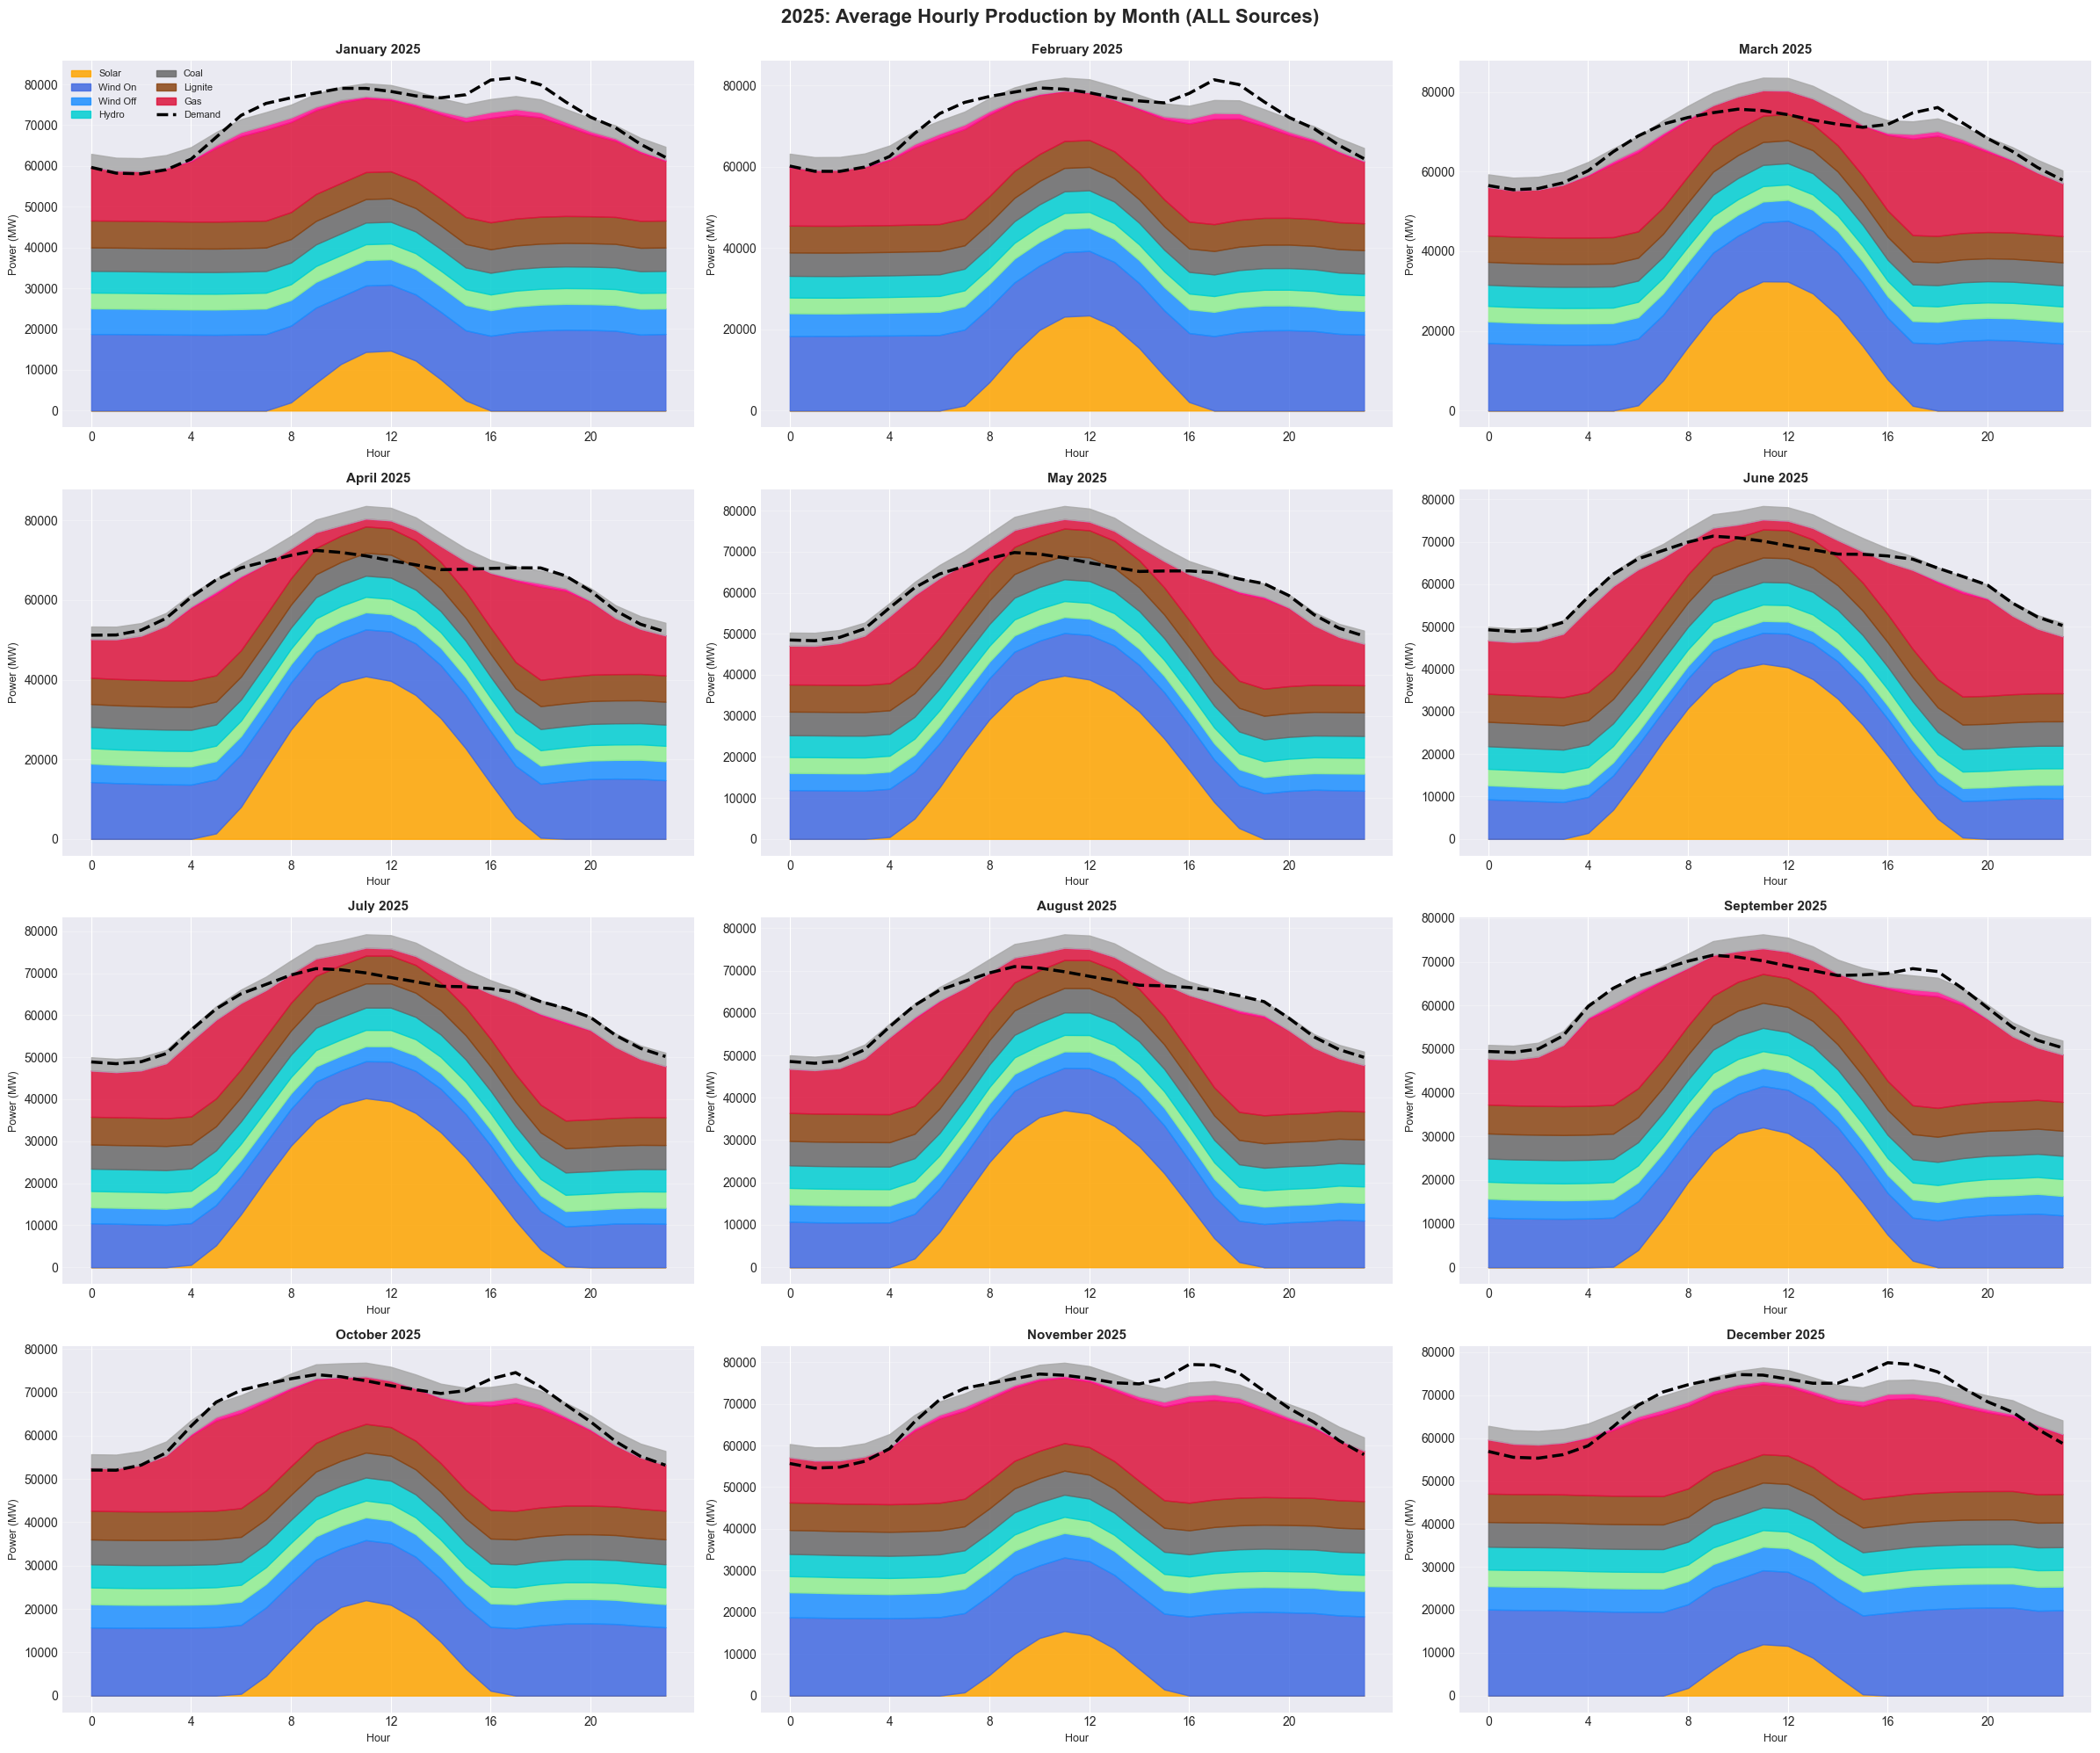

✓ 2025 monthly production stacks created


In [38]:
# Create monthly hourly production stacks for 2025
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# 2025 - 12 monthly plots
fig, axes = plt.subplots(4, 3, figsize=(24, 20))
axes = axes.flatten()

for month_idx in range(1, 13):
    monthly_data_2025 = total_production_2025[total_production_2025['month'] == month_idx]
    
    hourly_month_2025 = monthly_data_2025.groupby('hour').agg({
        'demand_MW': 'mean',
        'solar_MW': 'mean',
        'wind_onshore_MW': 'mean',
        'wind_offshore_MW': 'mean',
        'hydro_MW': 'mean',
        'hard_coal_MW': 'mean',
        'lignite_MW': 'mean',
        'gas_MW': 'mean',
        'oil_MW': 'mean',
        'others_ren_MW': 'mean',
        'others_nonren_MW': 'mean',
    })
    
    # Create stacked areas
    y0 = np.zeros(len(hourly_month_2025))
    y1 = y0 + hourly_month_2025['solar_MW'].values
    y2 = y1 + hourly_month_2025['wind_onshore_MW'].values
    y3 = y2 + hourly_month_2025['wind_offshore_MW'].values
    y4 = y3 + hourly_month_2025['others_ren_MW'].values
    y5 = y4 + hourly_month_2025['hydro_MW'].values
    y6 = y5 + hourly_month_2025['hard_coal_MW'].values
    y7 = y6 + hourly_month_2025['lignite_MW'].values
    y8 = y7 + hourly_month_2025['gas_MW'].values
    y9 = y8 + hourly_month_2025['oil_MW'].values
    y10 = y9 + hourly_month_2025['others_nonren_MW'].values
    
    ax = axes[month_idx - 1]
    ax.fill_between(hourly_month_2025.index, y0, y1, color='#FFA500', alpha=0.85, label='Solar' if month_idx == 1 else '')
    ax.fill_between(hourly_month_2025.index, y1, y2, color='#4169E1', alpha=0.85, label='Wind On' if month_idx == 1 else '')
    ax.fill_between(hourly_month_2025.index, y2, y3, color='#1E90FF', alpha=0.85, label='Wind Off' if month_idx == 1 else '')
    ax.fill_between(hourly_month_2025.index, y3, y4, color='#90EE90', alpha=0.85)
    ax.fill_between(hourly_month_2025.index, y4, y5, color='#00CED1', alpha=0.85, label='Hydro' if month_idx == 1 else '')
    ax.fill_between(hourly_month_2025.index, y5, y6, color='#696969', alpha=0.85, label='Coal' if month_idx == 1 else '')
    ax.fill_between(hourly_month_2025.index, y6, y7, color='#8B4513', alpha=0.85, label='Lignite' if month_idx == 1 else '')
    ax.fill_between(hourly_month_2025.index, y7, y8, color='#DC143C', alpha=0.85, label='Gas' if month_idx == 1 else '')
    ax.fill_between(hourly_month_2025.index, y8, y9, color='#FF1493', alpha=0.85)
    ax.fill_between(hourly_month_2025.index, y9, y10, color='#A9A9A9', alpha=0.85)
    ax.plot(hourly_month_2025.index, hourly_month_2025['demand_MW'], 
            linewidth=2.5, color='black', linestyle='--', label='Demand' if month_idx == 1 else '', zorder=10)
    
    ax.set_title(f'{month_names[month_idx-1]} 2025', fontsize=11, fontweight='bold')
    ax.set_xlabel('Hour', fontsize=9)
    ax.set_ylabel('Power (MW)', fontsize=9)
    ax.set_xticks(range(0, 24, 4))
    ax.grid(True, alpha=0.3, axis='y')
    if month_idx == 1:
        ax.legend(fontsize=8, loc='upper left', ncol=2)

plt.suptitle('2025: Average Hourly Production by Month (ALL Sources)', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✓ 2025 monthly production stacks created")


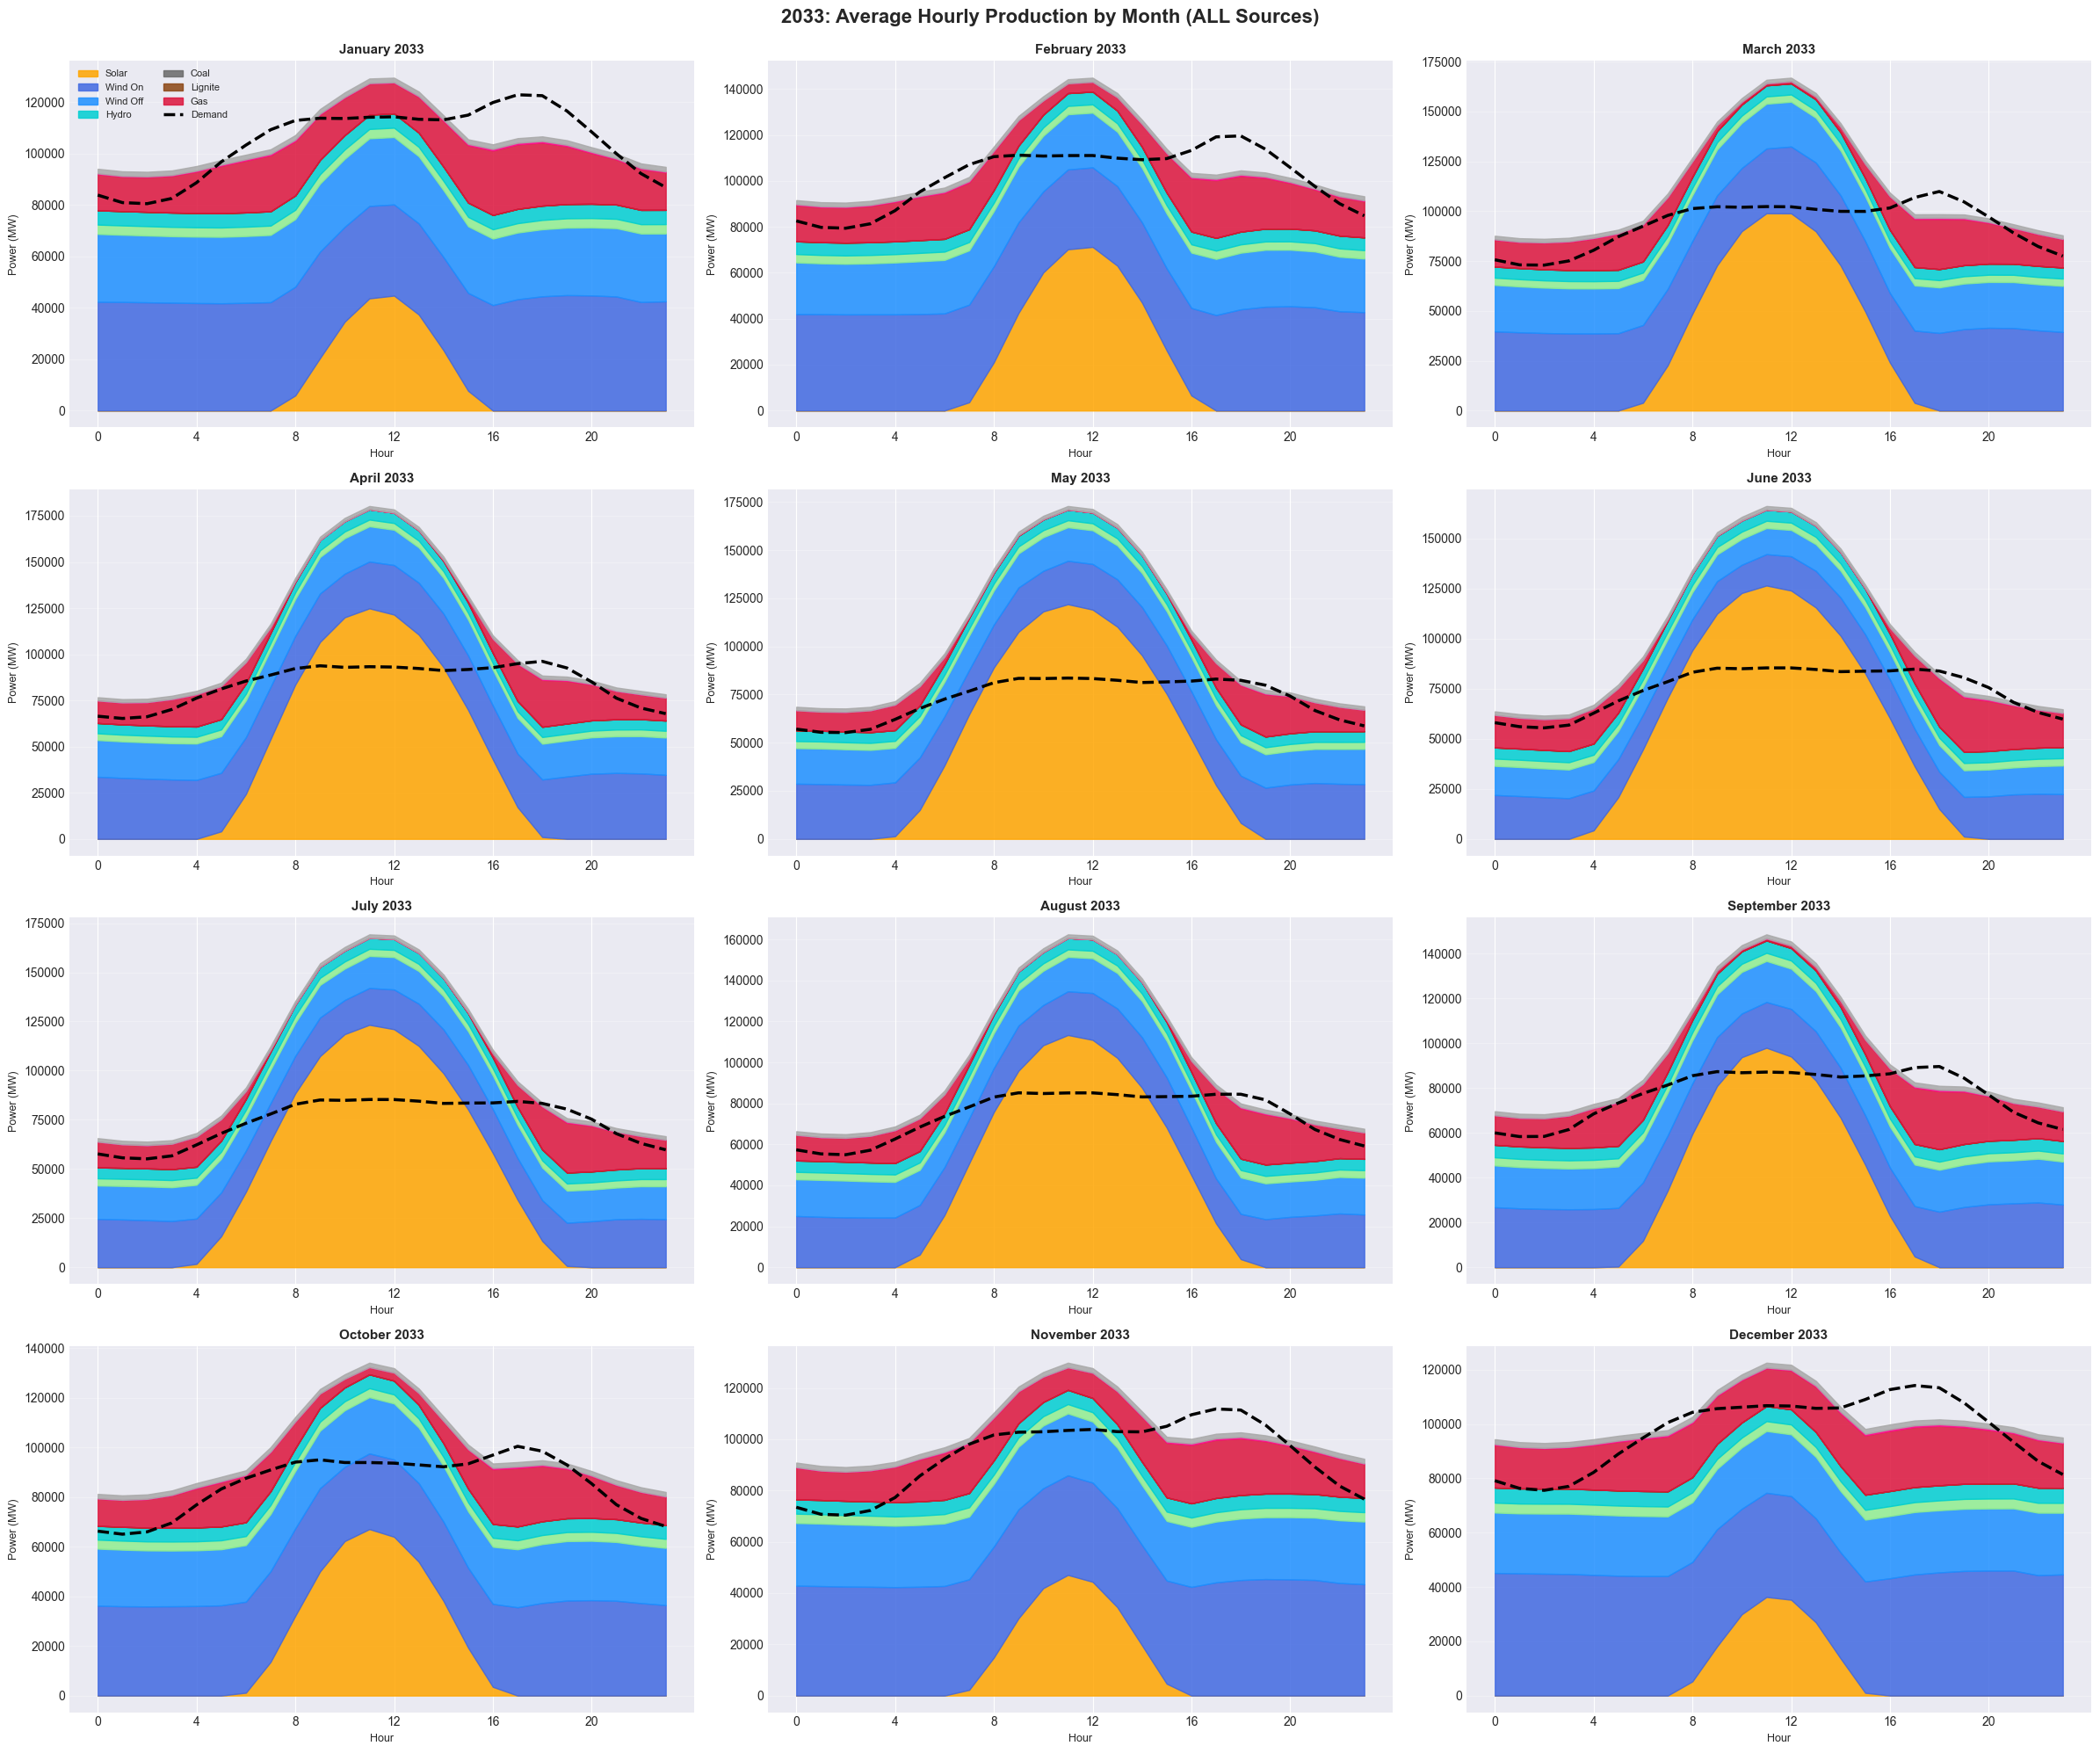

✓ 2033 monthly production stacks created


In [39]:
# 2033 - 12 monthly plots
fig, axes = plt.subplots(4, 3, figsize=(24, 20))
axes = axes.flatten()

for month_idx in range(1, 13):
    monthly_data_2033 = total_production_2033[total_production_2033['month'] == month_idx]
    
    hourly_month_2033 = monthly_data_2033.groupby('hour').agg({
        'demand_MW': 'mean',
        'solar_MW': 'mean',
        'wind_onshore_MW': 'mean',
        'wind_offshore_MW': 'mean',
        'hydro_MW': 'mean',
        'hard_coal_MW': 'mean',
        'lignite_MW': 'mean',
        'gas_MW': 'mean',
        'oil_MW': 'mean',
        'others_ren_MW': 'mean',
        'others_nonren_MW': 'mean',
    })
    
    # Create stacked areas
    z0 = np.zeros(len(hourly_month_2033))
    z1 = z0 + hourly_month_2033['solar_MW'].values
    z2 = z1 + hourly_month_2033['wind_onshore_MW'].values
    z3 = z2 + hourly_month_2033['wind_offshore_MW'].values
    z4 = z3 + hourly_month_2033['others_ren_MW'].values
    z5 = z4 + hourly_month_2033['hydro_MW'].values
    z6 = z5 + hourly_month_2033['hard_coal_MW'].values
    z7 = z6 + hourly_month_2033['lignite_MW'].values
    z8 = z7 + hourly_month_2033['gas_MW'].values
    z9 = z8 + hourly_month_2033['oil_MW'].values
    z10 = z9 + hourly_month_2033['others_nonren_MW'].values
    
    ax = axes[month_idx - 1]
    ax.fill_between(hourly_month_2033.index, z0, z1, color='#FFA500', alpha=0.85, label='Solar' if month_idx == 1 else '')
    ax.fill_between(hourly_month_2033.index, z1, z2, color='#4169E1', alpha=0.85, label='Wind On' if month_idx == 1 else '')
    ax.fill_between(hourly_month_2033.index, z2, z3, color='#1E90FF', alpha=0.85, label='Wind Off' if month_idx == 1 else '')
    ax.fill_between(hourly_month_2033.index, z3, z4, color='#90EE90', alpha=0.85)
    ax.fill_between(hourly_month_2033.index, z4, z5, color='#00CED1', alpha=0.85, label='Hydro' if month_idx == 1 else '')
    ax.fill_between(hourly_month_2033.index, z5, z6, color='#696969', alpha=0.85, label='Coal' if month_idx == 1 else '')
    ax.fill_between(hourly_month_2033.index, z6, z7, color='#8B4513', alpha=0.85, label='Lignite' if month_idx == 1 else '')
    ax.fill_between(hourly_month_2033.index, z7, z8, color='#DC143C', alpha=0.85, label='Gas' if month_idx == 1 else '')
    ax.fill_between(hourly_month_2033.index, z8, z9, color='#FF1493', alpha=0.85)
    ax.fill_between(hourly_month_2033.index, z9, z10, color='#A9A9A9', alpha=0.85)
    ax.plot(hourly_month_2033.index, hourly_month_2033['demand_MW'], 
            linewidth=2.5, color='black', linestyle='--', label='Demand' if month_idx == 1 else '', zorder=10)
    
    ax.set_title(f'{month_names[month_idx-1]} 2033', fontsize=11, fontweight='bold')
    ax.set_xlabel('Hour', fontsize=9)
    ax.set_ylabel('Power (MW)', fontsize=9)
    ax.set_xticks(range(0, 24, 4))
    ax.grid(True, alpha=0.3, axis='y')
    if month_idx == 1:
        ax.legend(fontsize=8, loc='upper left', ncol=2)

plt.suptitle('2033: Average Hourly Production by Month (ALL Sources)', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✓ 2033 monthly production stacks created")


## 15.2 Monthly Surplus/Deficit Analysis


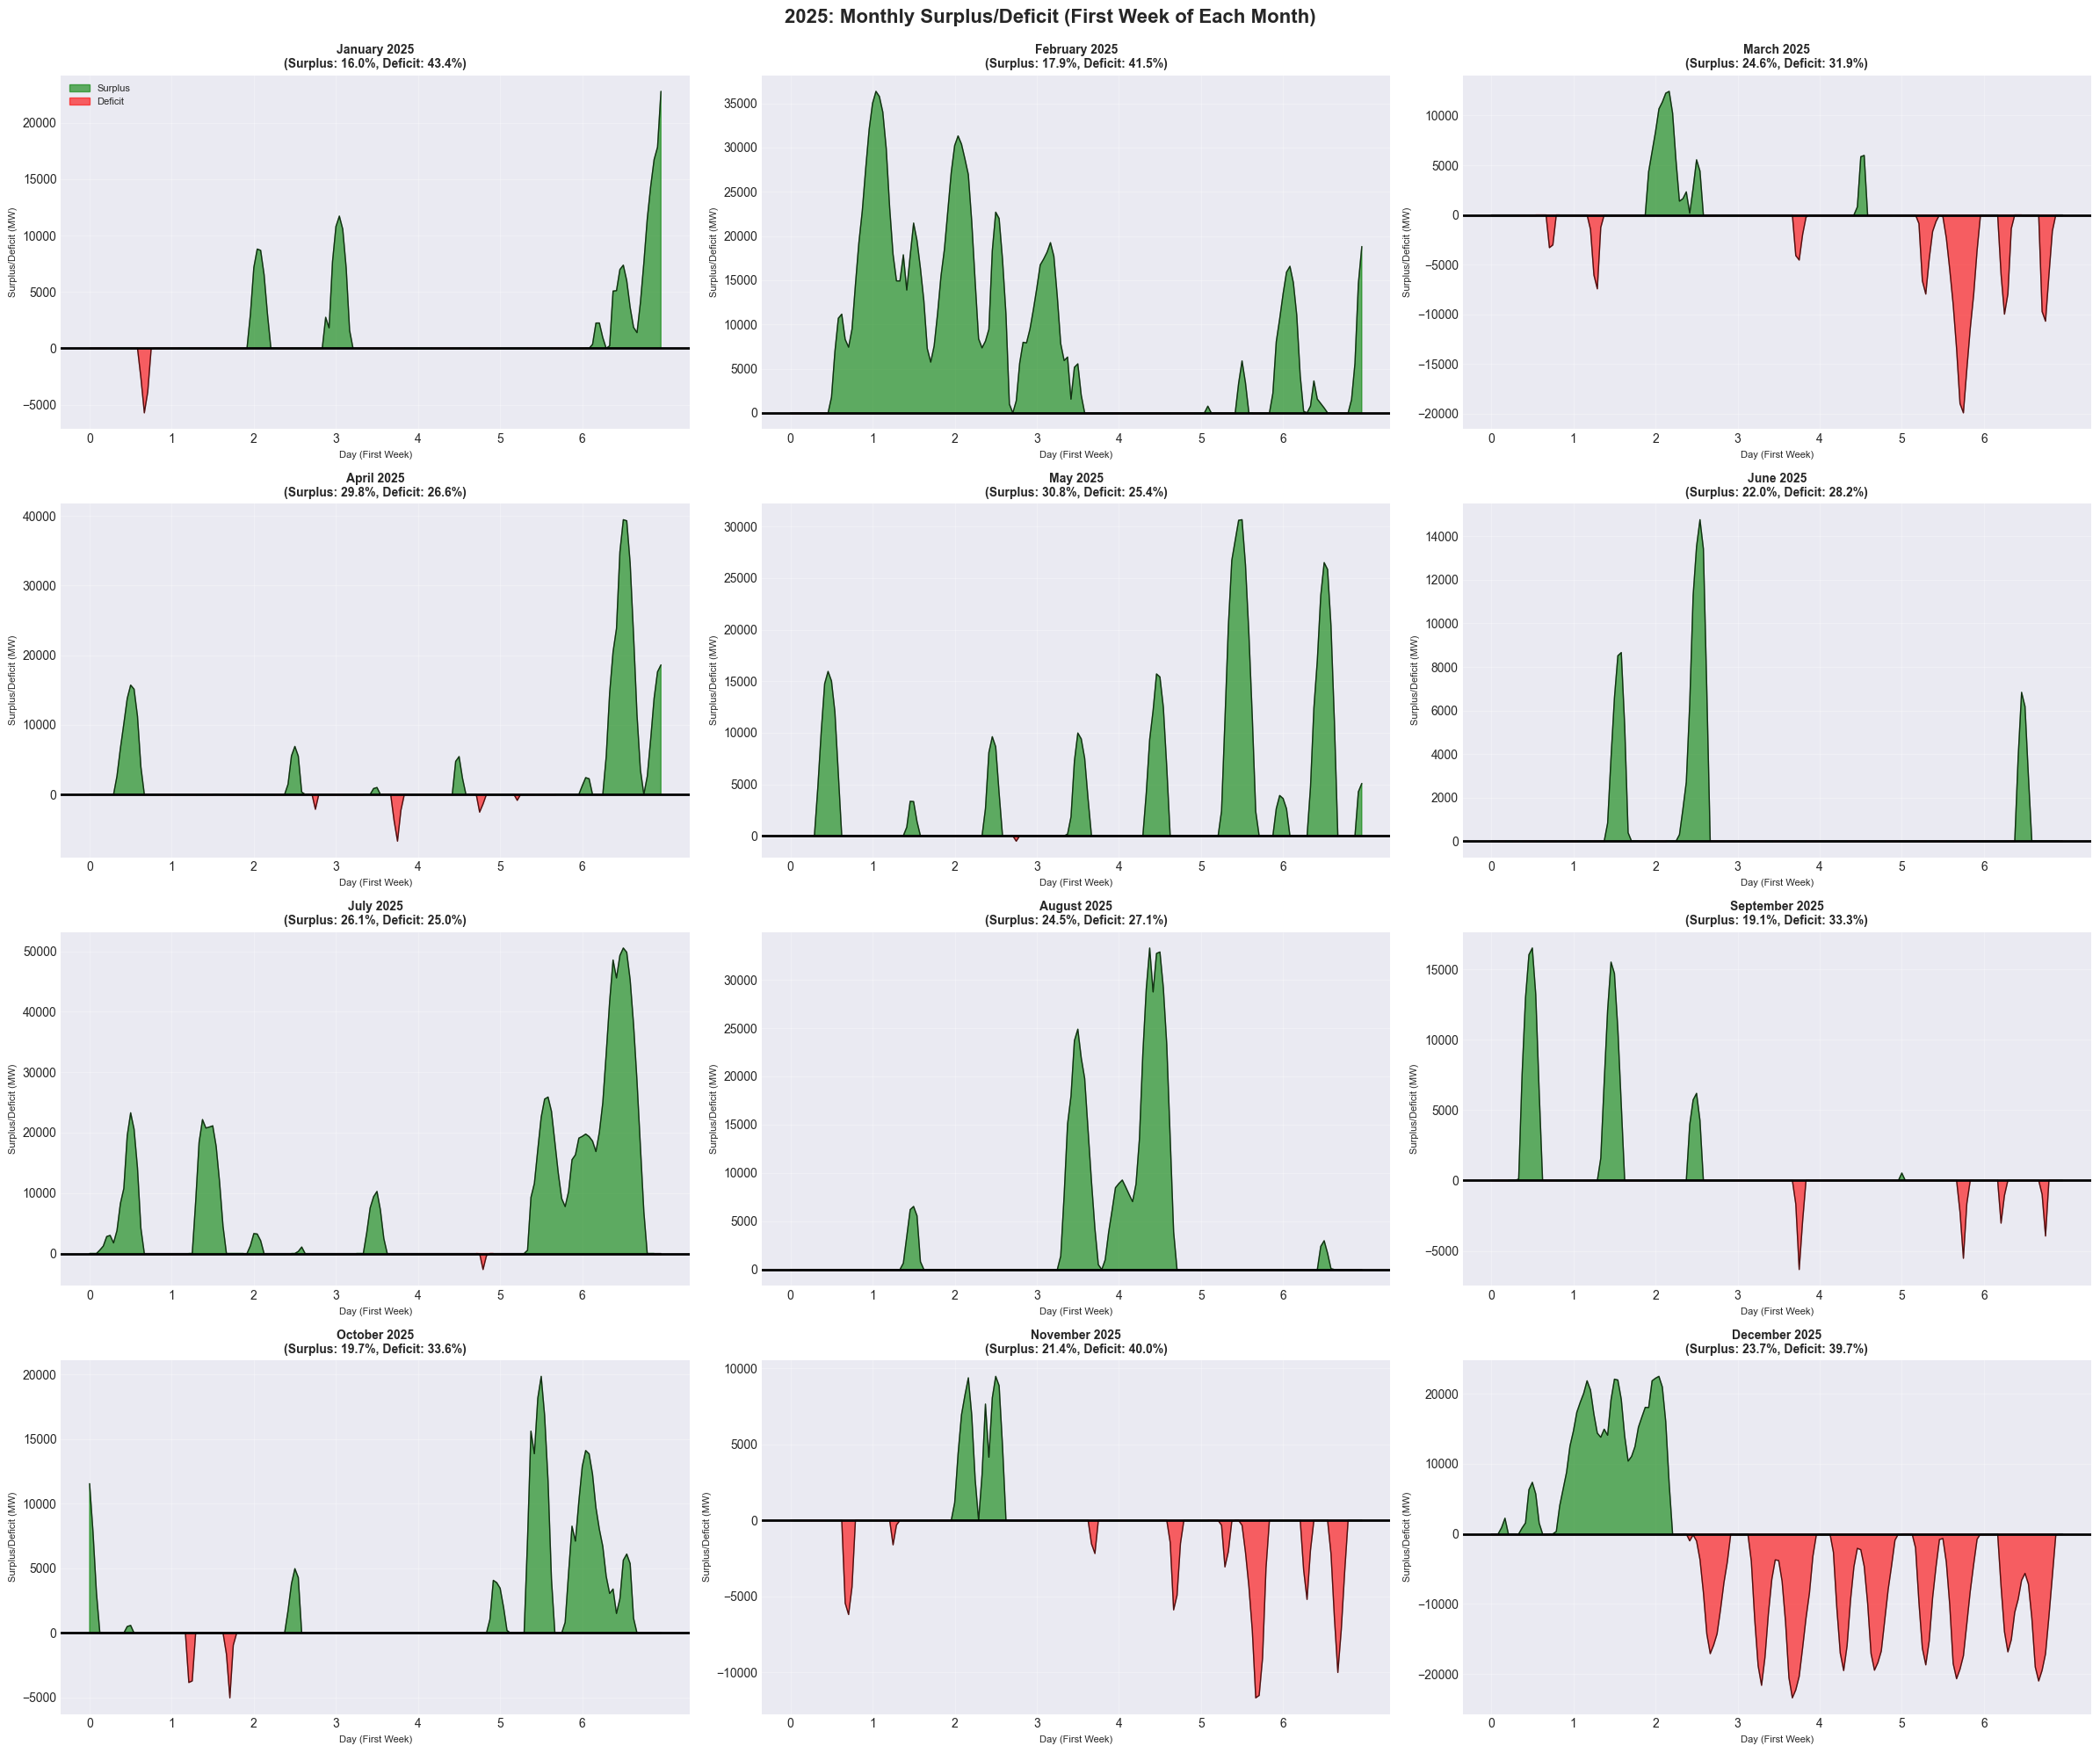

✓ 2025 monthly surplus/deficit visualized


In [43]:
# Monthly surplus/deficit analysis for 2025
fig, axes = plt.subplots(4, 3, figsize=(24, 20))
axes = axes.flatten()

monthly_stats_2025 = []

for month_idx in range(1, 13):
    monthly_data_2025 = total_production_2025[total_production_2025['month'] == month_idx]
    
    # Calculate surplus/deficit stats for this month
    surplus_data = monthly_data_2025[monthly_data_2025['total_surplus_deficit_MW'] > 0]['total_surplus_deficit_MW']
    deficit_data = monthly_data_2025[monthly_data_2025['total_surplus_deficit_MW'] < 0]['total_surplus_deficit_MW']
    
    surplus_hours = len(surplus_data)
    deficit_hours = len(deficit_data)
    total_hours = len(monthly_data_2025)
    
    monthly_stats_2025.append({
        'month': month_names[month_idx-1],
        'surplus_hours': surplus_hours,
        'deficit_hours': deficit_hours,
        'surplus_pct': surplus_hours / total_hours * 100,
        'deficit_pct': deficit_hours / total_hours * 100,
        'avg_surplus': surplus_data.mean() if len(surplus_data) > 0 else 0,
        'avg_deficit': deficit_data.mean() if len(deficit_data) > 0 else 0,
        'max_surplus': surplus_data.max() if len(surplus_data) > 0 else 0,
        'max_deficit': deficit_data.min() if len(deficit_data) > 0 else 0
    })
    
    # Plot surplus/deficit over time for first week of month
    week_data = monthly_data_2025.head(7*24)
    
    ax = axes[month_idx - 1]
    ax.fill_between(range(len(week_data)), 0, week_data['total_surplus_deficit_MW'].values,
                    where=(week_data['total_surplus_deficit_MW'].values >= 0),
                    alpha=0.6, color='green', label='Surplus' if month_idx == 1 else '', interpolate=True)
    ax.fill_between(range(len(week_data)), 0, week_data['total_surplus_deficit_MW'].values,
                    where=(week_data['total_surplus_deficit_MW'].values < 0),
                    alpha=0.6, color='red', label='Deficit' if month_idx == 1 else '', interpolate=True)
    ax.plot(range(len(week_data)), week_data['total_surplus_deficit_MW'].values,
            color='black', linewidth=1, alpha=0.7)
    ax.axhline(y=0, color='black', linewidth=2, linestyle='-')
    
    ax.set_title(f'{month_names[month_idx-1]} 2025\n(Surplus: {surplus_hours/total_hours*100:.1f}%, Deficit: {deficit_hours/total_hours*100:.1f}%)', 
                 fontsize=10, fontweight='bold')
    ax.set_xlabel('Day (First Week)', fontsize=8)
    ax.set_ylabel('Surplus/Deficit (MW)', fontsize=8)
    tick_positions = list(range(0, len(week_data), 24))
    ax.set_xticks(tick_positions)
    ax.set_xticklabels([str(i) for i in range(len(tick_positions))])
    ax.grid(True, alpha=0.3)
    if month_idx == 1:
        ax.legend(fontsize=8)

plt.suptitle('2025: Monthly Surplus/Deficit (First Week of Each Month)', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✓ 2025 monthly surplus/deficit visualized")


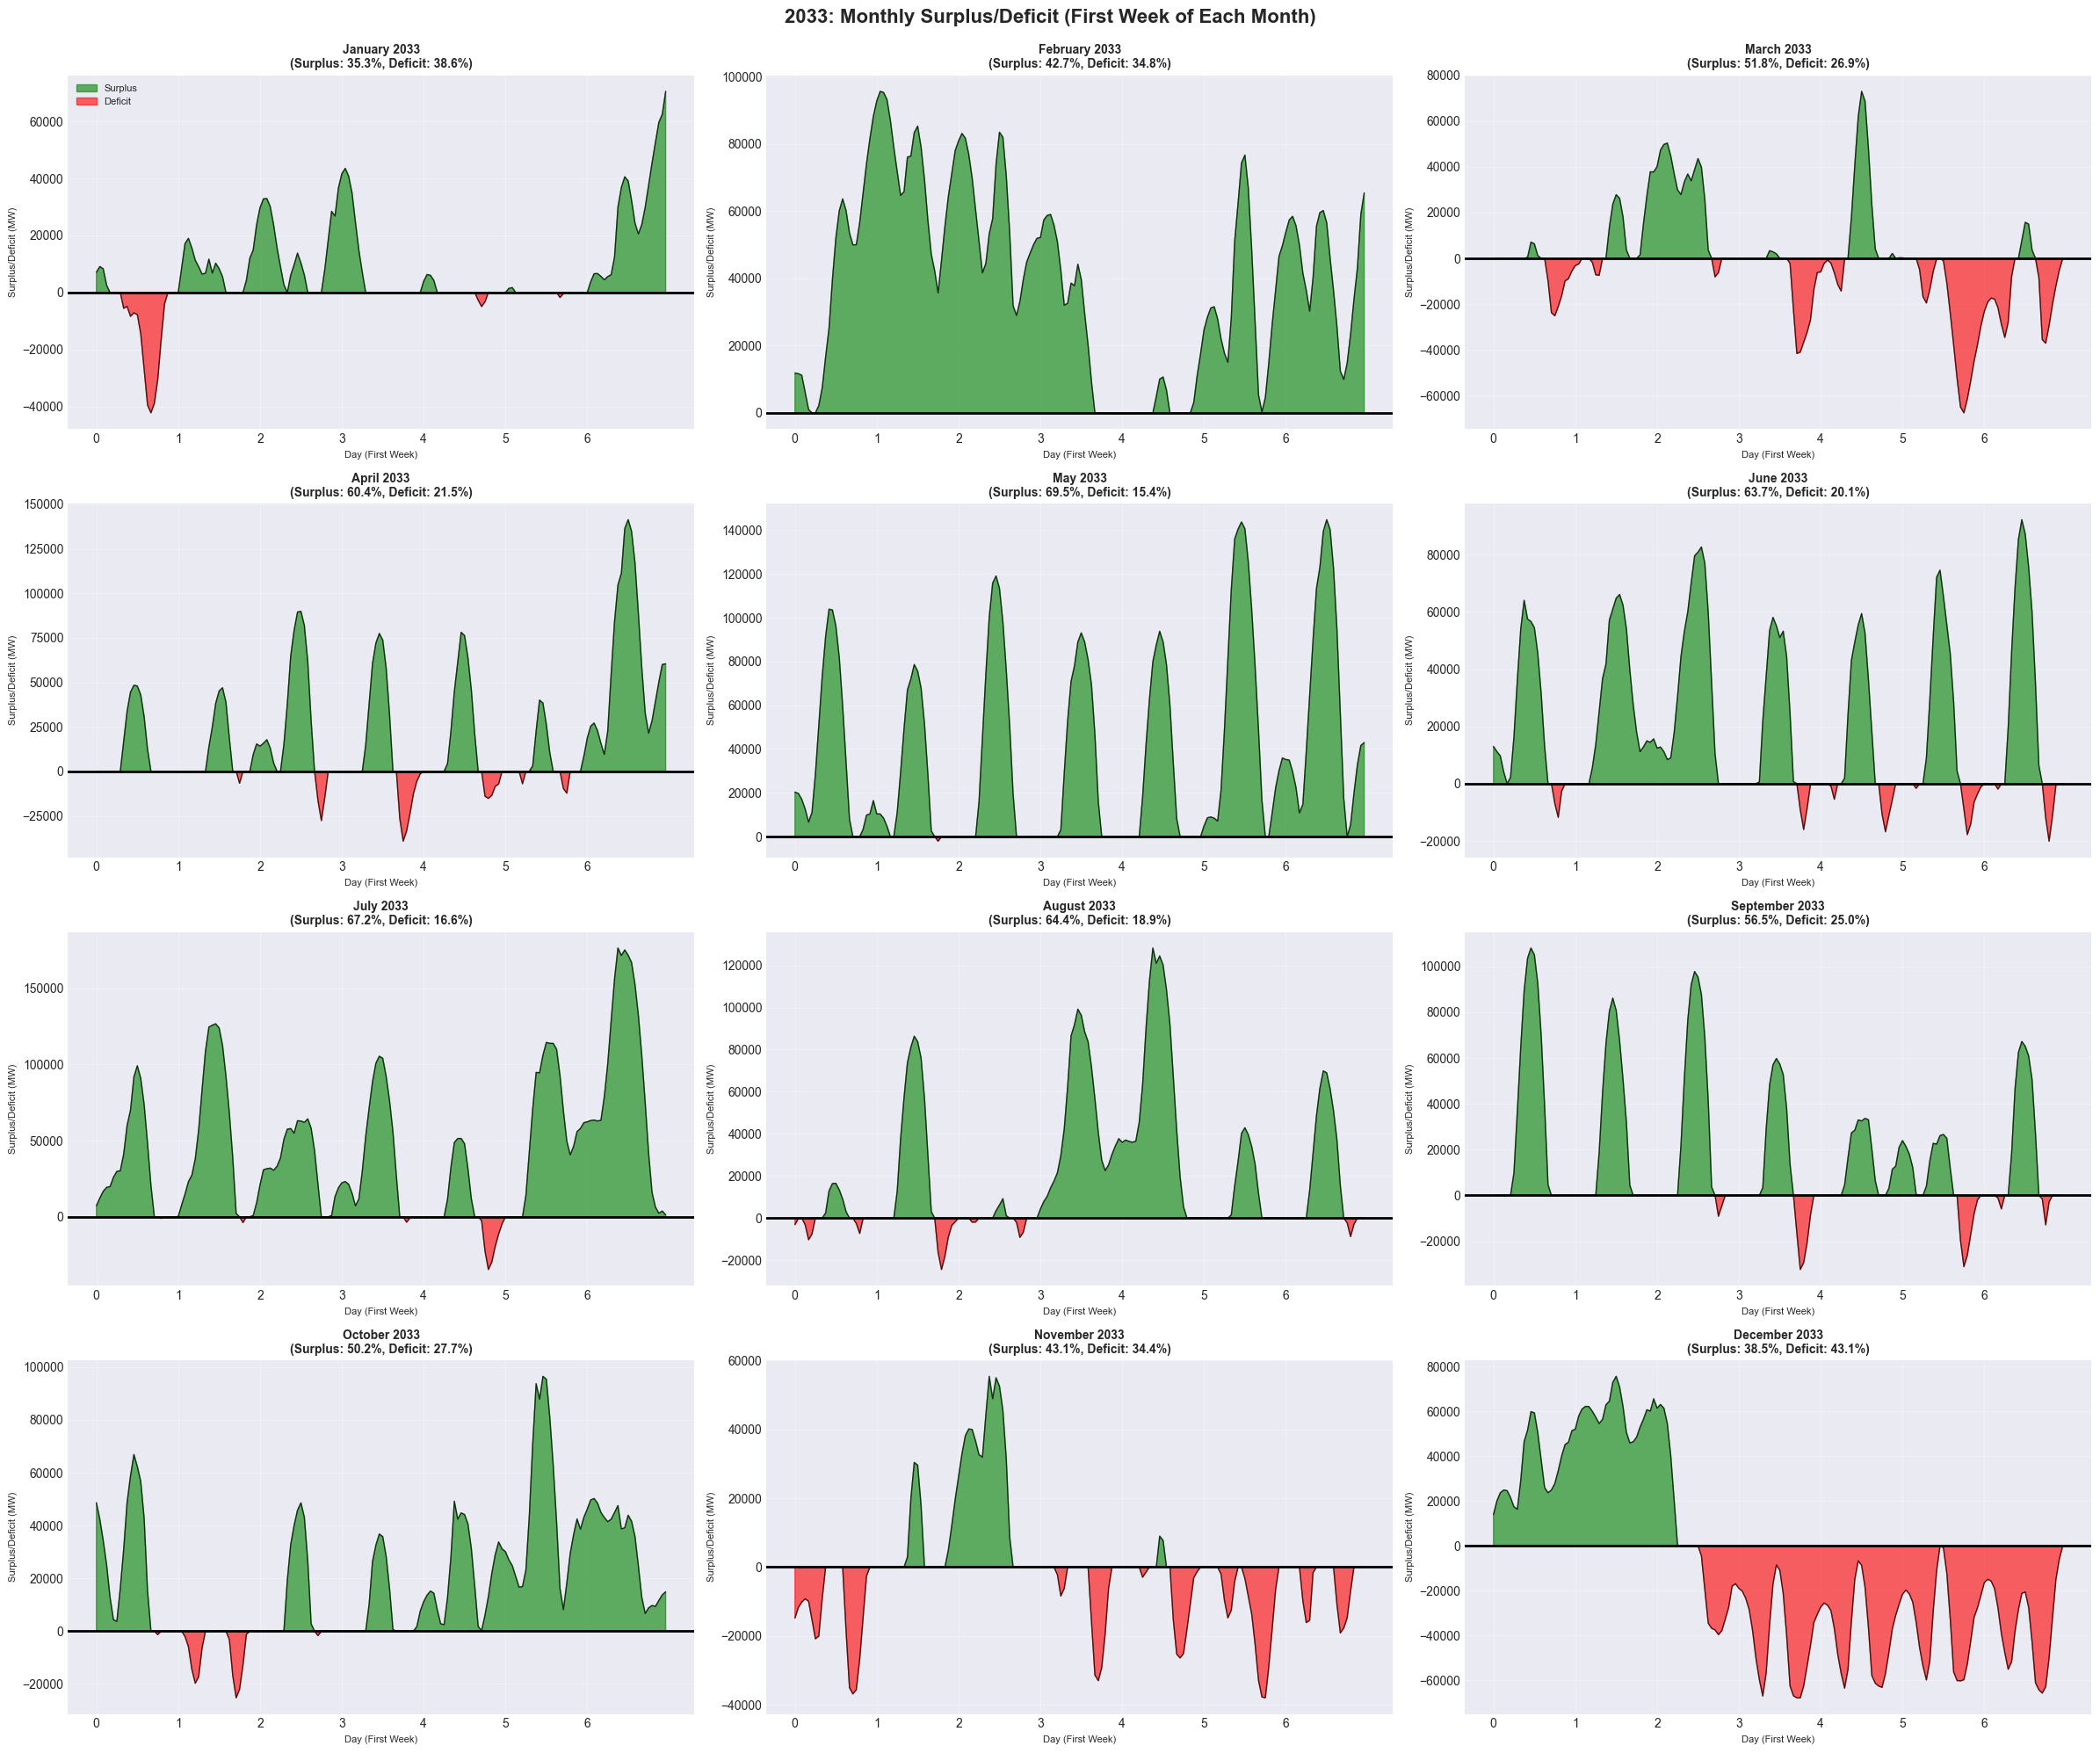

✓ 2033 monthly surplus/deficit visualized


In [44]:
# Monthly surplus/deficit analysis for 2033
fig, axes = plt.subplots(4, 3, figsize=(24, 20))
axes = axes.flatten()

monthly_stats_2033 = []

for month_idx in range(1, 13):
    monthly_data_2033 = total_production_2033[total_production_2033['month'] == month_idx]
    
    # Calculate surplus/deficit stats for this month
    surplus_data = monthly_data_2033[monthly_data_2033['total_surplus_deficit_MW'] > 0]['total_surplus_deficit_MW']
    deficit_data = monthly_data_2033[monthly_data_2033['total_surplus_deficit_MW'] < 0]['total_surplus_deficit_MW']
    
    surplus_hours = len(surplus_data)
    deficit_hours = len(deficit_data)
    total_hours = len(monthly_data_2033)
    
    monthly_stats_2033.append({
        'month': month_names[month_idx-1],
        'surplus_hours': surplus_hours,
        'deficit_hours': deficit_hours,
        'surplus_pct': surplus_hours / total_hours * 100,
        'deficit_pct': deficit_hours / total_hours * 100,
        'avg_surplus': surplus_data.mean() if len(surplus_data) > 0 else 0,
        'avg_deficit': deficit_data.mean() if len(deficit_data) > 0 else 0,
        'max_surplus': surplus_data.max() if len(surplus_data) > 0 else 0,
        'max_deficit': deficit_data.min() if len(deficit_data) > 0 else 0
    })
    
    # Plot surplus/deficit over time for first week of month
    week_data = monthly_data_2033.head(7*24)
    
    ax = axes[month_idx - 1]
    ax.fill_between(range(len(week_data)), 0, week_data['total_surplus_deficit_MW'].values,
                    where=(week_data['total_surplus_deficit_MW'].values >= 0),
                    alpha=0.6, color='green', label='Surplus' if month_idx == 1 else '', interpolate=True)
    ax.fill_between(range(len(week_data)), 0, week_data['total_surplus_deficit_MW'].values,
                    where=(week_data['total_surplus_deficit_MW'].values < 0),
                    alpha=0.6, color='red', label='Deficit' if month_idx == 1 else '', interpolate=True)
    ax.plot(range(len(week_data)), week_data['total_surplus_deficit_MW'].values,
            color='black', linewidth=1, alpha=0.7)
    ax.axhline(y=0, color='black', linewidth=2, linestyle='-')
    
    ax.set_title(f'{month_names[month_idx-1]} 2033\n(Surplus: {surplus_hours/total_hours*100:.1f}%, Deficit: {deficit_hours/total_hours*100:.1f}%)', 
                 fontsize=10, fontweight='bold')
    ax.set_xlabel('Day (First Week)', fontsize=8)
    ax.set_ylabel('Surplus/Deficit (MW)', fontsize=8)
    tick_positions = list(range(0, len(week_data), 24))
    ax.set_xticks(tick_positions)
    ax.set_xticklabels([str(i) for i in range(len(tick_positions))])
    ax.grid(True, alpha=0.3)
    if month_idx == 1:
        ax.legend(fontsize=8)

plt.suptitle('2033: Monthly Surplus/Deficit (First Week of Each Month)', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✓ 2033 monthly surplus/deficit visualized")


MONTHLY SURPLUS/DEFICIT SUMMARY - 2025
  month  surplus_pct  deficit_pct  avg_surplus  avg_deficit
January    16.017025     43.43638 11587.137031 -3740.950903

MONTHLY SURPLUS/DEFICIT SUMMARY - 2033
  month  surplus_pct  deficit_pct  avg_surplus   avg_deficit
January    35.282258    38.620072 30683.211878 -24962.128686


ValueError: x and y must have same first dimension, but have shapes (12,) and (1,)

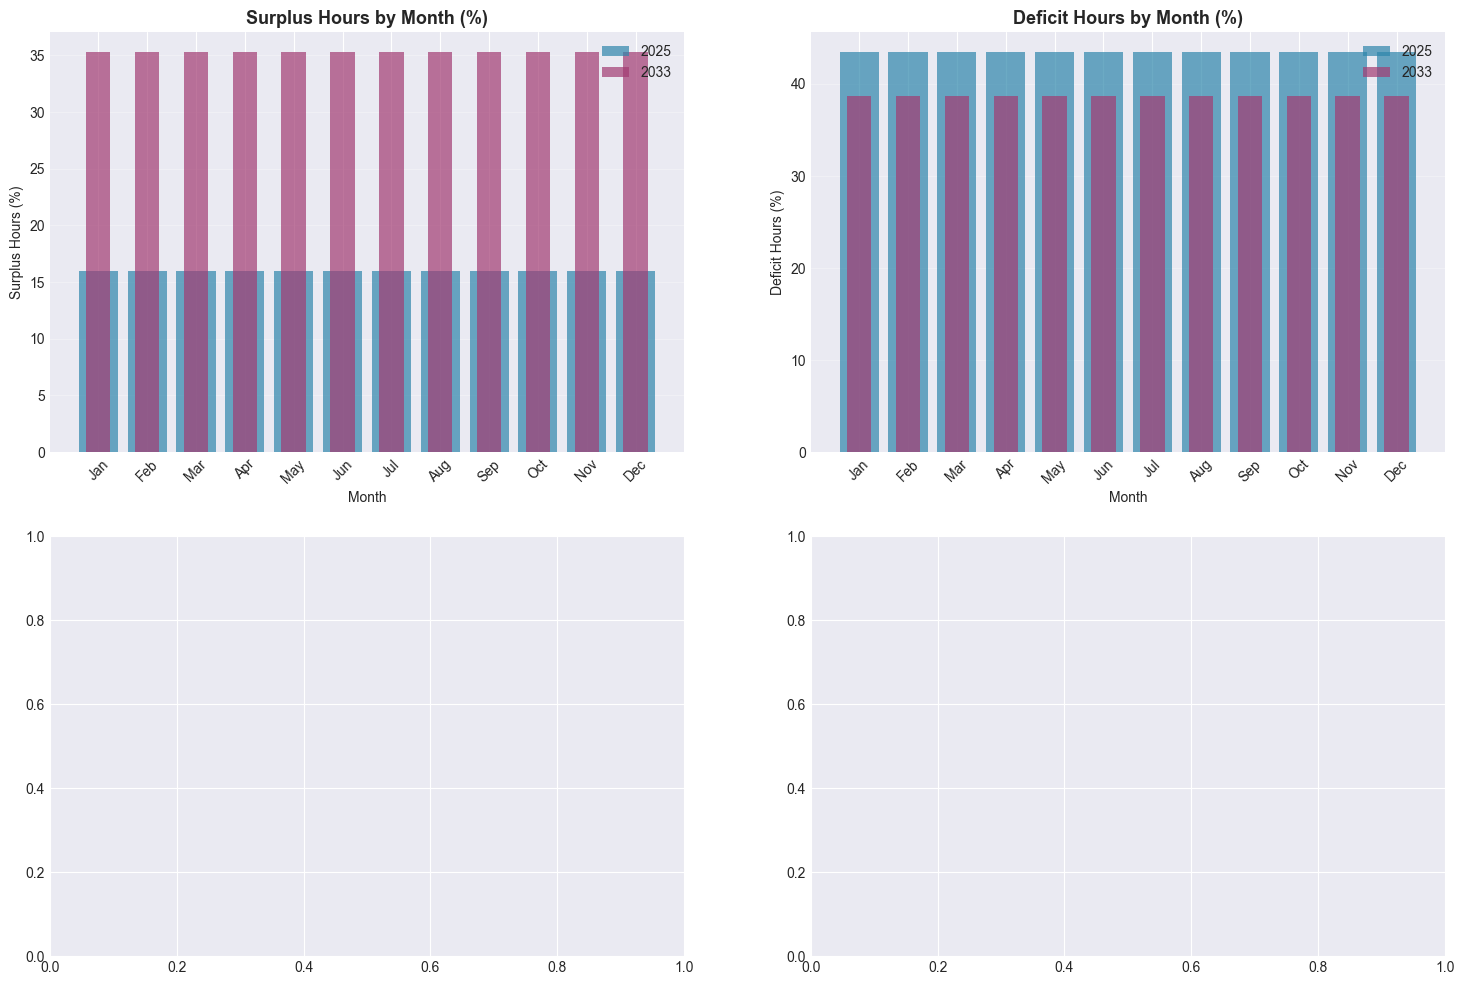

In [42]:
# Print monthly statistics summary
print("=" * 100)
print("MONTHLY SURPLUS/DEFICIT SUMMARY - 2025")
print("=" * 100)

df_stats_2025 = pd.DataFrame(monthly_stats_2025)
print(df_stats_2025[['month', 'surplus_pct', 'deficit_pct', 'avg_surplus', 'avg_deficit']].to_string(index=False))

print("\n" + "=" * 100)
print("MONTHLY SURPLUS/DEFICIT SUMMARY - 2033")
print("=" * 100)

df_stats_2033 = pd.DataFrame(monthly_stats_2033)
print(df_stats_2033[['month', 'surplus_pct', 'deficit_pct', 'avg_surplus', 'avg_deficit']].to_string(index=False))

# Create comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Surplus hours comparison
axes[0, 0].bar(range(12), df_stats_2025['surplus_pct'], alpha=0.7, label='2025', color='#2E86AB')
axes[0, 0].bar(range(12), df_stats_2033['surplus_pct'], alpha=0.7, label='2033', color='#A23B72', width=0.5)
axes[0, 0].set_title('Surplus Hours by Month (%)', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Surplus Hours (%)')
axes[0, 0].set_xticks(range(12))
axes[0, 0].set_xticklabels([m[:3] for m in month_names], rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Deficit hours comparison
axes[0, 1].bar(range(12), df_stats_2025['deficit_pct'], alpha=0.7, label='2025', color='#2E86AB')
axes[0, 1].bar(range(12), df_stats_2033['deficit_pct'], alpha=0.7, label='2033', color='#A23B72', width=0.5)
axes[0, 1].set_title('Deficit Hours by Month (%)', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Deficit Hours (%)')
axes[0, 1].set_xticks(range(12))
axes[0, 1].set_xticklabels([m[:3] for m in month_names], rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Average surplus magnitude
axes[1, 0].plot(range(12), df_stats_2025['avg_surplus'], marker='o', linewidth=2.5, 
                markersize=8, label='2025', color='#2E86AB')
axes[1, 0].plot(range(12), df_stats_2033['avg_surplus'], marker='s', linewidth=2.5, 
                markersize=8, label='2033', color='#A23B72')
axes[1, 0].set_title('Average Surplus Magnitude (when >0)', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Average Surplus (MW)')
axes[1, 0].set_xticks(range(12))
axes[1, 0].set_xticklabels([m[:3] for m in month_names], rotation=45)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Average deficit magnitude
axes[1, 1].plot(range(12), df_stats_2025['avg_deficit'], marker='o', linewidth=2.5, 
                markersize=8, label='2025', color='#2E86AB')
axes[1, 1].plot(range(12), df_stats_2033['avg_deficit'], marker='s', linewidth=2.5, 
                markersize=8, label='2033', color='#A23B72')
axes[1, 1].set_title('Average Deficit Magnitude (when <0)', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Average Deficit (MW)')
axes[1, 1].set_xticks(range(12))
axes[1, 1].set_xticklabels([m[:3] for m in month_names], rotation=45)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Monthly Surplus/Deficit Comparison (2025 vs 2033)', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "=" * 100)
print("KEY OBSERVATIONS:")
print("=" * 100)

# Find best and worst months
best_month_2025 = df_stats_2025.loc[df_stats_2025['surplus_pct'].idxmax(), 'month']
worst_month_2025 = df_stats_2025.loc[df_stats_2025['deficit_pct'].idxmax(), 'month']
best_month_2033 = df_stats_2033.loc[df_stats_2033['surplus_pct'].idxmax(), 'month']
worst_month_2033 = df_stats_2033.loc[df_stats_2033['deficit_pct'].idxmax(), 'month']

print(f"\n2025:")
print(f"  Best month (most surplus):  {best_month_2025} ({df_stats_2025[df_stats_2025['month']==best_month_2025]['surplus_pct'].values[0]:.1f}% surplus hours)")
print(f"  Worst month (most deficit): {worst_month_2025} ({df_stats_2025[df_stats_2025['month']==worst_month_2025]['deficit_pct'].values[0]:.1f}% deficit hours)")

print(f"\n2033:")
print(f"  Best month (most surplus):  {best_month_2033} ({df_stats_2033[df_stats_2033['month']==best_month_2033]['surplus_pct'].values[0]:.1f}% surplus hours)")
print(f"  Worst month (most deficit): {worst_month_2033} ({df_stats_2033[df_stats_2033['month']==worst_month_2033]['deficit_pct'].values[0]:.1f}% deficit hours)")

print(f"\nSeasonal Pattern:")
print(f"  Summer months (Jun-Aug) generally have more surplus (higher solar production)")
print(f"  Winter months (Dec-Feb) have more deficits (higher demand, lower solar)")
print(f"  System becomes more balanced by 2033 with increased renewable capacity")
print("=" * 100)


## 16. Full Year Total Production Stack


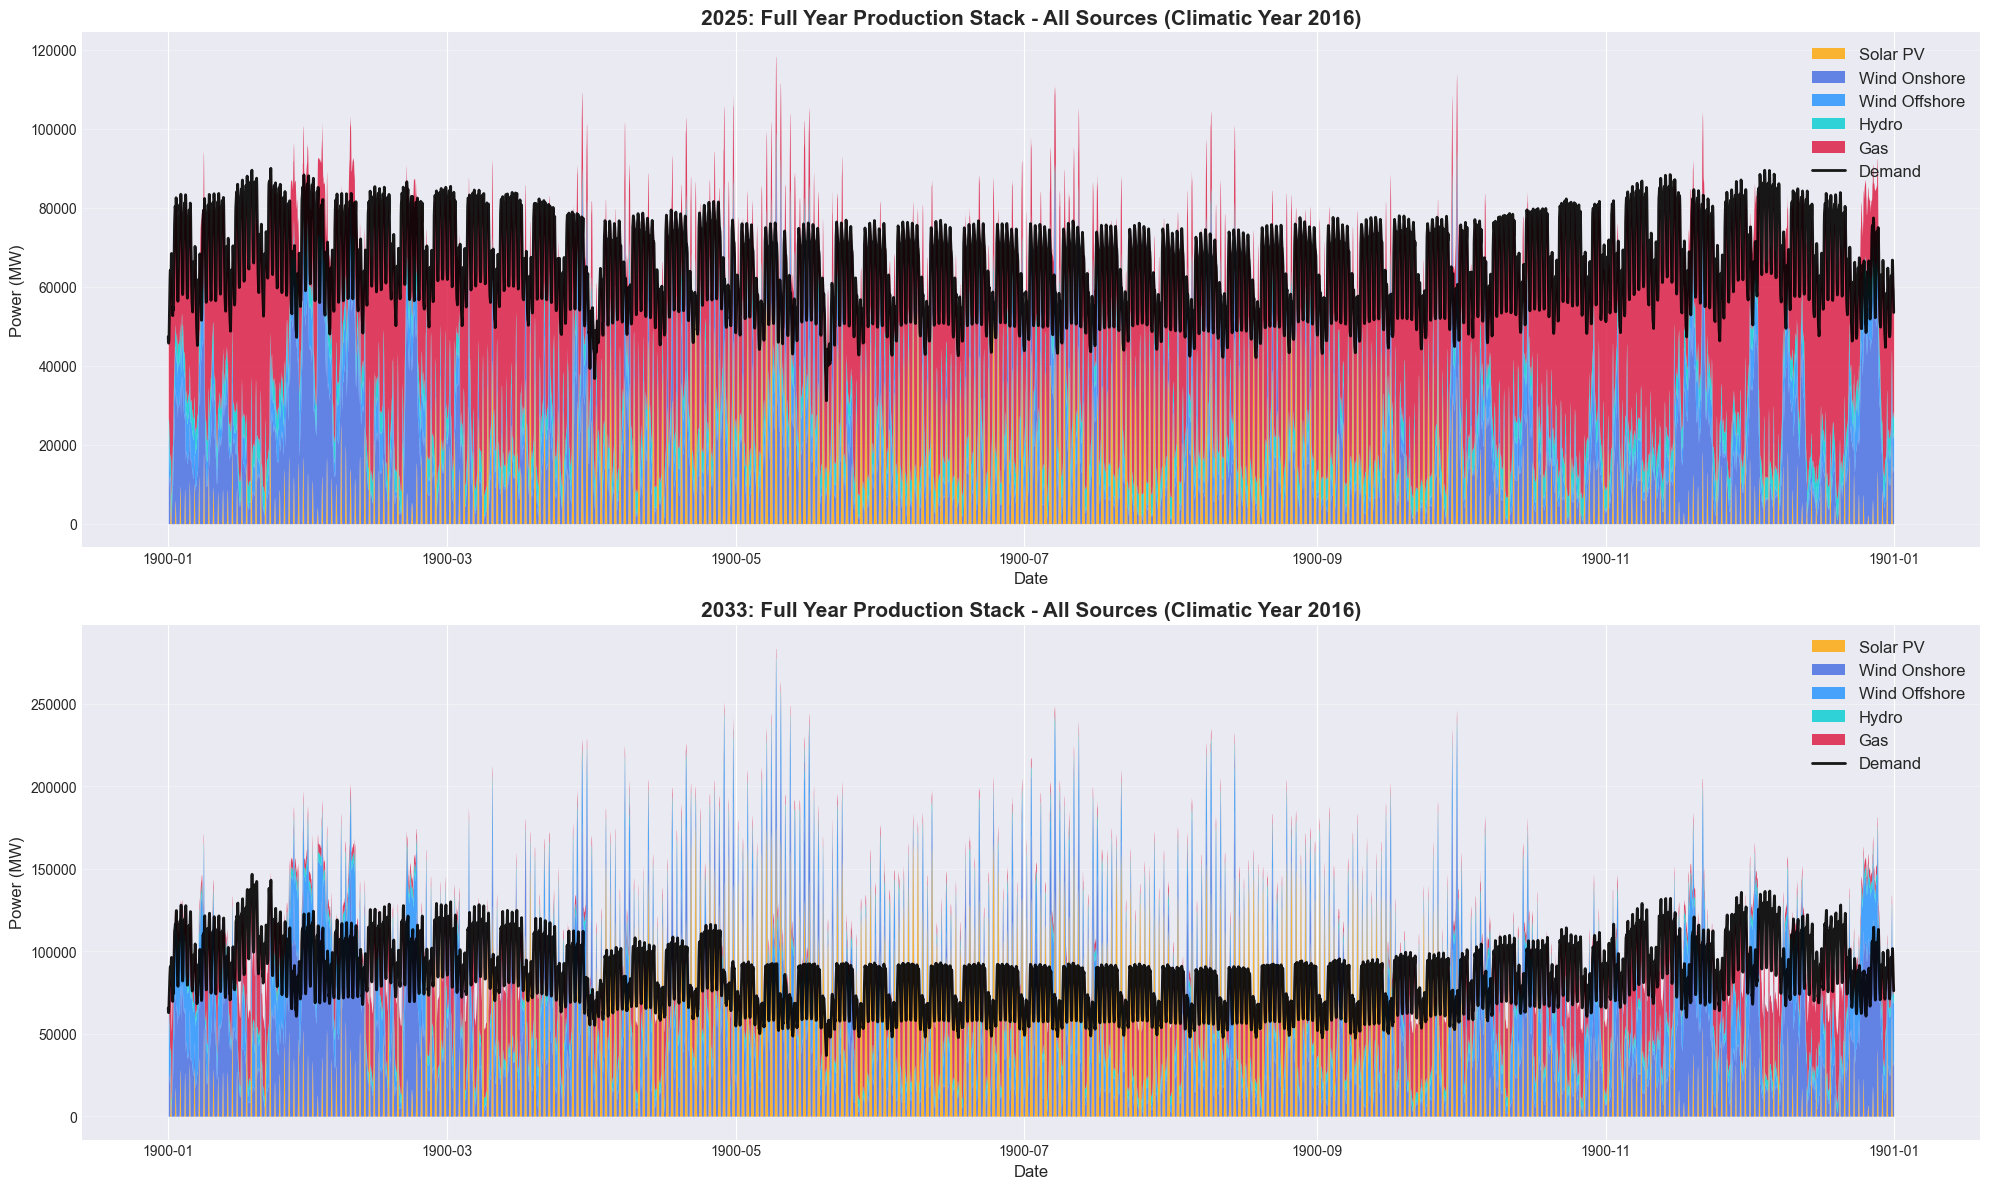

✓ Full year production stack visualized for climatic year 2016


In [35]:
# Full year visualization (using sample climatic year)
sample_total_2025 = total_production_2025[total_production_2025['climatic_year'] == sample_year].copy()
sample_total_2033 = total_production_2033[total_production_2033['climatic_year'] == sample_year].copy()

fig, axes = plt.subplots(2, 1, figsize=(20, 12))

# 2025 - Full year stacked production
axes[0].fill_between(sample_total_2025['datetime'], 0, sample_total_2025['solar_MW'], 
                     label='Solar PV', color='#FFA500', alpha=0.8, linewidth=0)
axes[0].fill_between(sample_total_2025['datetime'], sample_total_2025['solar_MW'], 
                     sample_total_2025['solar_MW'] + sample_total_2025['wind_onshore_MW'],
                     label='Wind Onshore', color='#4169E1', alpha=0.8, linewidth=0)
axes[0].fill_between(sample_total_2025['datetime'], 
                     sample_total_2025['solar_MW'] + sample_total_2025['wind_onshore_MW'],
                     sample_total_2025['solar_MW'] + sample_total_2025['wind_onshore_MW'] + sample_total_2025['wind_offshore_MW'],
                     label='Wind Offshore', color='#1E90FF', alpha=0.8, linewidth=0)
axes[0].fill_between(sample_total_2025['datetime'],
                     sample_total_2025['solar_MW'] + sample_total_2025['wind_onshore_MW'] + sample_total_2025['wind_offshore_MW'],
                     sample_total_2025['solar_MW'] + sample_total_2025['wind_onshore_MW'] + sample_total_2025['wind_offshore_MW'] + sample_total_2025['hydro_MW'],
                     label='Hydro', color='#00CED1', alpha=0.8, linewidth=0)
axes[0].fill_between(sample_total_2025['datetime'],
                     sample_total_2025['solar_MW'] + sample_total_2025['wind_onshore_MW'] + sample_total_2025['wind_offshore_MW'] + sample_total_2025['hydro_MW'],
                     sample_total_2025['total_production_MW'],
                     label='Gas', color='#DC143C', alpha=0.8, linewidth=0)
axes[0].plot(sample_total_2025['datetime'], sample_total_2025['demand_MW'], 
             linewidth=2, label='Demand', color='black', linestyle='-', alpha=0.9)
axes[0].set_title(f'2025: Full Year Production Stack - All Sources (Climatic Year {sample_year})', 
                  fontsize=15, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Power (MW)', fontsize=12)
axes[0].legend(fontsize=12, loc='upper right')
axes[0].grid(True, alpha=0.3, axis='y')

# 2033 - Full year stacked production
axes[1].fill_between(sample_total_2033['datetime'], 0, sample_total_2033['solar_MW'], 
                     label='Solar PV', color='#FFA500', alpha=0.8, linewidth=0)
axes[1].fill_between(sample_total_2033['datetime'], sample_total_2033['solar_MW'], 
                     sample_total_2033['solar_MW'] + sample_total_2033['wind_onshore_MW'],
                     label='Wind Onshore', color='#4169E1', alpha=0.8, linewidth=0)
axes[1].fill_between(sample_total_2033['datetime'], 
                     sample_total_2033['solar_MW'] + sample_total_2033['wind_onshore_MW'],
                     sample_total_2033['solar_MW'] + sample_total_2033['wind_onshore_MW'] + sample_total_2033['wind_offshore_MW'],
                     label='Wind Offshore', color='#1E90FF', alpha=0.8, linewidth=0)
axes[1].fill_between(sample_total_2033['datetime'],
                     sample_total_2033['solar_MW'] + sample_total_2033['wind_onshore_MW'] + sample_total_2033['wind_offshore_MW'],
                     sample_total_2033['solar_MW'] + sample_total_2033['wind_onshore_MW'] + sample_total_2033['wind_offshore_MW'] + sample_total_2033['hydro_MW'],
                     label='Hydro', color='#00CED1', alpha=0.8, linewidth=0)
axes[1].fill_between(sample_total_2033['datetime'],
                     sample_total_2033['solar_MW'] + sample_total_2033['wind_onshore_MW'] + sample_total_2033['wind_offshore_MW'] + sample_total_2033['hydro_MW'],
                     sample_total_2033['total_production_MW'],
                     label='Gas', color='#DC143C', alpha=0.8, linewidth=0)
axes[1].plot(sample_total_2033['datetime'], sample_total_2033['demand_MW'], 
             linewidth=2, label='Demand', color='black', linestyle='-', alpha=0.9)
axes[1].set_title(f'2033: Full Year Production Stack - All Sources (Climatic Year {sample_year})', 
                  fontsize=15, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Power (MW)', fontsize=12)
axes[1].legend(fontsize=12, loc='upper right')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"✓ Full year production stack visualized for climatic year {sample_year}")


## 17. Total System Surplus/Deficit Analysis (All Sources)


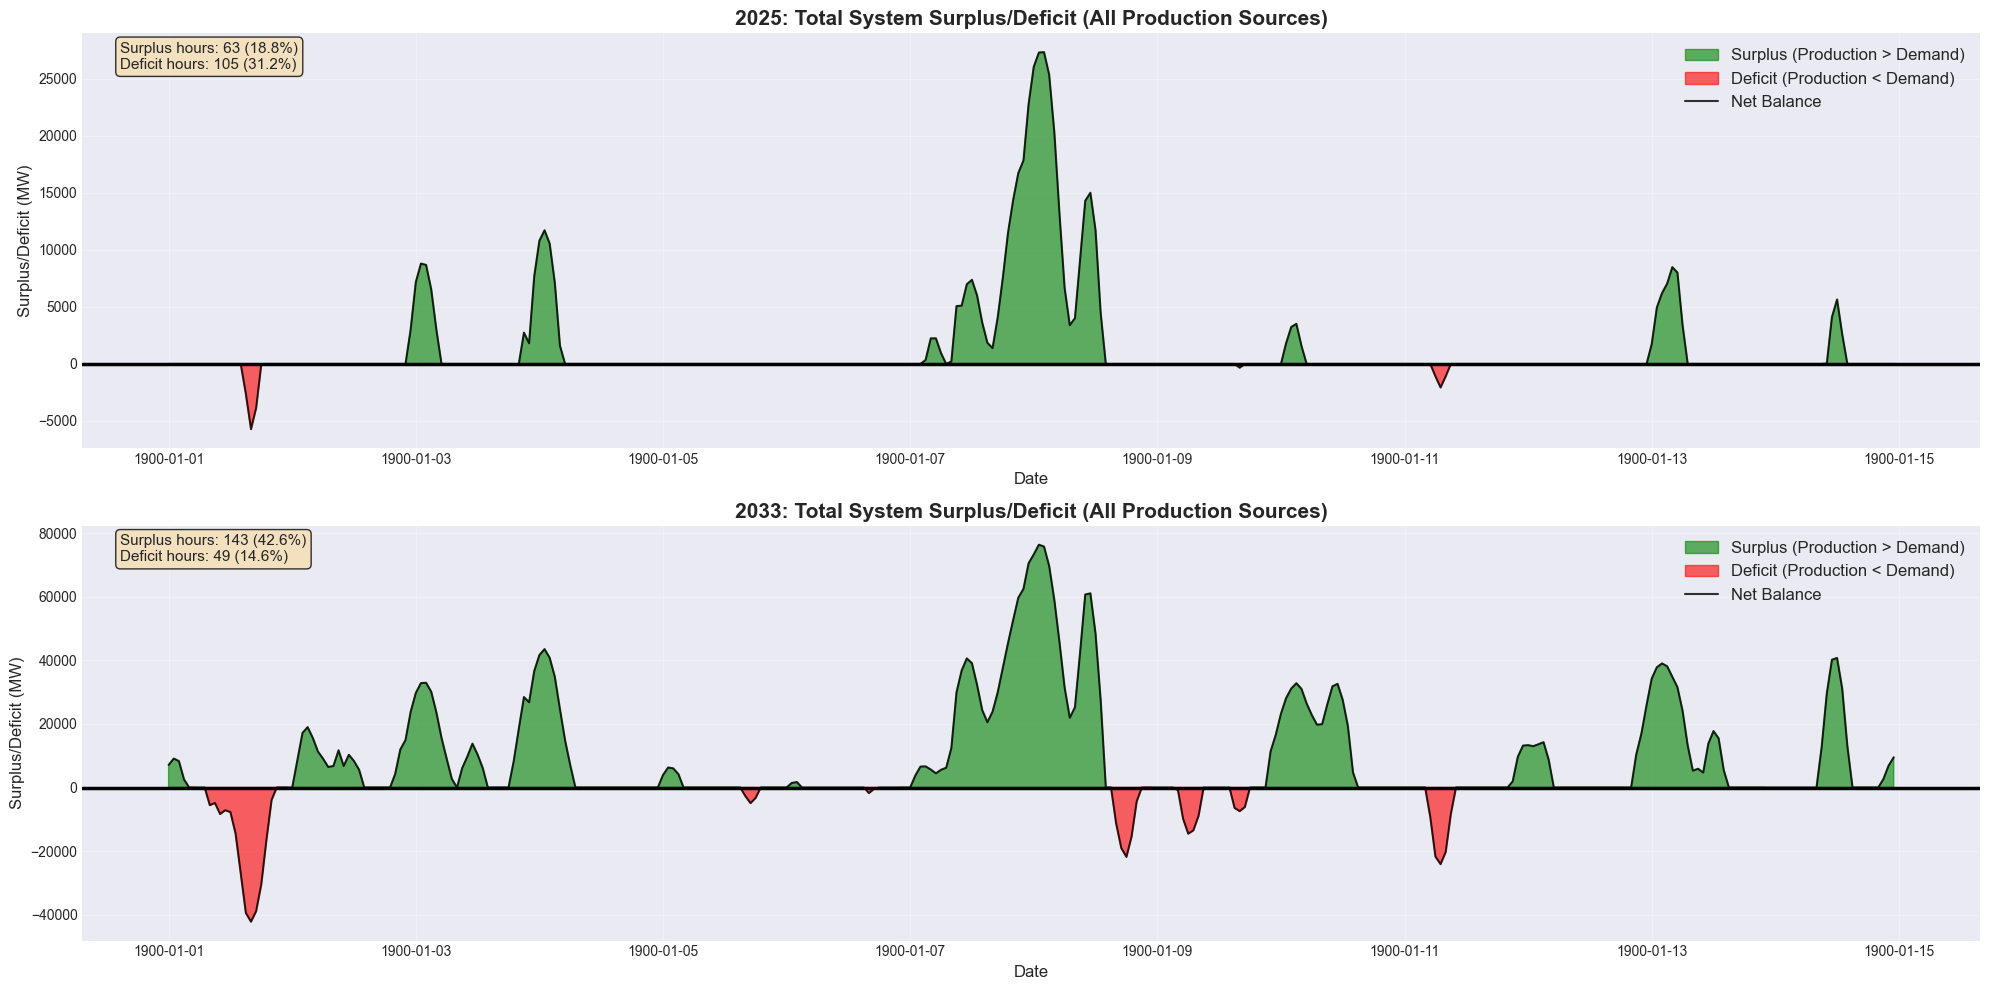

✓ Total system surplus/deficit visualized

TOTAL SYSTEM BALANCE STATISTICS (All Climatic Years)

2025:
  Hours with surplus:      12,090 ( 23.0%)
  Hours with deficit:      17,305 ( 32.9%)
  Avg surplus (when >0):     12,367 MW
  Avg deficit (when <0):     -1,963 MW
  Max surplus:               74,106 MW
  Max deficit:              -27,159 MW

2033:
  Hours with surplus:      28,208 ( 53.7%)
  Hours with deficit:      14,132 ( 26.9%)
  Avg surplus (when >0):     41,351 MW
  Avg deficit (when <0):    -15,221 MW
  Max surplus:              222,701 MW
  Max deficit:              -88,738 MW

KEY INSIGHT:
With gas and hydro included, the system is much more balanced.
Deficit hours in 2025: 32.9%
Deficit hours in 2033: 26.9%

Remaining deficits must be covered by:
  • Energy storage (batteries)
  • Imports from neighboring countries
  • Demand response programs
  • Additional flexible generation


In [36]:
# Total system surplus/deficit (like 11.2 but for all production sources)
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

# Use two-week sample
sample_2w_total_2025 = sample_total_2025.head(14*24)
sample_2w_total_2033 = sample_total_2033.head(14*24)

# 2025 - Total system surplus/deficit
axes[0].fill_between(sample_2w_total_2025['datetime'], 0, sample_2w_total_2025['total_surplus_deficit_MW'],
                     where=(sample_2w_total_2025['total_surplus_deficit_MW'] >= 0),
                     alpha=0.6, color='green', label='Surplus (Production > Demand)', interpolate=True)
axes[0].fill_between(sample_2w_total_2025['datetime'], 0, sample_2w_total_2025['total_surplus_deficit_MW'],
                     where=(sample_2w_total_2025['total_surplus_deficit_MW'] < 0),
                     alpha=0.6, color='red', label='Deficit (Production < Demand)', interpolate=True)
axes[0].plot(sample_2w_total_2025['datetime'], sample_2w_total_2025['total_surplus_deficit_MW'],
             color='black', linewidth=1.5, alpha=0.8, label='Net Balance')
axes[0].axhline(y=0, color='black', linewidth=2.5, linestyle='-')
axes[0].set_title(f'2025: Total System Surplus/Deficit (All Production Sources)', 
                  fontsize=15, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Surplus/Deficit (MW)', fontsize=12)
axes[0].legend(fontsize=12, loc='upper right')
axes[0].grid(True, alpha=0.3)

# Add text annotations for key insights
total_surplus_hours_2025 = (sample_2w_total_2025['total_surplus_deficit_MW'] > 0).sum()
total_deficit_hours_2025 = (sample_2w_total_2025['total_surplus_deficit_MW'] < 0).sum()
axes[0].text(0.02, 0.98, 
             f'Surplus hours: {total_surplus_hours_2025} ({total_surplus_hours_2025/len(sample_2w_total_2025)*100:.1f}%)\n'
             f'Deficit hours: {total_deficit_hours_2025} ({total_deficit_hours_2025/len(sample_2w_total_2025)*100:.1f}%)',
             transform=axes[0].transAxes, fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 2033 - Total system surplus/deficit
axes[1].fill_between(sample_2w_total_2033['datetime'], 0, sample_2w_total_2033['total_surplus_deficit_MW'],
                     where=(sample_2w_total_2033['total_surplus_deficit_MW'] >= 0),
                     alpha=0.6, color='green', label='Surplus (Production > Demand)', interpolate=True)
axes[1].fill_between(sample_2w_total_2033['datetime'], 0, sample_2w_total_2033['total_surplus_deficit_MW'],
                     where=(sample_2w_total_2033['total_surplus_deficit_MW'] < 0),
                     alpha=0.6, color='red', label='Deficit (Production < Demand)', interpolate=True)
axes[1].plot(sample_2w_total_2033['datetime'], sample_2w_total_2033['total_surplus_deficit_MW'],
             color='black', linewidth=1.5, alpha=0.8, label='Net Balance')
axes[1].axhline(y=0, color='black', linewidth=2.5, linestyle='-')
axes[1].set_title(f'2033: Total System Surplus/Deficit (All Production Sources)', 
                  fontsize=15, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Surplus/Deficit (MW)', fontsize=12)
axes[1].legend(fontsize=12, loc='upper right')
axes[1].grid(True, alpha=0.3)

# Add text annotations
total_surplus_hours_2033 = (sample_2w_total_2033['total_surplus_deficit_MW'] > 0).sum()
total_deficit_hours_2033 = (sample_2w_total_2033['total_surplus_deficit_MW'] < 0).sum()
axes[1].text(0.02, 0.98, 
             f'Surplus hours: {total_surplus_hours_2033} ({total_surplus_hours_2033/len(sample_2w_total_2033)*100:.1f}%)\n'
             f'Deficit hours: {total_deficit_hours_2033} ({total_deficit_hours_2033/len(sample_2w_total_2033)*100:.1f}%)',
             transform=axes[1].transAxes, fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print("✓ Total system surplus/deficit visualized")

# Print statistics
print("\n" + "=" * 80)
print("TOTAL SYSTEM BALANCE STATISTICS (All Climatic Years)")
print("=" * 80)

total_surplus_2025 = total_production_2025[total_production_2025['total_surplus_deficit_MW'] > 0]['total_surplus_deficit_MW']
total_deficit_2025 = total_production_2025[total_production_2025['total_surplus_deficit_MW'] < 0]['total_surplus_deficit_MW']
total_surplus_2033 = total_production_2033[total_production_2033['total_surplus_deficit_MW'] > 0]['total_surplus_deficit_MW']
total_deficit_2033 = total_production_2033[total_production_2033['total_surplus_deficit_MW'] < 0]['total_surplus_deficit_MW']

print("\n2025:")
print(f"  Hours with surplus:    {len(total_surplus_2025):>8,} ({len(total_surplus_2025)/len(total_production_2025)*100:>5.1f}%)")
print(f"  Hours with deficit:    {len(total_deficit_2025):>8,} ({len(total_deficit_2025)/len(total_production_2025)*100:>5.1f}%)")
print(f"  Avg surplus (when >0): {total_surplus_2025.mean():>10,.0f} MW")
print(f"  Avg deficit (when <0): {total_deficit_2025.mean():>10,.0f} MW")
print(f"  Max surplus:           {total_surplus_2025.max():>10,.0f} MW")
print(f"  Max deficit:           {total_deficit_2025.min():>10,.0f} MW")

print("\n2033:")
print(f"  Hours with surplus:    {len(total_surplus_2033):>8,} ({len(total_surplus_2033)/len(total_production_2033)*100:>5.1f}%)")
print(f"  Hours with deficit:    {len(total_deficit_2033):>8,} ({len(total_deficit_2033)/len(total_production_2033)*100:>5.1f}%)")
print(f"  Avg surplus (when >0): {total_surplus_2033.mean():>10,.0f} MW")
print(f"  Avg deficit (when <0): {total_deficit_2033.mean():>10,.0f} MW")
print(f"  Max surplus:           {total_surplus_2033.max():>10,.0f} MW")
print(f"  Max deficit:           {total_deficit_2033.min():>10,.0f} MW")

print("\n" + "=" * 80)
print("KEY INSIGHT:")
print("=" * 80)
print("With gas and hydro included, the system is much more balanced.")
print(f"Deficit hours in 2025: {len(total_deficit_2025)/len(total_production_2025)*100:.1f}%")
print(f"Deficit hours in 2033: {len(total_deficit_2033)/len(total_production_2033)*100:.1f}%")
print("\nRemaining deficits must be covered by:")
print("  • Energy storage (batteries)")
print("  • Imports from neighboring countries")
print("  • Demand response programs")
print("  • Additional flexible generation")
print("=" * 80)


## 18. Production Mix Summary and Comparison


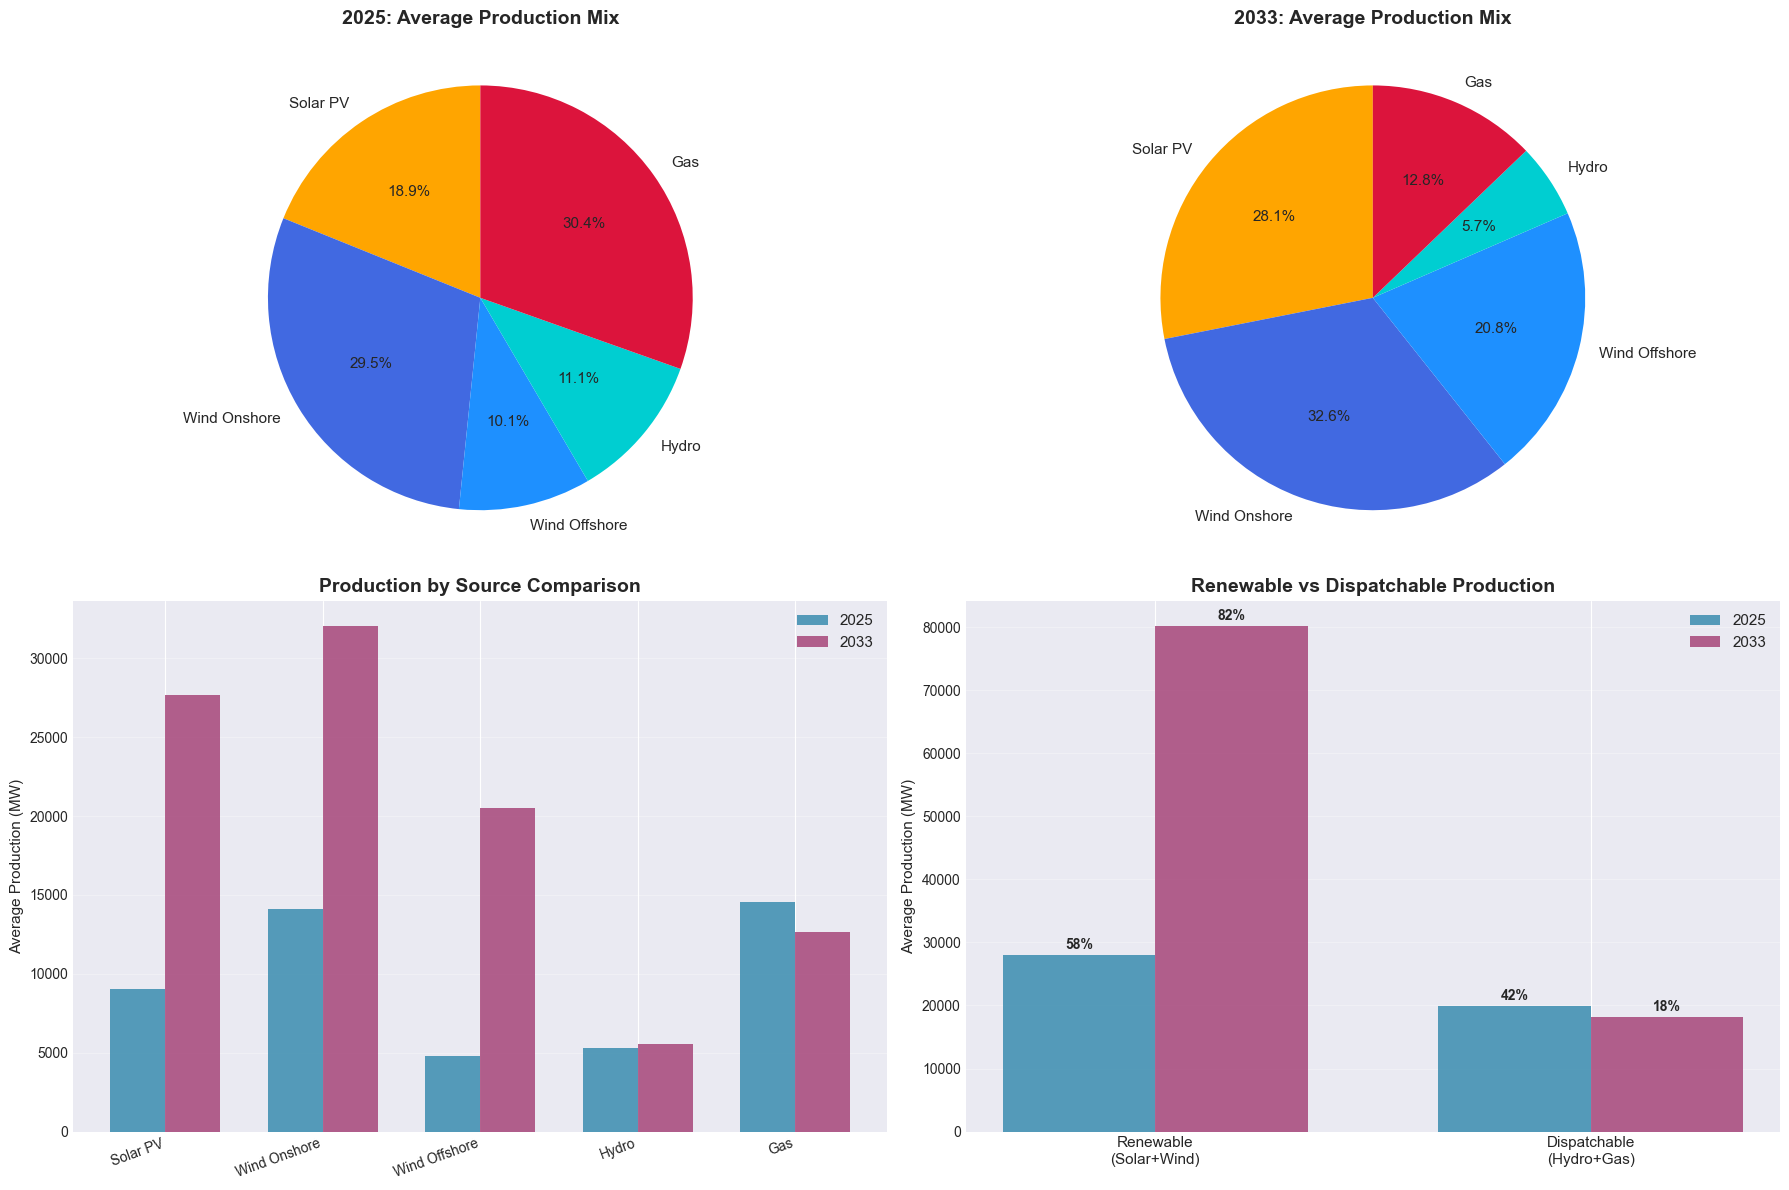

✓ Production mix summary visualized

PRODUCTION MIX SUMMARY

2025 Average Production:
  Solar PV                  9,045 MW  ( 18.9%)
  Wind Onshore             14,128 MW  ( 29.5%)
  Wind Offshore             4,818 MW  ( 10.1%)
  Hydro                     5,323 MW  ( 11.1%)
  Gas                      14,573 MW  ( 30.4%)
  TOTAL                    47,888 MW  (100.0%)

2033 Average Production:
  Solar PV                 27,656 MW  ( 28.1%)
  Wind Onshore             32,050 MW  ( 32.6%)
  Wind Offshore            20,497 MW  ( 20.8%)
  Hydro                     5,563 MW  (  5.7%)
  Gas                      12,624 MW  ( 12.8%)
  TOTAL                    98,389 MW  (100.0%)

KEY OBSERVATIONS:
1. Gas usage decreases by 13.4% from 2025 to 2033
2. Renewable production increases by 186.5%
3. Renewable share: 58.5% (2025) → 81.5% (2033)
4. System becomes less dependent on dispatchable generation
5. Hydro provides stable baseload support (~5.3 GW average)


In [37]:
# Final summary comparing production mix
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Production share pie charts
sources = ['Solar PV', 'Wind Onshore', 'Wind Offshore', 'Hydro', 'Gas']
production_2025_shares = [
    total_production_2025['solar_MW'].mean(),
    total_production_2025['wind_onshore_MW'].mean(),
    total_production_2025['wind_offshore_MW'].mean(),
    total_production_2025['hydro_MW'].mean(),
    total_production_2025['gas_MW'].mean()
]
production_2033_shares = [
    total_production_2033['solar_MW'].mean(),
    total_production_2033['wind_onshore_MW'].mean(),
    total_production_2033['wind_offshore_MW'].mean(),
    total_production_2033['hydro_MW'].mean(),
    total_production_2033['gas_MW'].mean()
]

colors = ['#FFA500', '#4169E1', '#1E90FF', '#00CED1', '#DC143C']

# 2025 pie
axes[0, 0].pie(production_2025_shares, labels=sources, autopct='%1.1f%%',
               colors=colors, startangle=90, textprops={'fontsize': 11})
axes[0, 0].set_title('2025: Average Production Mix', fontsize=14, fontweight='bold')

# 2033 pie
axes[0, 1].pie(production_2033_shares, labels=sources, autopct='%1.1f%%',
               colors=colors, startangle=90, textprops={'fontsize': 11})
axes[0, 1].set_title('2033: Average Production Mix', fontsize=14, fontweight='bold')

# Bar chart comparison
x = np.arange(len(sources))
width = 0.35

axes[1, 0].bar(x - width/2, production_2025_shares, width, label='2025', 
               color='#2E86AB', alpha=0.8)
axes[1, 0].bar(x + width/2, production_2033_shares, width, label='2033', 
               color='#A23B72', alpha=0.8)
axes[1, 0].set_title('Production by Source Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Average Production (MW)', fontsize=11)
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(sources, rotation=20, ha='right', fontsize=10)
axes[1, 0].legend(fontsize=11)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Renewable vs Dispatchable
renewable_2025 = sum(production_2025_shares[:3])  # Solar + Wind On + Wind Off
renewable_2033 = sum(production_2033_shares[:3])
dispatchable_2025 = sum(production_2025_shares[3:])  # Hydro + Gas
dispatchable_2033 = sum(production_2033_shares[3:])

categories = ['Renewable\n(Solar+Wind)', 'Dispatchable\n(Hydro+Gas)']
values_2025 = [renewable_2025, dispatchable_2025]
values_2033 = [renewable_2033, dispatchable_2033]

x2 = np.arange(len(categories))
axes[1, 1].bar(x2 - width/2, values_2025, width, label='2025', color='#2E86AB', alpha=0.8)
axes[1, 1].bar(x2 + width/2, values_2033, width, label='2033', color='#A23B72', alpha=0.8)
axes[1, 1].set_title('Renewable vs Dispatchable Production', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Average Production (MW)', fontsize=11)
axes[1, 1].set_xticks(x2)
axes[1, 1].set_xticklabels(categories, fontsize=11)
axes[1, 1].legend(fontsize=11)
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Add percentage labels
for i, (v2025, v2033) in enumerate(zip(values_2025, values_2033)):
    total_2025 = sum(values_2025)
    total_2033 = sum(values_2033)
    pct_2025 = v2025 / total_2025 * 100
    pct_2033 = v2033 / total_2033 * 100
    axes[1, 1].text(i - width/2, v2025 + 1000, f'{pct_2025:.0f}%', 
                    ha='center', fontsize=10, fontweight='bold')
    axes[1, 1].text(i + width/2, v2033 + 1000, f'{pct_2033:.0f}%', 
                    ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Production mix summary visualized")

# Final statistics
print("\n" + "=" * 90)
print("PRODUCTION MIX SUMMARY")
print("=" * 90)

print("\n2025 Average Production:")
for source, prod in zip(sources, production_2025_shares):
    total = sum(production_2025_shares)
    print(f"  {source:<20} {prod:>10,.0f} MW  ({prod/total*100:>5.1f}%)")
print(f"  {'TOTAL':<20} {sum(production_2025_shares):>10,.0f} MW  (100.0%)")

print("\n2033 Average Production:")
for source, prod in zip(sources, production_2033_shares):
    total = sum(production_2033_shares)
    print(f"  {source:<20} {prod:>10,.0f} MW  ({prod/total*100:>5.1f}%)")
print(f"  {'TOTAL':<20} {sum(production_2033_shares):>10,.0f} MW  (100.0%)")

print("\n" + "=" * 90)
print("KEY OBSERVATIONS:")
print("=" * 90)

gas_reduction = (production_2025_shares[4] - production_2033_shares[4]) / production_2025_shares[4] * 100
renewable_increase = ((renewable_2033 - renewable_2025) / renewable_2025 * 100)

print(f"1. Gas usage decreases by {abs(gas_reduction):.1f}% from 2025 to 2033")
print(f"2. Renewable production increases by {renewable_increase:.1f}%")
print(f"3. Renewable share: {renewable_2025/sum(production_2025_shares)*100:.1f}% (2025) → {renewable_2033/sum(production_2033_shares)*100:.1f}% (2033)")
print(f"4. System becomes less dependent on dispatchable generation")
print(f"5. Hydro provides stable baseload support (~{production_2025_shares[3]/1000:.1f} GW average)")

print("=" * 90)
